# DSE Dissertation

## Topic Analysis

In [1]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [2]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 128281 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
# Mount Google Drive to access required files

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

#### Load Packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sn
from wordcloud import WordCloud
import re
import spacy
import codecs
import csv
import sys

In [4]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
!pip install Unidecode
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 20.8 MB/s eta 0:00:00


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

In [7]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00


In [8]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, GlobalAveragePooling1D, Dropout, LSTM
from keras.initializers import he_normal
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

#### Load Dataset

In [9]:
"""

Loading dataset

"""

class UtteranceExample:
    def __init__(self, text, label, do_lower_case):
        self.original_text = text
        self.text = text
        self.label = label

        if do_lower_case:
            self.text = self.text.lower()

    def to_dict(self):
      return {
          'utterance': self.original_text,
          'intent': self.label,
      }
        
def load_utterance_examples(file_path, do_lower_case=True):
    examples = []

    with open('{}/seq.in'.format(file_path), 'r', encoding="utf-8") as f_text, open('{}/label'.format(file_path), 'r', encoding="utf-8") as f_label:
        for text, label in zip(f_text, f_label):
            e = UtteranceExample(text.strip(), label.strip(), do_lower_case)
            examples.append(e)

    return examples



##### Load sample dataset

In [94]:
SAMPLE_DATASET_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train"
corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/seq.in"


In [95]:
data = load_utterance_examples(SAMPLE_DATASET_PATH, False)

utterances= pd.DataFrame.from_records([d.to_dict() for d in data])

utterances = utterances.sample(frac=1).reset_index(drop=True)

with pd.option_context('expand_frame_repr', False):
    print (utterances)
#print(utterances.head())

                                              utterance                    intent
0     why is a payment i made reverted back to my ac...    reverted_card_payment?
1                  are these cards available in europe?           country_support
...                                                 ...                       ...
8620  i have tried a couple of times to make a purch...         declined_transfer
8621   why was i blocked from withdrawing from the atm?  declined_cash_withdrawal

[8622 rows x 2 columns]


##### Load Actual dataset

In [122]:
ACTUAL_DATASET_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/Topic_Analysis_Data.csv"
corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/Topic_Analysis_Data.csv"

In [123]:
utterances = pd.read_csv(ACTUAL_DATASET_PATH)

utterances.head()

utterances = utterances.sample(frac=1).reset_index(drop=True)

with pd.option_context('expand_frame_repr', False):
    print (utterances)

                  intent                                     utterance
0        budget_insights                     How do I get to my budget
1             zelle_send  let's send 20 bucks from my checking account
...                  ...                                           ...
14678   get_transactions        show me the smallest withdrawal I made
14679  simplified_refund                                 overdraft fee

[14680 rows x 2 columns]


### Exploratory Data Analysis

In [124]:
utterances.shape

(14680, 2)

In [125]:
utterances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14680 entries, 0 to 14679
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   intent     14680 non-null  object
 1   utterance  14680 non-null  object
dtypes: object(2)
memory usage: 229.5+ KB


In [126]:
utterances.describe()

intent                 utterance
count              14680                     14680
unique                32                     12410
top     get_transactions  emily's bill pay account
freq                2373                         8

In [127]:
utterances.dropna(axis=0,inplace=True)#dropping na
utterances.shape

(14680, 2)

In [128]:
utterances.drop_duplicates(subset=['utterance'],inplace=True)#dropping duplicates
utterances.shape

(12410, 2)

In [129]:
#Look for missing intents
utterances['intent'].isnull().sum()

0

In [130]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

type_counts_train = utterances['intent'].value_counts(sort=True, ascending=True)

#Another way of printing the values.
#print(pd.DataFrame({'count' : utterances.groupby( [ "intent"] ).size()}).reset_index().sort_values('count'))

print(type_counts_train)

"""

It shows that the utterances per intent are imbalanced.

TOTAL OF 77 INTENT CLASSES

"""
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 5)

add_external_account        5
balance_forecast           14
balance_transfer           15
card_activation            36
card_on_off                44
simplified_refund          57
log_out                    57
auto_pay                   71
money_brief                98
interest_rates            100
login_troubleshooting     122
creditscore_faq           133
cash_advance              146
appointment_schedular     151
co_browse                 155
bill_pay                  164
credit_score              191
branch_atm_locator        223
change_acct_info          226
stop_payment              236
payoff_quote              243
declined_transaction      280
credit_card_sales         281
budget_insights           378
agent_routing             420
upcoming_bills            506
suspected_dispute         639
acc_routing               744
transfers                1182
acct_balance             1513
zelle_send               1608
get_transactions         2372
Name: intent, dtype: int64


### Data Pre-processing.
- Profanity Removal.
- Spelling correction.
- Remove Punctuation.
- Remove stop words.
- Tokenization.
- Lemmatization.


##### Profanity removal.

In [19]:
!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 KB 5.3 MB/s eta 0:00:00


In [20]:
from better_profanity import profanity

In [22]:
def censored_correction(text):
  if(profanity.contains_profanity(text)):
    return profanity.censor(text)
  else:
    return text

In [23]:
corrected_utterances = []

for t in utterances['utterance']:
    corrected_utterances.append(censored_correction(t))

corrected_utterances[:5]
utterances['utterance'] = corrected_utterances
utterances.head()

intent                                          utterance
0        acc_routing                         What is the routing number
1          transfers  great, let's move money from this account to c...
2  suspected_dispute                       my free checking no interest
3        money_brief                  I need to look at the money brief
4      agent_routing                            late fee on my mortgage

##### Spelling correction.

In [24]:
! pip install -U symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 KB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp39-cp39-linux_x86_64.whl size=141223 sha256=a50ed55f039d83a5f323cf576558c93164d7b5377c1e9a8df244ac074ade6f82
  Stored in directory: /root/.cache/pip/wheels/72/16/b1/ea6472dedd6ac13ad789dd294871a76fd6906fca3c010347d1
Successfully built editdistpy


In [25]:
#Spelling correction using Symspell.

from symspellpy import SymSpell, Verbosity
import pkg_resources
from itertools import islice

##### Creating a dictionary out of dataset

In [146]:
# Initialise Symspell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7, count_threshold=2)

In [147]:
banking_terms = "/content/drive/MyDrive/Dissertation/Topic_Analysis/banking_dict.txt"
banking_dict = sym_spell.create_dictionary(banking_terms, encoding='utf-8')
banking_dict

True

In [148]:
corpus_dict = sym_spell.create_dictionary(corpus_path, encoding='utf-8')
corpus_dict

True

In [149]:
loc_corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties.csv"
loc_corpus_text_unigram = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties_unigram.txt"
loc_corpus_text_bigram = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties_bigram.txt"

In [60]:
def removeDuplicates(fileName):
  f = open(fileName, 'r')
  lines = set(f.readlines())
  f.close()
  a = open(fileName, 'w')
  a.writelines(lines)
  a.close()


In [61]:
def getUSCitiesStateCountyLists():
  file_unigram = open(loc_corpus_text_unigram, 'w')
  file_bigram = open(loc_corpus_text_bigram, 'w')
  infile = open(loc_corpus_path, mode='r', newline='')
  reader = csv.DictReader(infile)
  header = next(reader)  # store the headers and advance reader pointer
  for rows in reader:
    row_val = rows['City|State short|State full|County|City alias']
    divided_row = row_val.split('|')
    #print(divided_row)
    if len(divided_row) >= 1:
      city_name = divided_row[0]
      if len(city_name.split()) > 1:
        file_bigram.write(city_name.title()+'\n')
      else:
        file_unigram.write(city_name.title()+'\n')

      if len(divided_row) >= 3:
        state_full = divided_row[2]
        if len(state_full.split()) > 1:
          file_bigram.write(state_full.title()+'\n')
        else:
          file_unigram.write(state_full.title()+'\n')

        if len(divided_row) >= 4:
          county = divided_row[3]
          if len(county.split()) > 1:
            file_bigram.write(county.title()+'\n')
          else:
            file_unigram.write(county.title()+'\n')
  file_unigram.close()
  file_bigram.close()
  infile.close()
  removeDuplicates(loc_corpus_text_unigram)
  removeDuplicates(loc_corpus_text_bigram)

In [135]:
getUSCitiesStateCountyLists()

In [150]:
#Load USA location Gazetteer as dictionary to sym_spell
loc_corpus_dict = sym_spell.create_dictionary(loc_corpus_text_unigram, encoding='utf-8')
print(loc_corpus_dict)
loc_corpus_dict = sym_spell.create_dictionary(loc_corpus_text_bigram, encoding='utf-8')
print(loc_corpus_dict)

True
True


In [151]:
# Load the dictionaries provided by library

#dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
dictionary_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/en-80k.txt"

# term_index is the column of the term and count_index is the
# column of the term frequency
#sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

suggestions = sym_spell.lookup("Parking", Verbosity.CLOSEST, max_edit_distance=2, transfer_casing=True)
for suggestion in suggestions:
    print(suggestion)

# Print out first 5 elements to demonstrate that dictionary is
# successfully loaded
#print(list(islice(sym_spell.bigrams.items(), 5)))
#print(list(islice(sym_spell.words.items(), 5)))

# lookup suggestions for multi-word input strings (supports compound
# splitting & merging)
input_term = (
    "I want to do Chhheecking Parking auto pya with Zelle on my crad in New Yrok routing Modify 282.72 out of reserve checking that needs to be sent to 6122033390"
)
# max edit distance per lookup (per single word, not per whole input string)
suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2, ignore_non_words=True, transfer_casing=True, ignore_term_with_digits=True)
# display suggestion term, edit distance, and term frequency
for suggestion in suggestions:
    print(suggestion)

def spell_correction(input_term, max_edit_distance=2):
  suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2)
  #for suggestion in suggestions:
  #  print(suggestion.term)
  return suggestions[0].term

Parking, 0, 2
I want to do THE Checking Parking auto pay with Zelle on my card in New YOrk routing Modify 282 72 out of reserve checking that needs to be sent to 6122033390, 11, 0


In [66]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##### Preprocessing using regular expression.

In [ ]:
stop_words = set(stopwords.words('english')) 

# Text cleanup using regex
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)   # removing special characters
    newString = re.sub('"','', newString)              # removing '"' 
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    # replacing slangs
    newString = re.sub(r"'s\b","",newString)    # replacing 's with "" '
    newString = re.sub("[^a-z]", " ", newString)    #only keeping letters
    newString = re.sub('[m]{2,}', 'mm', newString)    # "mmmmmm" -> "mm"
        
    tokens = [w for w in newString.split() if not w in stop_words]     # removing the stopwords

    long_words=[]
    for i in tokens:
        if len(i)>1:                               #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

    
#Lemmatization

def lemma(tokenized_text):
  wordnetLemmatizer = nltk.WordNetLemmatizer()
  text = [wordnetLemmatizer.lemmatize(word) for word in tokenized_text]
  return (" ".join(text)).strip()

In [ ]:
#call the function text_cleaner if you want to use text pre-processing using text_cleaner method.
cleaned_text = []
for t in utterances['utterance']:
    cleaned_text.append(text_cleaner(t)) 

utterances['cleaned_utterance'] = cleaned_text
utterances['lemmatized_utterance'] = utterances['cleaned_utterance'].apply(lambda x: lemma(x.split(" ")))

#Drop empty rows
utterances.replace('', np.nan, inplace=True)
utterances.dropna(axis=0,inplace=True)

utterances.head()

##### Pre-processing using Spacy

In [45]:
# Text cleanup and lemmatization combined using Spacy

nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)
print(nlp.pipe_labels['ner'])

def spacy_get_parsed_doc(text):
  try:
        decoded_text = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
  except:
        decoded_text = unidecode.unidecode(text)

  apostrophe_handled = re.sub("’", "'", decoded_text)
  apostrophe_s_handled = re.sub(r"'s\b","",apostrophe_handled)
  expanded_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
  parsed = nlp(expanded_text)
  return parsed


def spacy_text_preprocessor(text):
  parsed = spacy_get_parsed_doc(text)
  final_tokens = []
  # print(parsed)
  # for ent in parsed.ents:
  #   print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

  for t in parsed:
      # print(t.text, t.lemma_, t.pos_, t.tag_, t.dep_,t.shape_, t.is_alpha, t.is_stop)
      if t.is_punct or t.is_space or t.like_url or str(t).startswith('@'):
          pass
      else:
          if t.lemma_ == '-PRON-' or t.pos_ == 'NUM':
              final_tokens.append(str(t))
          else:
              specialchar_removed = re.sub("[^a-zA-Z0-9]", '', str(t.lemma_))
              if len(specialchar_removed) > 1:
                  final_tokens.append(specialchar_removed)

  joined_str = ' '.join(final_tokens)
  text_corrected = re.sub(r'(.)\1+', r'\1\1', joined_str)
  return text_corrected

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [138]:
print(spacy_text_preprocessor("Modify 282.72 out of reserve checking"))

modify 282.72 out of reserve checking


In [67]:
# get entities using Spacy

def getEntities(text):
  parsed = spacy_get_parsed_doc(text)
  return parsed.ents

In [152]:
# call the function spell_correction

corrected_utterances = []

for t in utterances['utterance']:
    corrected_utterances.append(spell_correction(t)) 

utterances['lemmatized_utterance'] = corrected_utterances
utterances.head()

intent                                          utterance  \
0   budget_insights                          How do I get to my budget   
1        zelle_send       let's send 20 bucks from my checking account   
2  get_transactions    Don't Show me every withdrawals i did at online   
3  get_transactions  Was I charged a $5 fee from Parking Center las...   
4         transfers  between children acct 7097 and billpay acct 30...   

                                lemmatized_utterance  \
0                          how do i get to my budget   
1       let's send 20 bucks from my checking account   
2    don't show me every withdrawals i did at online   
3  was i charged a 5 fee from parking center last...   
4  between children acct 7097 and billpay acct 30...   

                                 entities  
0                                      ()  
1                          ((20, bucks),)  
2                                      ()  
3  ((5), (Parking, Center), (last, week))  
4                          ((7097), (30))

In [153]:

utterances['lemmatized_utterance']= [spacy_text_preprocessor(t) for t in utterances['lemmatized_utterance']]
utterances.head()

intent                                          utterance  \
0   budget_insights                          How do I get to my budget   
1        zelle_send       let's send 20 bucks from my checking account   
2  get_transactions    Don't Show me every withdrawals i did at online   
3  get_transactions  Was I charged a $5 fee from Parking Center las...   
4         transfers  between children acct 7097 and billpay acct 30...   

                               lemmatized_utterance  \
0                           how do get to my budget   
1         let we send 20 buck from my check account   
2         do not show every withdrawal do at online   
3     be charge 5 fee from parking center last week   
4  between child acct 7097 and billpay acct 30 okay   

                                 entities  
0                                      ()  
1                          ((20, bucks),)  
2                                      ()  
3  ((5), (Parking, Center), (last, week))  
4                          ((7097), (30))

##### Using Named Entity Recognition

In [154]:
# Using either Spacy NER to get the Named Entities from the dataset.

utterances['entities'] = [getEntities(t) for t in utterances['utterance']]
utterances.head()

intent                                          utterance  \
0   budget_insights                          How do I get to my budget   
1        zelle_send       let's send 20 bucks from my checking account   
2  get_transactions    Don't Show me every withdrawals i did at online   
3  get_transactions  Was I charged a $5 fee from Parking Center las...   
4         transfers  between children acct 7097 and billpay acct 30...   

                               lemmatized_utterance  \
0                           how do get to my budget   
1         let we send 20 buck from my check account   
2         do not show every withdrawal do at online   
3     be charge 5 fee from parking center last week   
4  between child acct 7097 and billpay acct 30 okay   

                                 entities  
0                                      ()  
1                          ((20, bucks),)  
2                                      ()  
3  ((5), (Parking, Center), (last, week))  
4                          ((7097), (30))

In [ ]:
# method to preprocess single utterance

def preprocess_utterance(text):
  censored_corrected = censored_correction(text)
  spell_corrected = spell_correction(censored_corrected)
  spacy_preprocessed = spacy_text_preprocessor(spell_corrected)
  return spell_corrected


In [ ]:
print(preprocess_utterance("#$#%%@@ transfer via Zelle Fuck"))

transfer via zelle


### Using WordCloud, display the frequent words in specific intent category

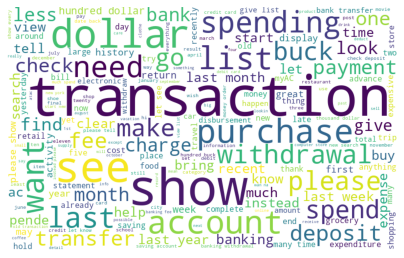

In [72]:
## word cloud for highest count for intent = 'card_payment_fee_charged'

intent_text = ""
for t in utterances[utterances['intent'] == 'get_transactions']['lemmatized_utterance']:
    intent_text += t +" "
wordCloud = WordCloud(width=800, height=500, background_color='white').generate(intent_text)
plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.axis("Off")
plt.show()

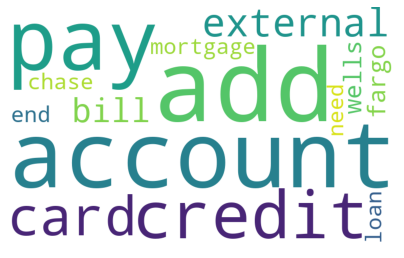

In [73]:
## word cloud for lowest count intent = 'contactless_not_working	'

intent_text = ""
for t in utterances[utterances['intent'] == 'add_external_account']['lemmatized_utterance']:
    intent_text += t +" "
wordCloud = WordCloud(width=800, height=500, background_color='white').generate(intent_text)
plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.axis("Off")
plt.show()

### Label Encode the class label i.e. 'intent' column

In [74]:
from sklearn import preprocessing

labelEncoding = preprocessing.LabelEncoder()
utterances['intent_labelEncoded'] = labelEncoding.fit_transform(utterances['intent']) 
utterances.head()

intent                                          utterance  \
0        acc_routing                         What is the routing number   
1          transfers  great, let's move money from this account to c...   
2  suspected_dispute                       my free checking no interest   
3        money_brief                  I need to look at the money brief   
4      agent_routing                            late fee on my mortgage   

                                lemmatized_utterance entities  \
0                           what be the route number       ()   
1  great let we move money from this account to c...       ()   
2                          my free check no interest       ()   
3                    need to look at the money brief       ()   
4                            late fee on my mortgage       ()   

   intent_labelEncoded  
0                    0  
1                   29  
2                   28  
3                   24  
4                    3

##### Preparing Test Data

In [ ]:
data = load_utterance_examples("/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/BANKING77/test", False)
test_utterances= pd.DataFrame.from_records([d.to_dict() for d in data])
print(test_utterances.head())

                                           utterance        intent
0                           how do i loacte my card?  card_arrival
1  i still have not received my new card, i order...  card_arrival
2  i ordered a card but it has not arrived. hlep ...  card_arrival
3   is there a wya to know when my card will arrive?  card_arrival
4                       my card has not arrived yet.  card_arrival


In [ ]:
test_utterances.shape

(3080, 2)

In [ ]:
# Preprocess test data
X_test_testdata = test_utterances['utterance'][:3080]
X_test_testdata.shape

(3080,)

In [ ]:
y_test_testdata = test_utterances['intent'][:3080]
y_test_testdata.shape

(3080,)

#### Classification Report

##### Method to display confusion matrix for the model evaluation.

In [75]:
def plot_confusion_matrix(y_test, y_pred):
  y_labels = np.unique(y_test)
  cm = confusion_matrix(y_test, y_pred, labels=y_labels)
  cm_df = pd.DataFrame(cm, index=y_labels, columns=y_labels)
  cm_df.index.name= "Actual"
  cm_df.columns.name = "Predicted"
  fig, ax = plt.subplots(1, 1, figsize=(50, 50))
  sn.heatmap(cm_df, annot=True, ax=ax, linewidth=0.5, cmap="crest")
  plt.title("Confusion Matrix")
  plt.show()


##### Method to print total TP, FP, TN, FN

In [76]:
def print_total_values(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
  TP = (np.diag(cm)).astype(float)
  FP = (cm.sum(axis=0) - np.diag(cm)).astype(float)
  FN = cm.sum(axis=1) - np.diag(cm).astype(float)
  TN = cm.sum() - (FP + FN + TP).astype(float)

  print(f"Total True Positives : ",np.sum(TP))
  print(f"Total False Positives : ",np.sum(FP))
  print(f"Total True Negatives : ",np.sum(TN))
  print(f"Total False Negatives : ",np.sum(FN))


##### Print TP, FP, TN, FN as part of classification report

In [77]:
def multiclass_classification_report(y_test, y_pred):
    conf_labels = None
    
    conf_mat = multilabel_confusion_matrix(y_test, y_pred, labels=conf_labels)
    report = dict()
    counter = np.unique(y_test)
        
    for i, name in enumerate(counter):
        TN, FP, FN, TP = conf_mat[i].ravel()
        report[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
    
    return pd.DataFrame(report)


In [78]:
RESULT_FILE_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/result/"

In [79]:
def display_comprehensive_result(X_test, y_test, y_pred, classifier_name):
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)

  # Print the predicted intent for each utterance in X_test dataset
  # print(f" Utterance : Prediction")
  # res = "\n".join("{}:  {}".format(x, y) for x, y in zip(X_test, y_pred.tolist()))
  # #print(res)
  fileName = RESULT_FILE_PATH + classifier_name +".csv"
  X_test_df = pd.DataFrame(X_test)  
  X_test_df['intent'] = y_pred

  X_test_df.to_csv(fileName, index=False)
  
  #Print total TP, FP, TN, FN
  print_total_values(y_test, y_pred)

  # Add TP, TN, FP, FN as part of classification report
  display(multiclass_classification_report(y_test, y_pred))

  pd.set_option('display.max_rows', 5)
  pd.set_option('display.max_columns', 5)

### Model Building and testing using MultiNomialNB using Count Vectorizer and tf-idf Vectorizer


Model building using MultiNomialNB (Naive Bayes) Model and uni-gram CountVectorizer for Classification

Shape of X_train:  (9928,)
Shape of X_test:  (2482,)
Accuracy: 0.7639000805801772
F1 score: 0.7448718572948955
                       precision    recall  f1-score   support

          acc_routing       0.80      0.76      0.78       146
         acct_balance       0.59      0.85      0.69       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.53      0.19      0.28        88
appointment_schedular       1.00      0.93      0.97        30
             auto_pay       0.88      0.50      0.64        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       1.00      0.10      0.18        31
   branch_atm_locator       0.91      0.71      0.80        45
      budget_insights       0.96      0.88      0.92        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.50      0.22      0.31         9
      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


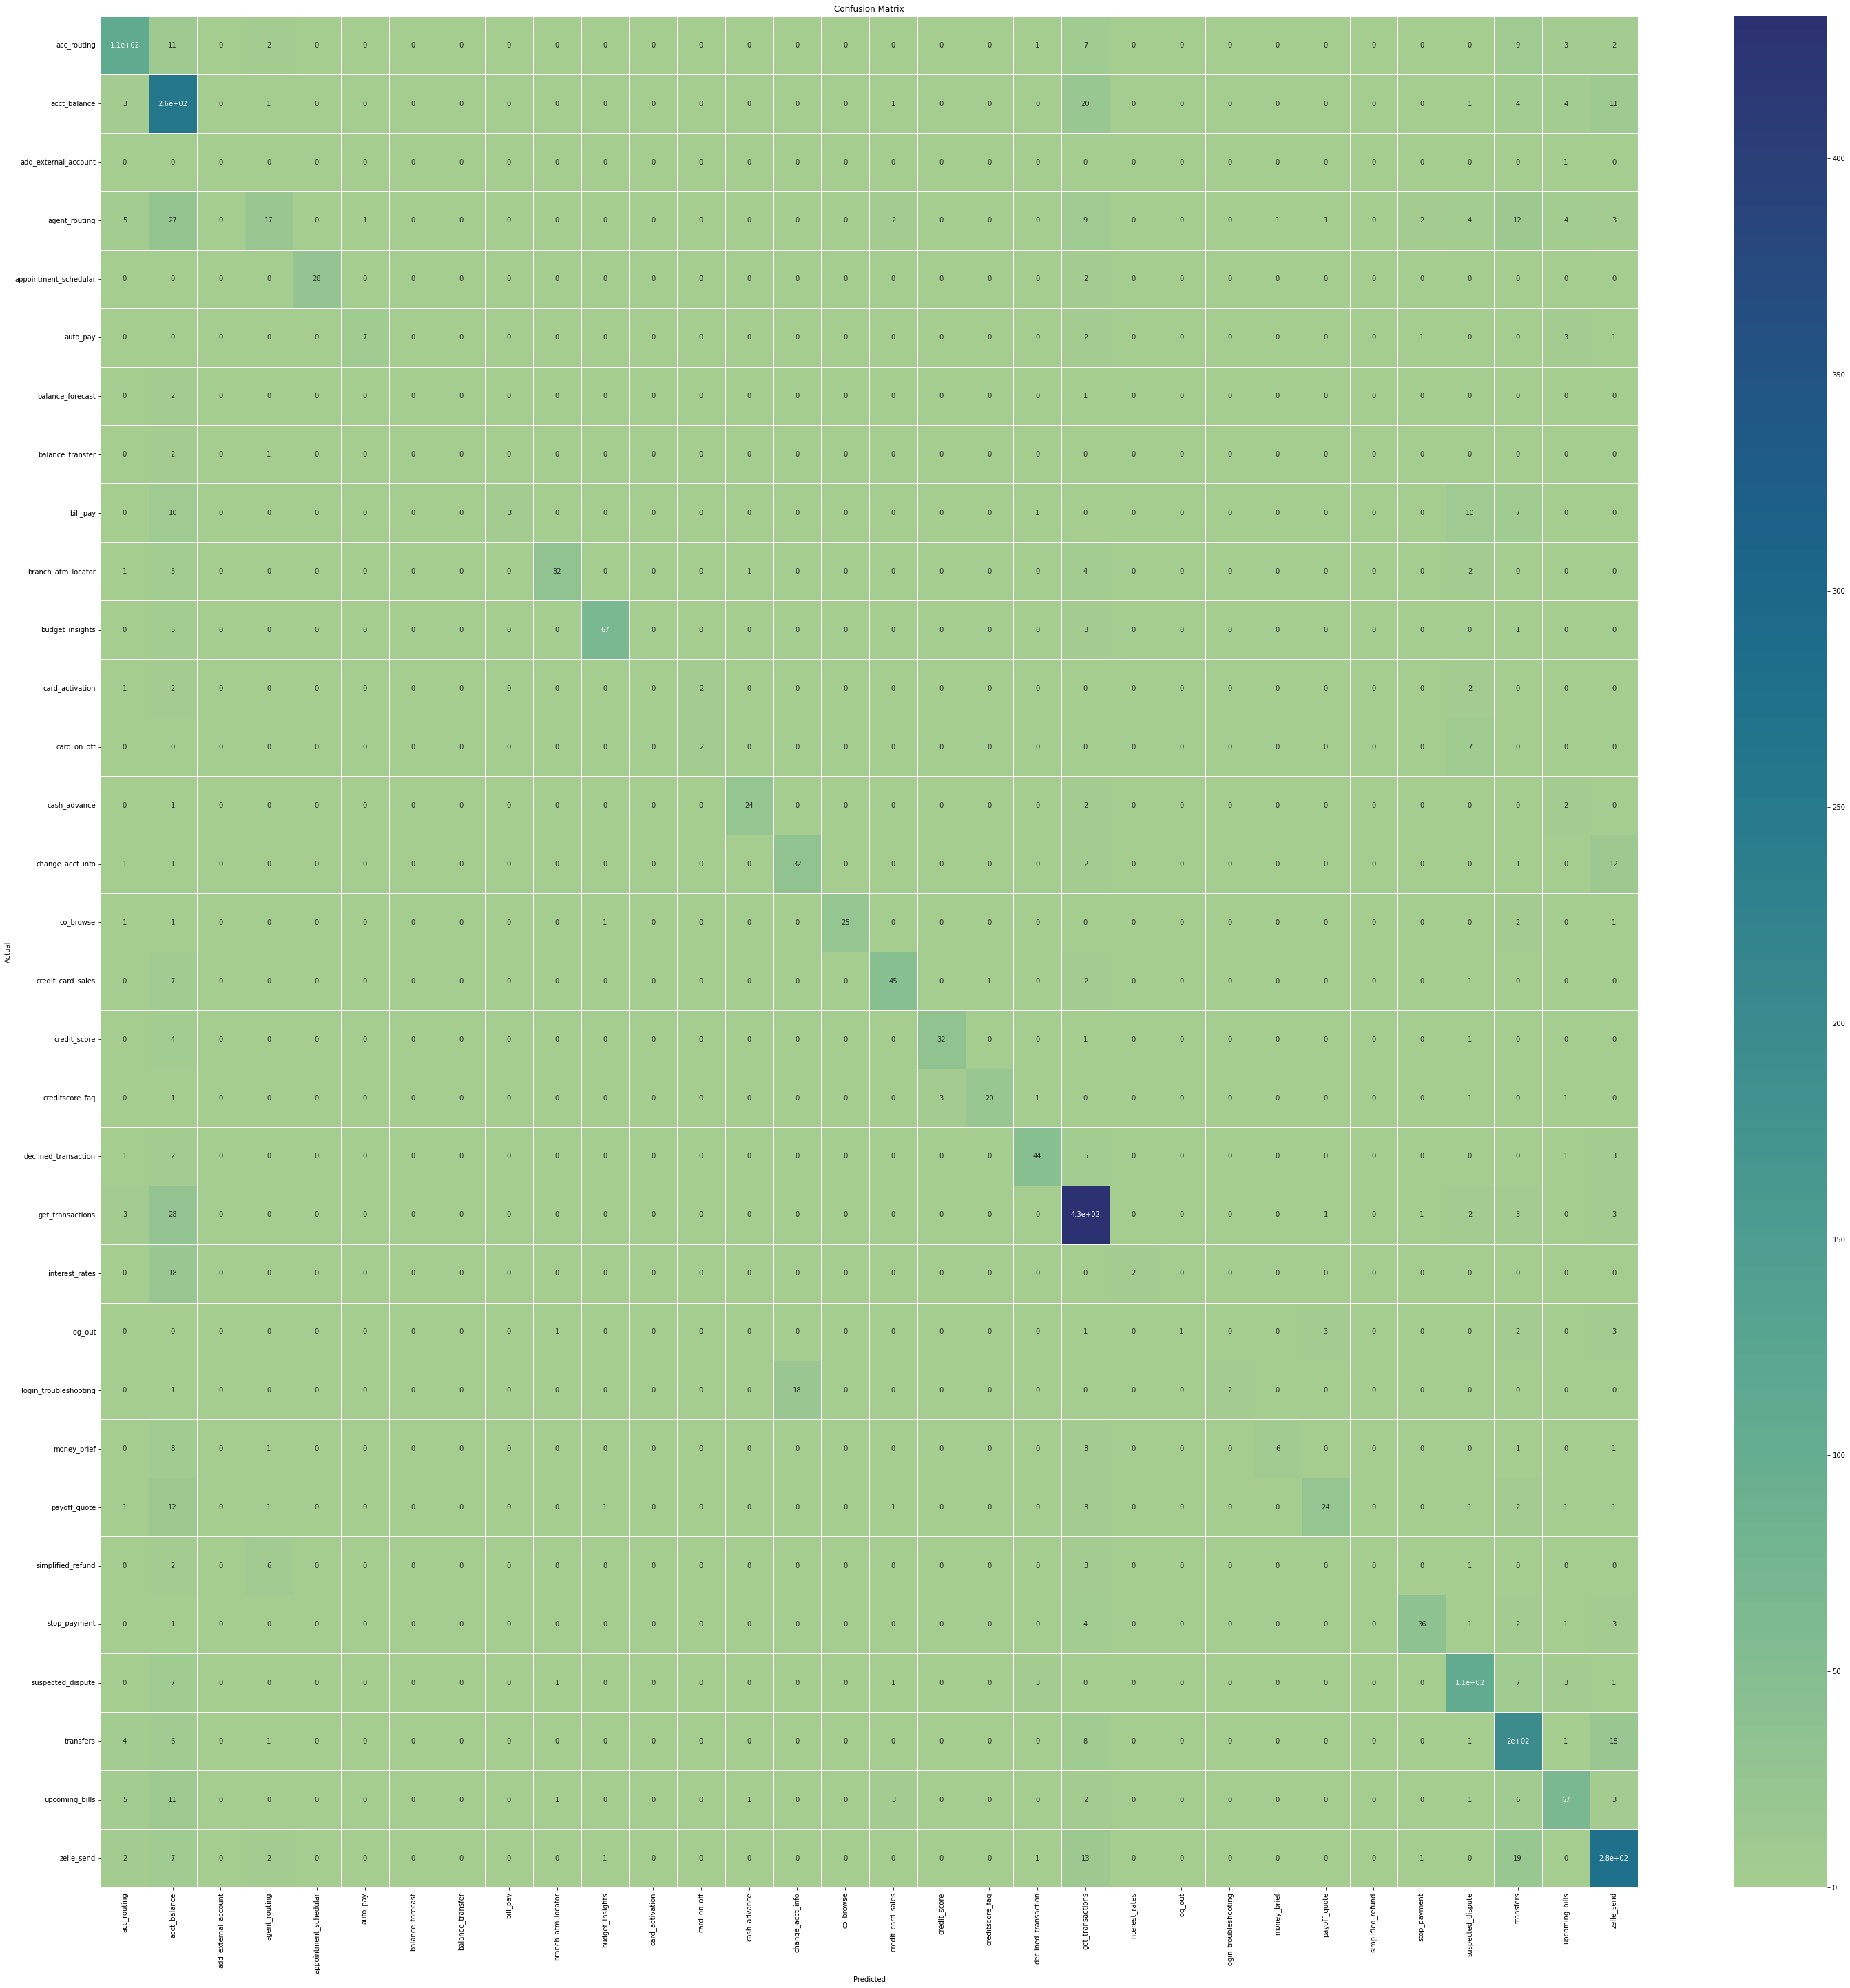

Total True Positives :  1896.0
Total False Positives :  586.0
Total True Negatives :  76356.0
Total False Negatives :  586.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          111           257                     0             17   
TN         2308          1998                  2481           2379   
FP           28           182                     0             15   
FN           35            45                     1             71   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     28         7                 0                 0   
TN                   2452      2467              2479              2479   
FP                      0         1                 0                 0   
FN                      2         7                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         3                  32               67                0   
TN      2451                2434             2403             2475   
FP         0                   3                3                0   
FN        28                  13                9                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            2            24                32         25                 45   
TN         2471          2451              2415       2451               2418   
FP            2             2                18          0                  8   
FN            7             5                17          6                 11   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            32               20                    44               433   
TN          2441             2454                  2419              1911   
FP             3                1                     7                97   
FN             6                7                    12                41   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               2        1                      2            6            24   
TN            2462     2471                   2461         2461          2429   
FP               0        0                      0            1             5   
FN              18       10                     19           14            24   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            36                108        195   
TN               2470          2429               2315       2170   
FP                  0             5                 36         78   
FN                 12            12                 23         39   

    upcoming_bills  zelle_send  
TP              67         276  
TN            2357        2094  
FP              25          66  
FN              33          46

In [80]:
"""
Now convert each message into a vector that machine learning models can understand.

"""

y = utterances['intent']
X = utterances['lemmatized_utterance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# Initialize uni-gram CountVectorizer
vectorizer = CountVectorizer()
X_train_v = vectorizer.fit_transform(X_train.values)

# Display count of data samples for each intent in y_test
#display(y_test.value_counts(sort=True, ascending=True))

# Initalize MNB classifier and fit with features
count_vectorizer_unigram_MNB_model = MultinomialNB().fit(X_train_v, y_train)

#print(f"X_test utterances", X_test)
X_test_v = vectorizer.transform(X_test.values)

# get the predictions for X_test using pipeline object
y_pred = count_vectorizer_unigram_MNB_model.predict(X_test_v)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB1")


In [84]:
print(count_vectorizer_unigram_MNB_model.predict(vectorizer.transform(["what's my account number"])))

['acc_routing']


Model building using MultiNomialNB (Naive Bayes) Model and bi-gram CountVectorizer for Classification

Accuracy: 0.7272360999194198
F1 score: 0.7054768890353917
                       precision    recall  f1-score   support

          acc_routing       0.82      0.73      0.78       146
         acct_balance       0.60      0.88      0.72       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.59      0.19      0.29        88
appointment_schedular       0.96      0.77      0.85        30
             auto_pay       1.00      0.57      0.73        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       0.86      0.19      0.32        31
   branch_atm_locator       1.00      0.33      0.50        45
      budget_insights       0.91      0.63      0.74        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.25      0.11      0.15         9
         cash_advance       1.00      0.79      0.88       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


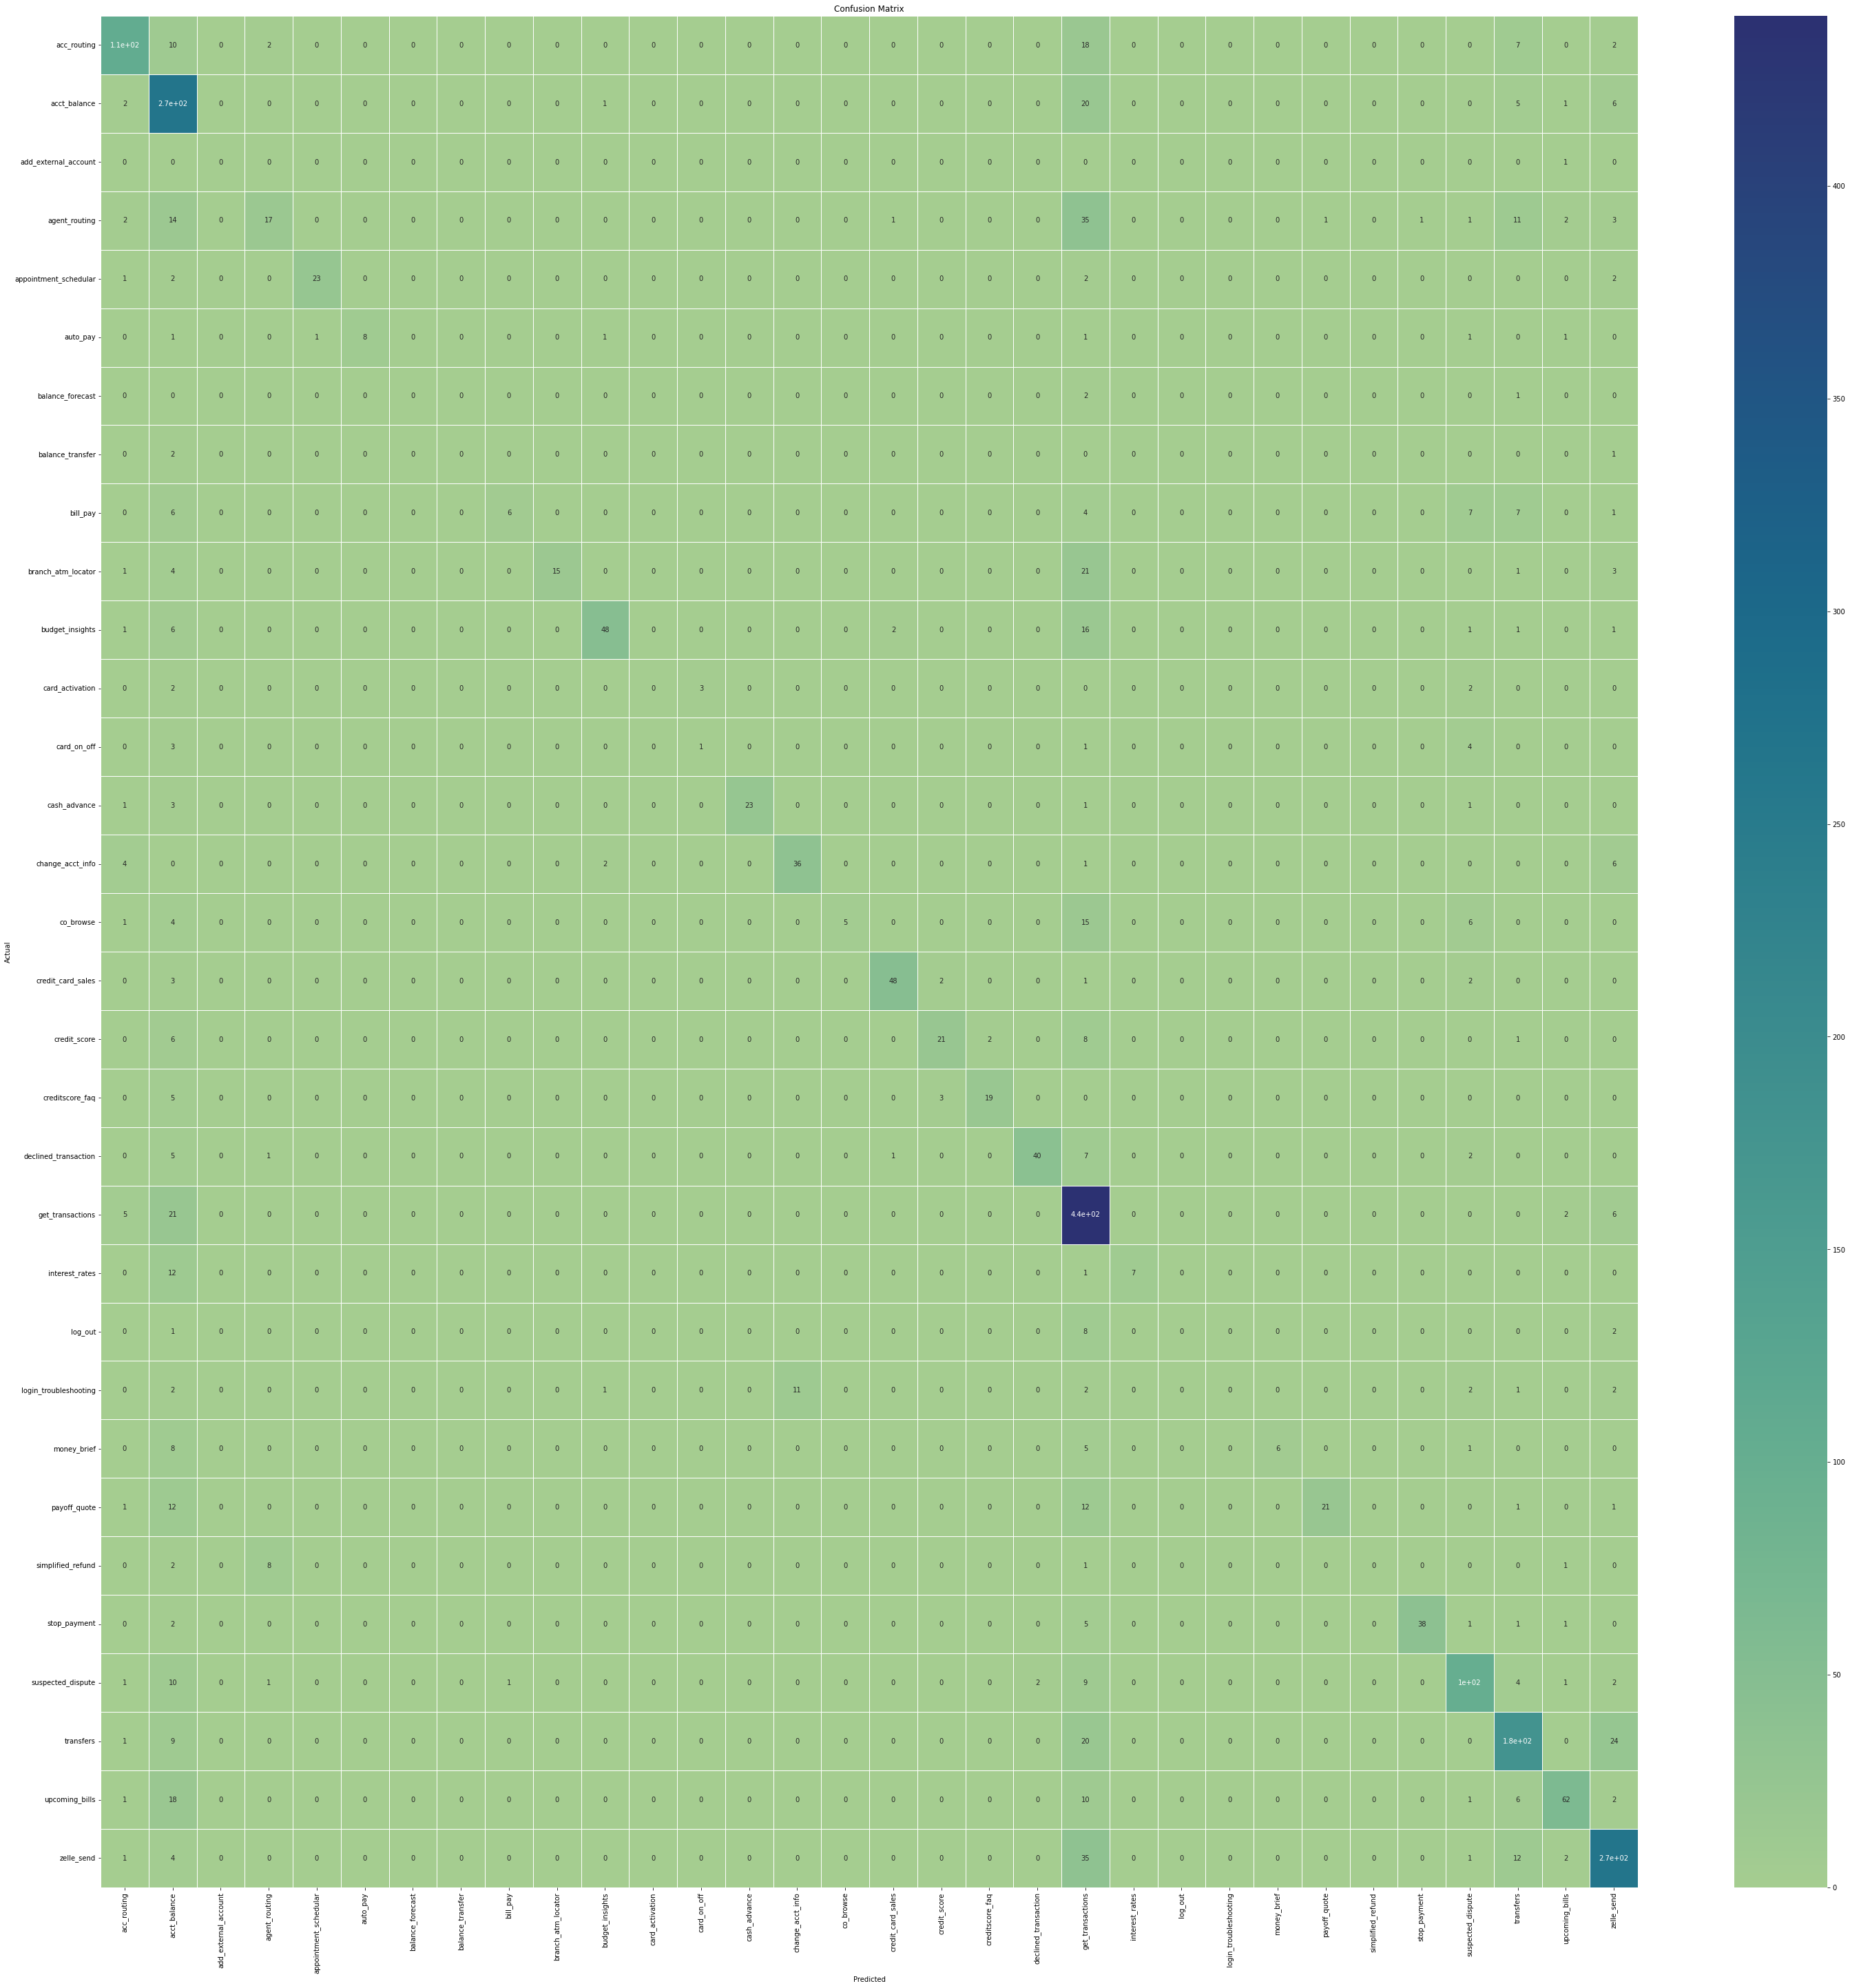

Total True Positives :  1805.0
Total False Positives :  677.0
Total True Negatives :  76265.0
Total False Negatives :  677.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          107           267                     0             17   
TN         2313          2003                  2481           2382   
FP           23           177                     0             12   
FN           39            35                     1             71   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     23         8                 0                 0   
TN                   2451      2468              2479              2479   
FP                      1         0                 0                 0   
FN                      7         6                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         6                  15               48                0   
TN      2450                2437             2401             2475   
FP         1                   0                5                0   
FN        25                  30               28                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            1            23                36          5                 48   
TN         2470          2453              2422       2451               2422   
FP            3             0                11          0                  4   
FN            8             6                13         26                  8   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            21               19                    40               440   
TN          2439             2453                  2424              1747   
FP             5                2                     2               261   
FN            17                8                    16                34   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               7        0                      0            6            21   
TN            2462     2471                   2461         2462          2433   
FP               0        0                      0            0             1   
FN              13       11                     21           14            27   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            38                100        180   
TN               2470          2433               2318       2189   
FP                  0             1                 33         59   
FN                 12            10                 31         54   

    upcoming_bills  zelle_send  
TP              62         267  
TN            2370        2096  
FP              12          64  
FN              38          55

In [85]:
# bi-gram CountVectorizer using pipeline approach

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Creating a pipeline object
count_vector_MNB_pipeline = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (2, 2))), 
     ('Multi NB', MultinomialNB())         
])
 
# fit with features
count_vector_MNB_pipeline.fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = count_vector_MNB_pipeline.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB2")

In [92]:
print(count_vector_MNB_pipeline.predict(["can you give me the account #?"]))

['acc_routing']


Model building using MultiNomialNB (Naive Bayes) Model and uni-gram and bi-gram CountVectorizer for Classification

Accuracy: 0.7998839907192575
F1 score: 0.7932185704801833
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.79      0.90      0.84        29
                                activate_my_card       0.70      0.93      0.80        28
                                       age_limit       1.00      1.00      1.00        18
                         apple_pay_or_google_pay       0.96      1.00      0.98        22
                                     atm_support       0.88      0.50      0.64        14
                                automatic_top_up       1.00      0.82      0.90        22
         balance_not_updated_after_bank_transfer       0.64      0.87      0.74        31
balance_not_updated_after_cheque_or_cash_deposit       0.62      0.88      0.73        33
                         beneficiary_not_allowed       0.81      0.78      0.79        27
                                 cancel_t

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


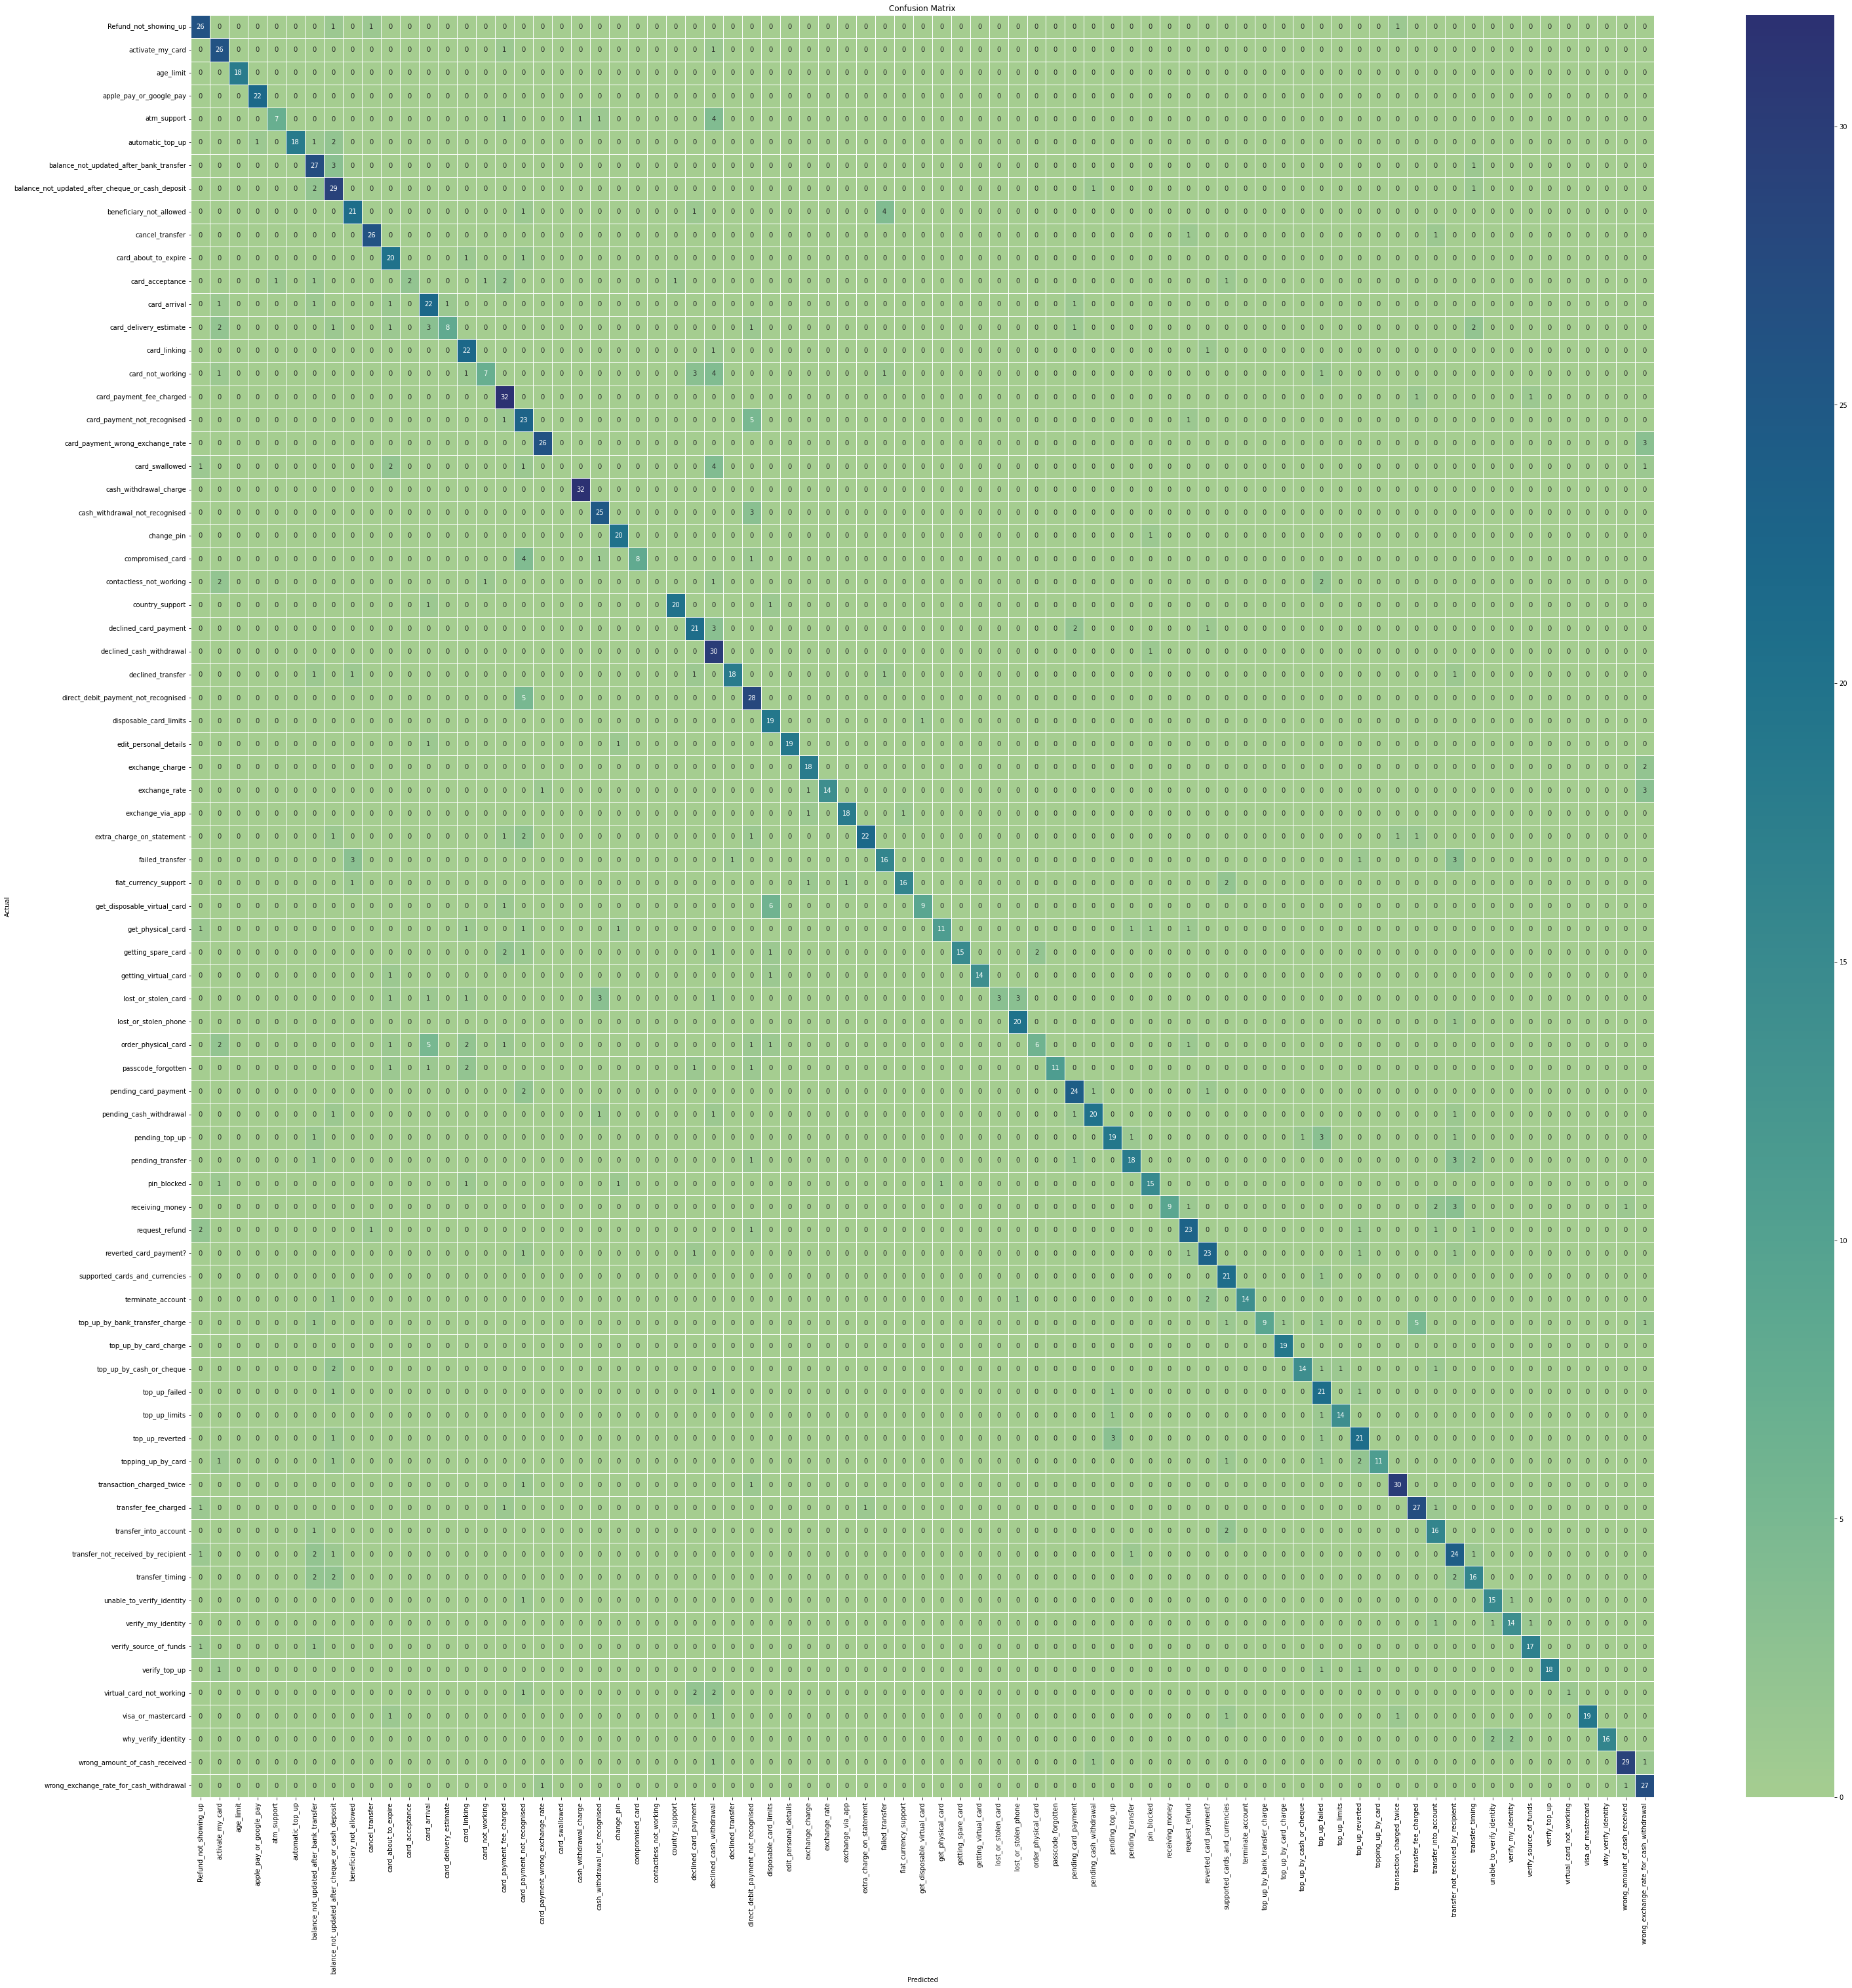

Total True Positives :  1379.0
Total False Positives :  345.0
Total True Negatives :  130679.0
Total False Negatives :  345.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     26                26         18   
TN                   1688              1685       1706   
FP                      7                11          0   
FN                      3                 2          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       22            7                18   
TN                     1701         1709              1702   
FP                        1            1                 0   
FN                        0            7                 4   

    balance_not_updated_after_bank_transfer  \
TP                                       27   
TN                                     1678   
FP                                       15   
FN                                        4   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                29                       21   
TN                                              1673                     1692   
FP                                                18                        5   
FN                                                 4                        6   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               26                    20                2            22   
TN             1694                  1693             1715          1685   
FP                2                     9                0            12   
FN                2                     2                7             5   

    card_delivery_estimate  card_linking  card_not_working  \
TP                       8            22                 7   
TN                    1704          1691              1704   
FP                       1             9                 2   
FN                      11             2                11   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        32                           23   
TN                      1679                         1672   
FP                        11                           22   
FN                         2                            7   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                26               0                      32   
TN                              1693            1715                    1691   
FP                                 2               0                       1   
FN                                 3               9                       0   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              25          20                 8   
TN                            1690        1700              1710   
FP                               6           3                 0   
FN                               3           1                 6   

    contactless_not_working  country_support  declined_card_payment  \
TP                        0               20                     21   
TN                     1718             1701                   1688   
FP                        0                1                      9   
FN                        6                2                      6   

    declined_cash_withdrawal  declined_transfer  \
TP                        30                 18   
TN                      1667               1700   
FP                        26                  1   
FN                         1                  5   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   28                      19   
TN                                 1675                    1694   
FP                                   16                      10   
FN                                    5                       1   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# uni-gram, bi-gram CountVectorizer
unibigram_vectorizer = CountVectorizer(ngram_range=(1,2)).fit_transform(utterances['lemmatized_utterance'])
X = np.array(unibigram_vectorizer.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_unibigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_unibigram_MNB_model.predict(X_test)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB12")

Model building using MultiNomialNB (Naive Bayes) Model and uni-gram, bi-gram, tri-gram CountVectorizer for Classification

Accuracy: 0.7900232018561485
F1 score: 0.7864094091380769
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.93      0.97      0.95        29
                                activate_my_card       0.68      0.89      0.77        28
                                       age_limit       1.00      1.00      1.00        18
                         apple_pay_or_google_pay       0.85      1.00      0.92        22
                                     atm_support       0.88      0.50      0.64        14
                                automatic_top_up       0.95      0.86      0.90        22
         balance_not_updated_after_bank_transfer       0.70      0.70      0.70        30
balance_not_updated_after_cheque_or_cash_deposit       0.71      0.97      0.82        33
                         beneficiary_not_allowed       0.79      0.81      0.80        27
                                 cancel_t

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


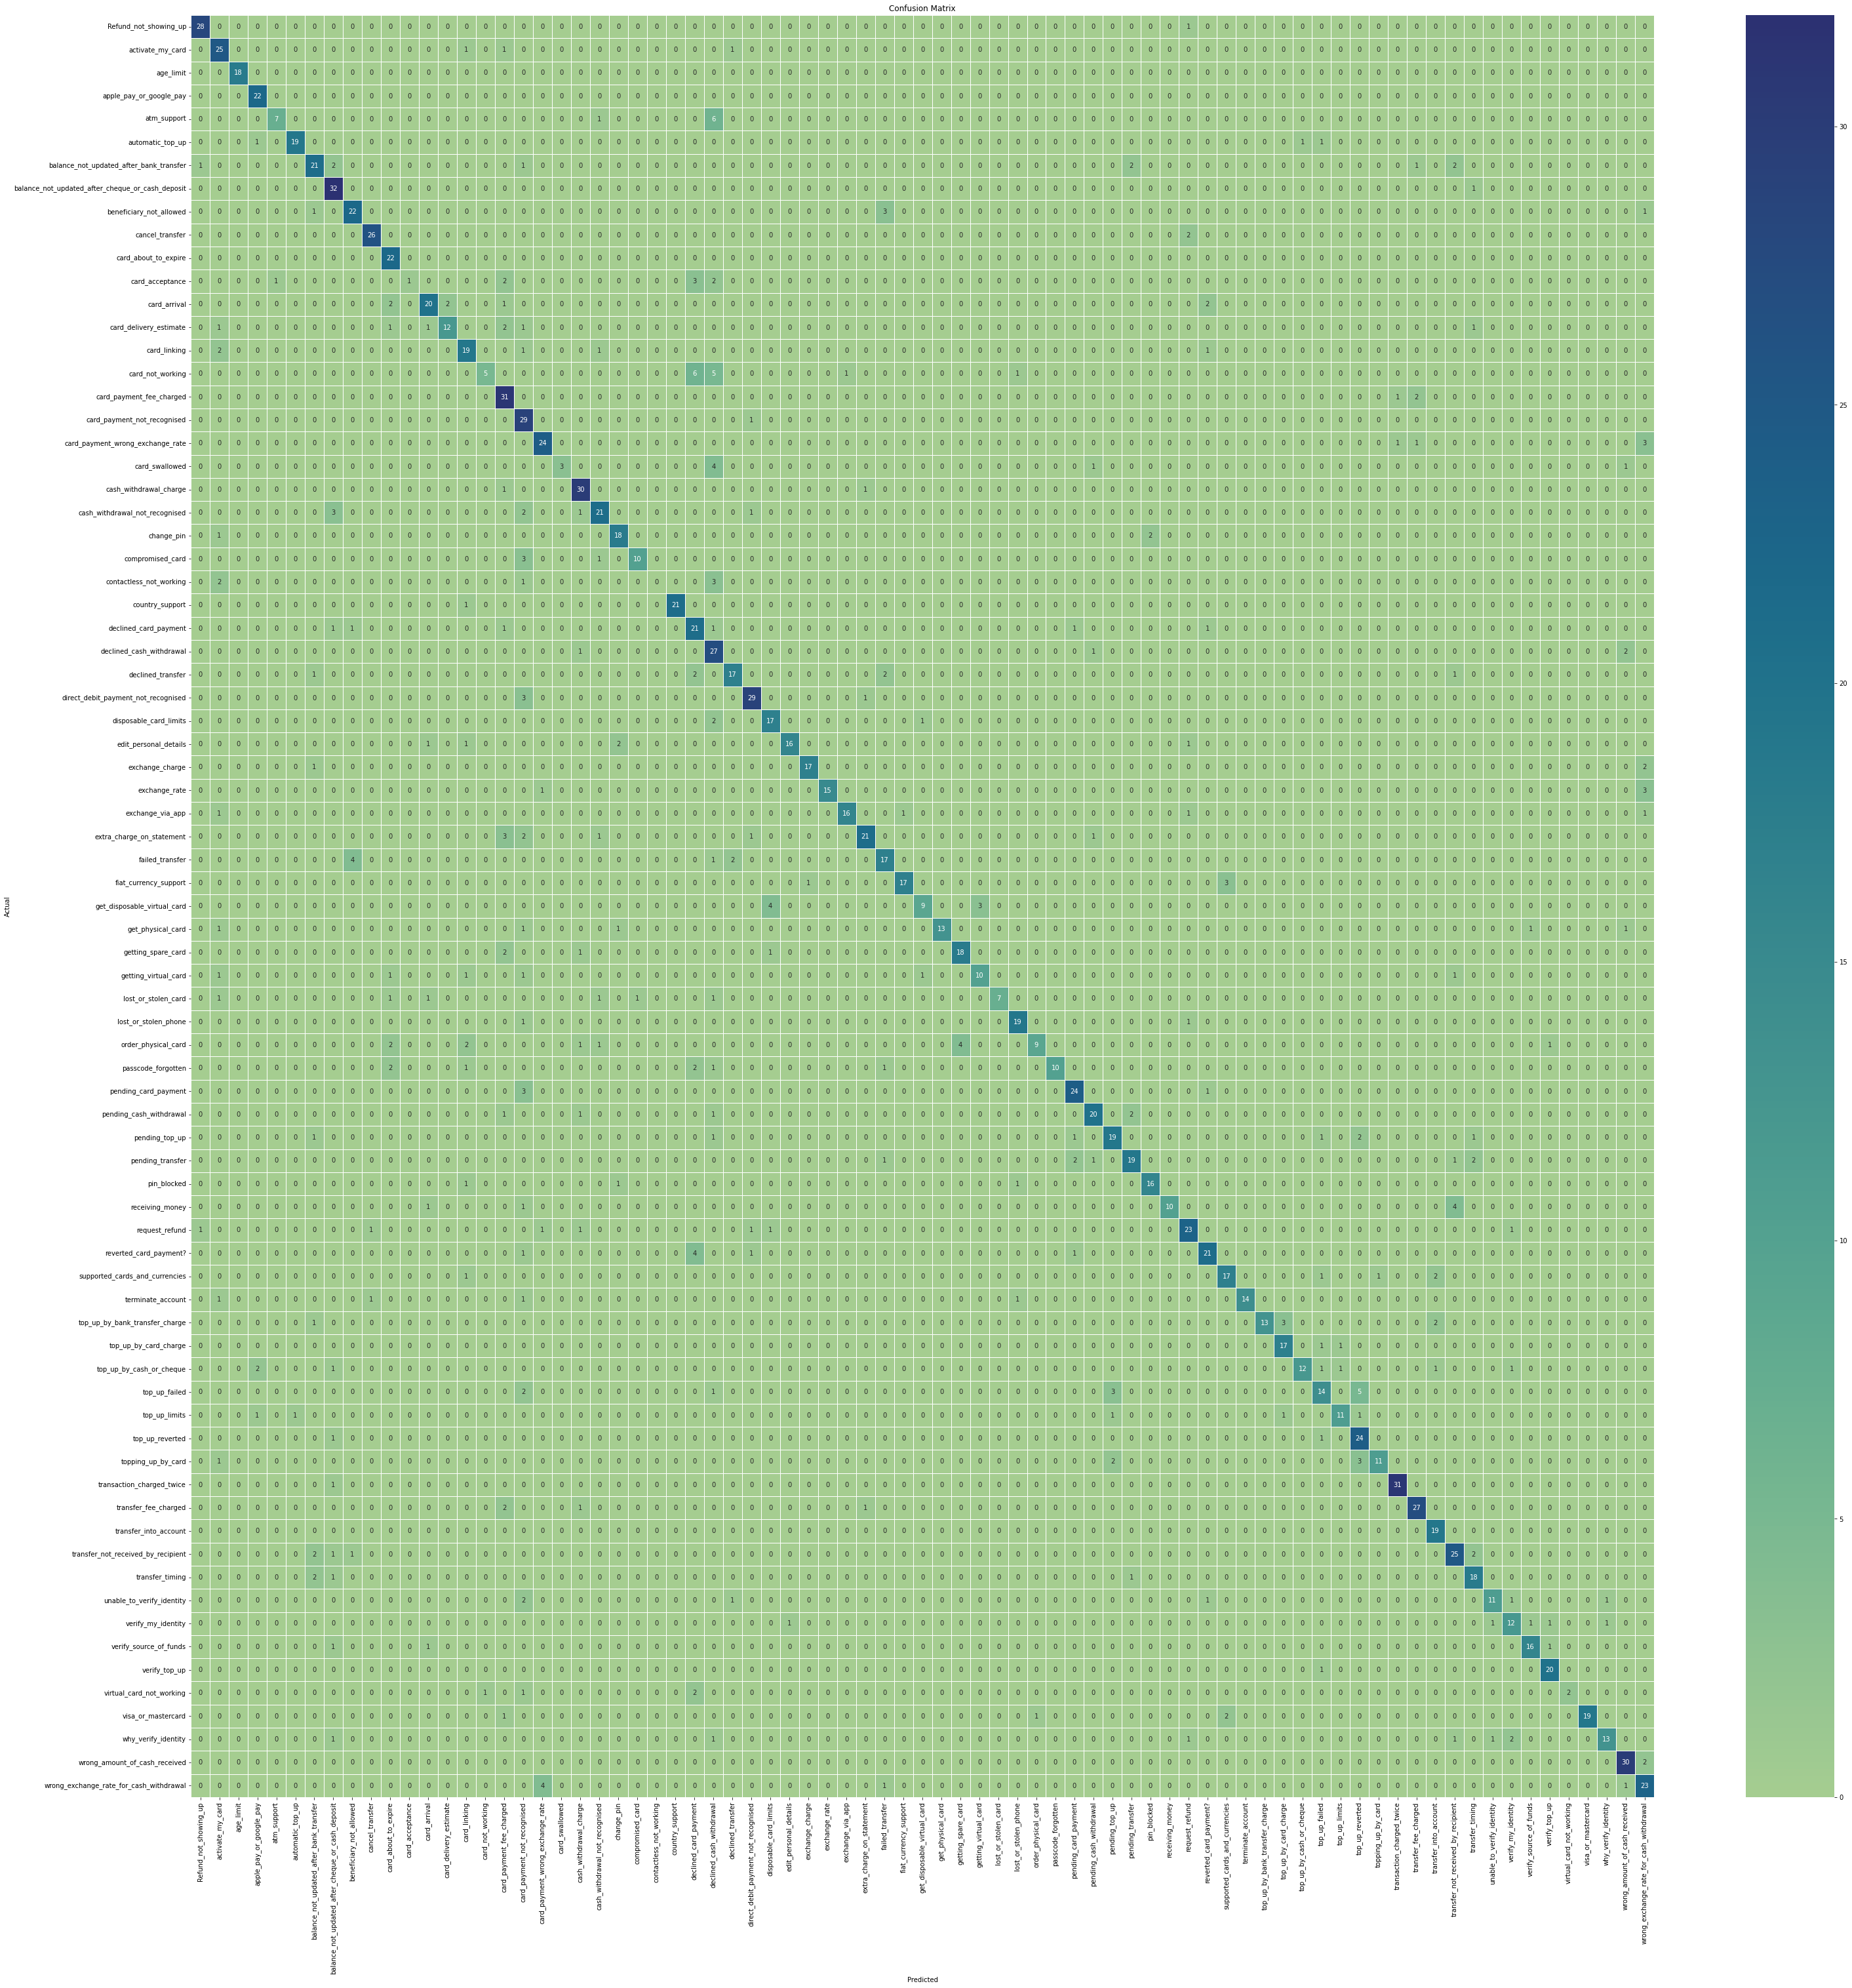

Total True Positives :  1362.0
Total False Positives :  362.0
Total True Negatives :  130662.0
Total False Negatives :  362.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     28                25         18   
TN                   1693              1684       1706   
FP                      2                12          0   
FN                      1                 3          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       22            7                19   
TN                     1698         1709              1701   
FP                        4            1                 1   
FN                        0            7                 3   

    balance_not_updated_after_bank_transfer  \
TP                                       21   
TN                                     1685   
FP                                        9   
FN                                        9   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                32                       22   
TN                                              1678                     1691   
FP                                                13                        6   
FN                                                 1                        5   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               26                    22                1            20   
TN             1694                  1693             1715          1692   
FP                2                     9                0             5   
FN                2                     0                8             7   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      12            19                 5   
TN                    1703          1691              1705   
FP                       2             9                 1   
FN                       7             5                13   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        31                           29   
TN                      1673                         1666   
FP                        17                           28   
FN                         3                            1   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                24               3                      30   
TN                              1689            1715                    1685   
FP                                 6               0                       7   
FN                                 5               6                       2   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              21          18                10   
TN                            1690        1699              1709   
FP                               6           4                 1   
FN                               7           3                 4   

    contactless_not_working  country_support  declined_card_payment  \
TP                        0               21                     21   
TN                     1718             1702                   1678   
FP                        0                0                     19   
FN                        6                1                      6   

    declined_cash_withdrawal  declined_transfer  \
TP                        27                 17   
TN                      1663               1697   
FP                        30                  4   
FN                         4                  6   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   29                      17   
TN                                 1686                    1698   
FP                                    5                       6   
FN                                    4                       3   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# uni-gram, bi-gram, tri-gram CountVectorizer

trigram_vectorizer = CountVectorizer(ngram_range=(1,3)).fit_transform(utterances['lemmatized_utterance'])
X = np.array(trigram_vectorizer.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_trigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_trigram_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB123")

Model building using MultiNomialNB (Naive Bayes) Model and trigram CountVectorizer for Classification

Accuracy: 0.6624129930394431
F1 score: 0.6651922904788807
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.61      0.66      0.63        29
                                activate_my_card       0.73      0.68      0.70        28
                                       age_limit       0.65      0.72      0.68        18
                         apple_pay_or_google_pay       0.87      0.59      0.70        22
                                     atm_support       1.00      0.36      0.53        14
                                automatic_top_up       1.00      0.82      0.90        22
         balance_not_updated_after_bank_transfer       0.60      0.58      0.59        31
balance_not_updated_after_cheque_or_cash_deposit       0.46      0.76      0.57        33
                         beneficiary_not_allowed       0.66      0.70      0.68        27
                                 cancel_t

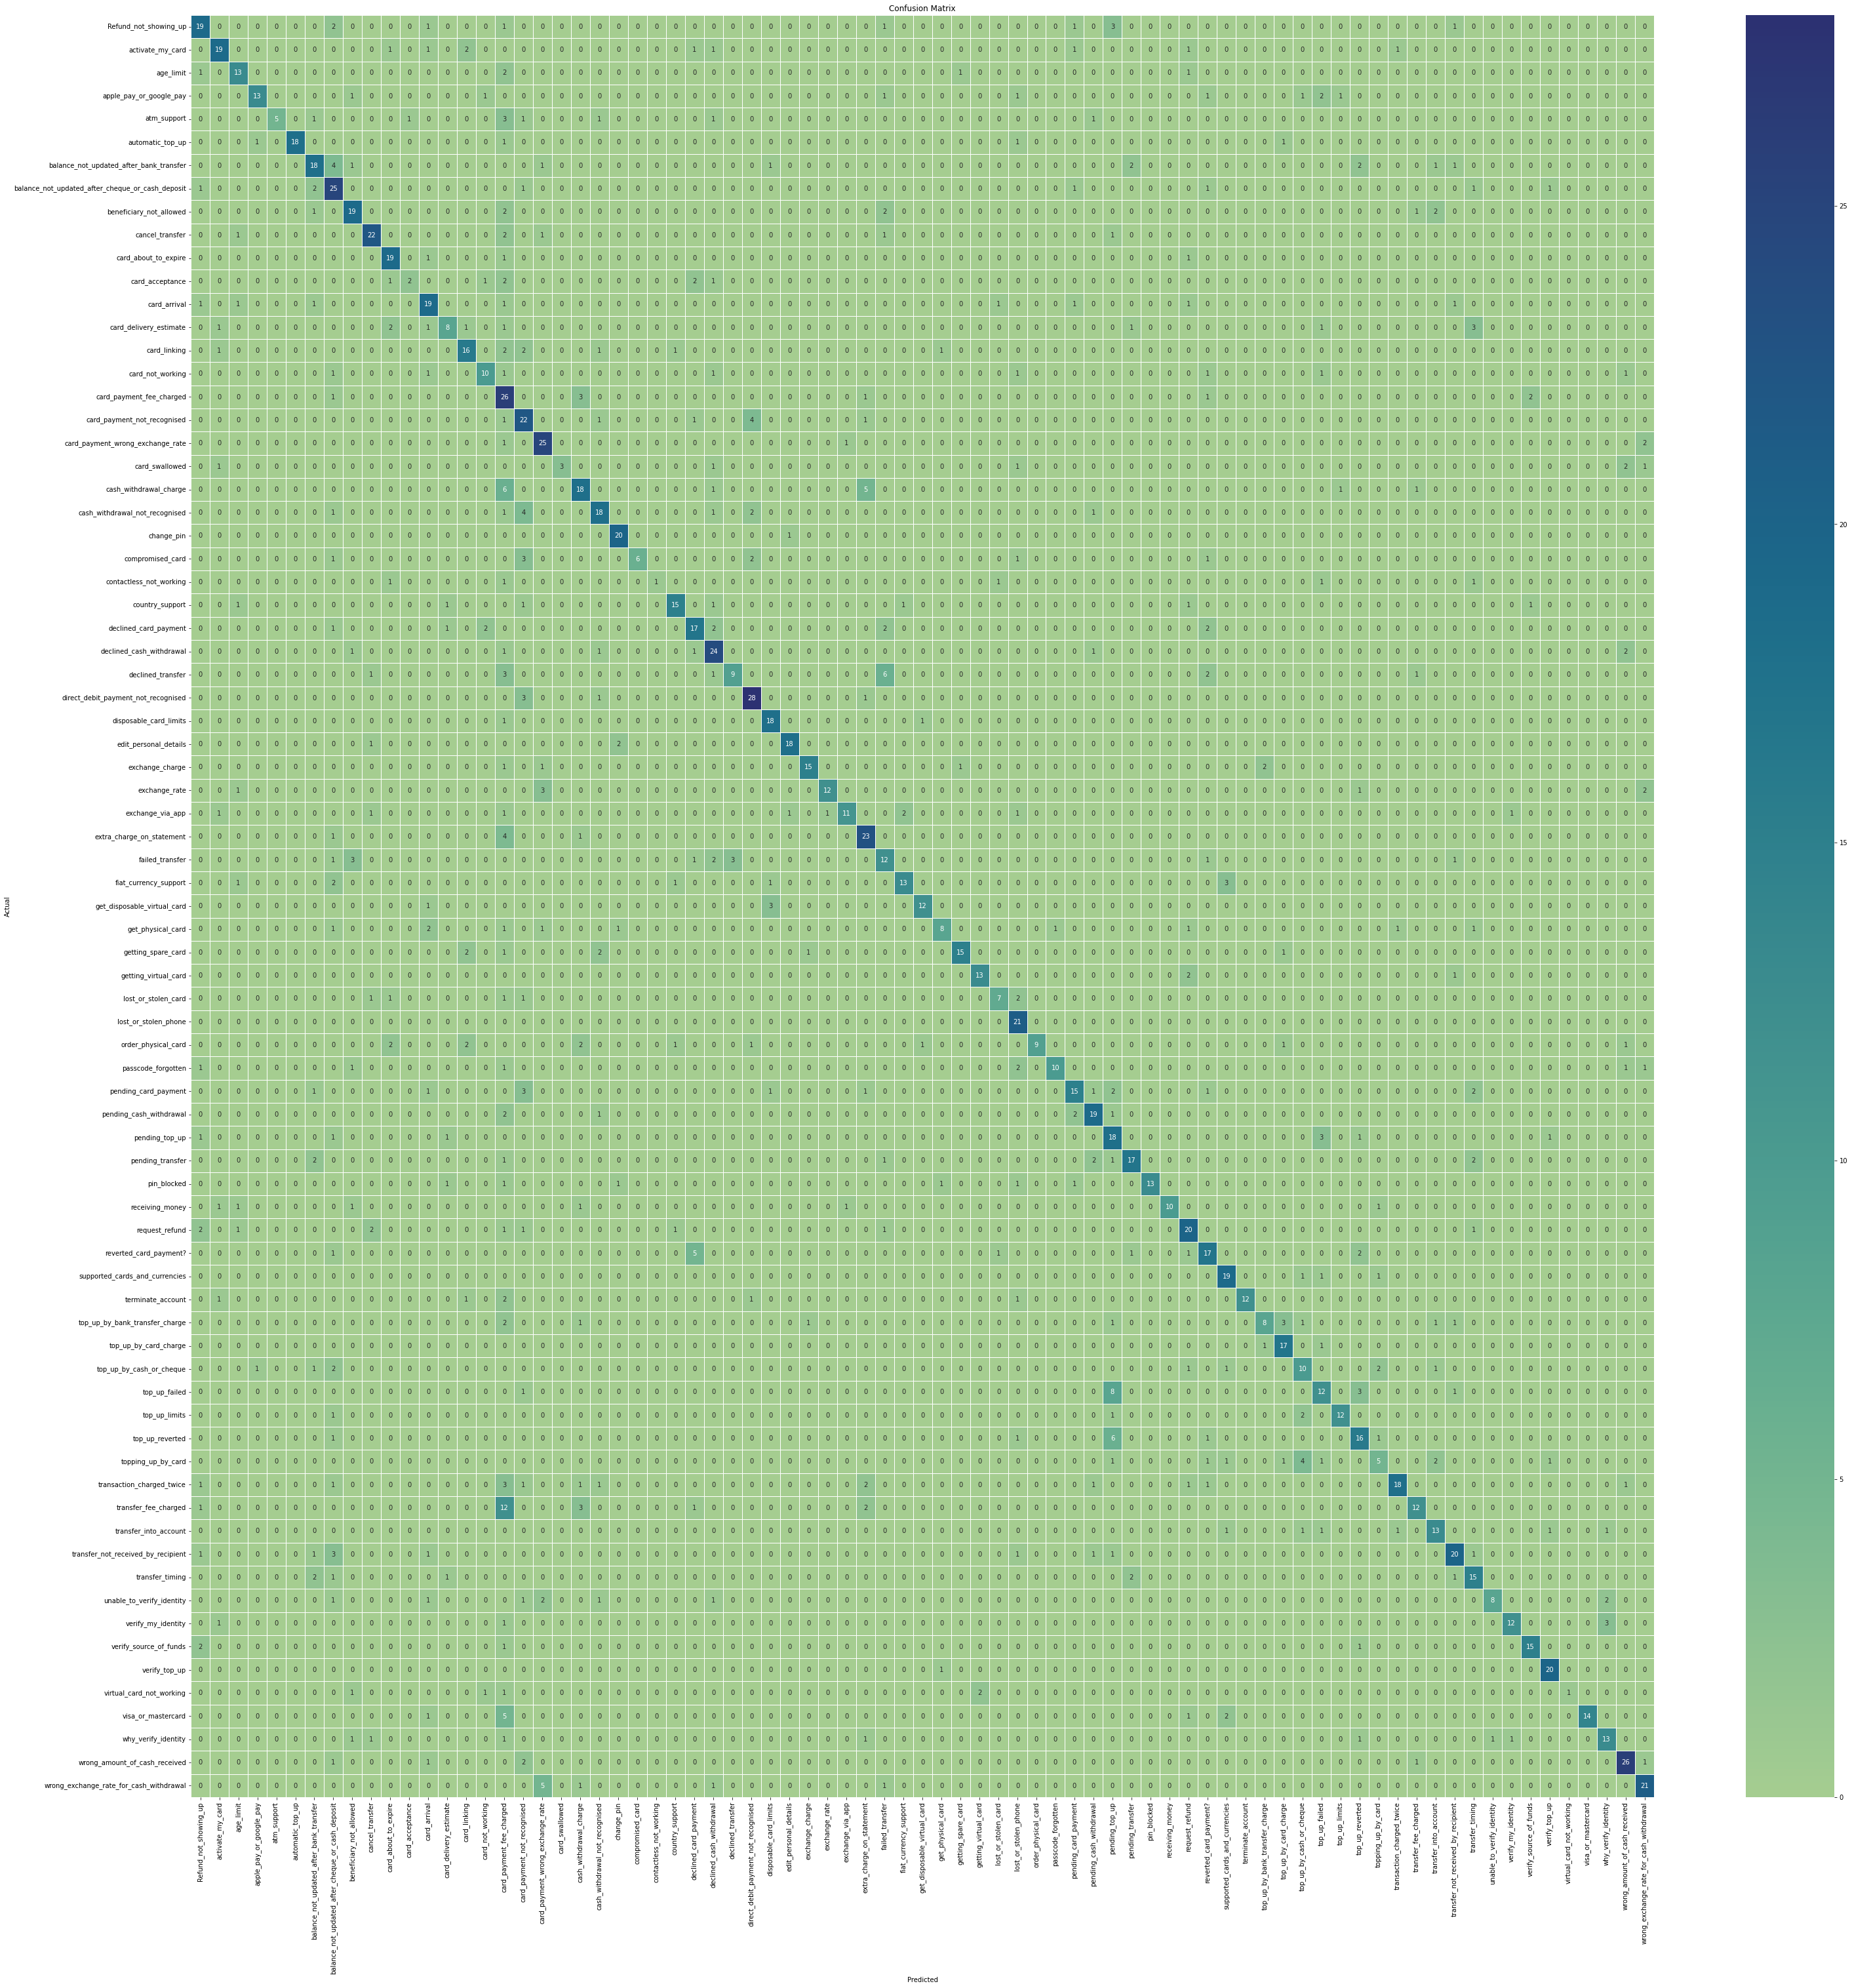

Total True Positives :  1142.0
Total False Positives :  582.0
Total True Negatives :  130442.0
Total False Negatives :  582.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     19                19         13   
TN                   1683              1689       1699   
FP                     12                 7          7   
FN                     10                 9          5   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       13            5                18   
TN                     1700         1710              1702   
FP                        2            0                 0   
FN                        9            9                 4   

    balance_not_updated_after_bank_transfer  \
TP                                       18   
TN                                     1681   
FP                                       12   
FN                                       13   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                25                       19   
TN                                              1662                     1687   
FP                                                29                       10   
FN                                                 8                        8   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               22                    19                2            19   
TN             1689                  1694             1714          1684   
FP                7                     8                1            13   
FN                6                     3                7             8   

    card_delivery_estimate  card_linking  card_not_working  \
TP                       8            16                10   
TN                    1700          1692              1701   
FP                       5             8                 5   
FN                      11             8                 8   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        26                           22   
TN                      1613                         1669   
FP                        77                           25   
FN                         8                            8   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                25               3                      18   
TN                              1681            1715                    1679   
FP                                14               0                      13   
FN                                 4               6                      14   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              18          20                 6   
TN                            1686        1699              1710   
FP                              10           4                 0   
FN                              10           1                 8   

    contactless_not_working  country_support  declined_card_payment  \
TP                        1               15                     17   
TN                     1718             1698                   1685   
FP                        0                4                     12   
FN                        5                7                     10   

    declined_cash_withdrawal  declined_transfer  \
TP                        24                  9   
TN                      1678               1698   
FP                        15                  3   
FN                         7                 14   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   28                      18   
TN                                 1681                    1698   
FP                                   10                       6   
FN                                    5                       2   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
#tri-gram CountVectorizer

trigram_vectorizer = CountVectorizer(ngram_range=(3,3)).fit_transform(utterances['lemmatized_utterance'])
X = np.array(trigram_vectorizer.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_trigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_trigram_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB3")

###Model building using MultiNomialNB (Naive Bayes) Model and tf-idf (term frequency - inverse document frequency) vectorizer for Classification


Accuracy: 0.8080046403712297
F1 score: 0.7958867296706319
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.88      1.00      0.94        29
                                activate_my_card       0.71      0.96      0.82        28
                                       age_limit       1.00      0.94      0.97        18
                         apple_pay_or_google_pay       0.91      0.95      0.93        22
                                     atm_support       1.00      0.36      0.53        14
                                automatic_top_up       0.92      1.00      0.96        22
         balance_not_updated_after_bank_transfer       0.66      0.87      0.75        31
balance_not_updated_after_cheque_or_cash_deposit       0.69      1.00      0.81        33
                         beneficiary_not_allowed       0.81      0.96      0.88        27
                                 cancel_t

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


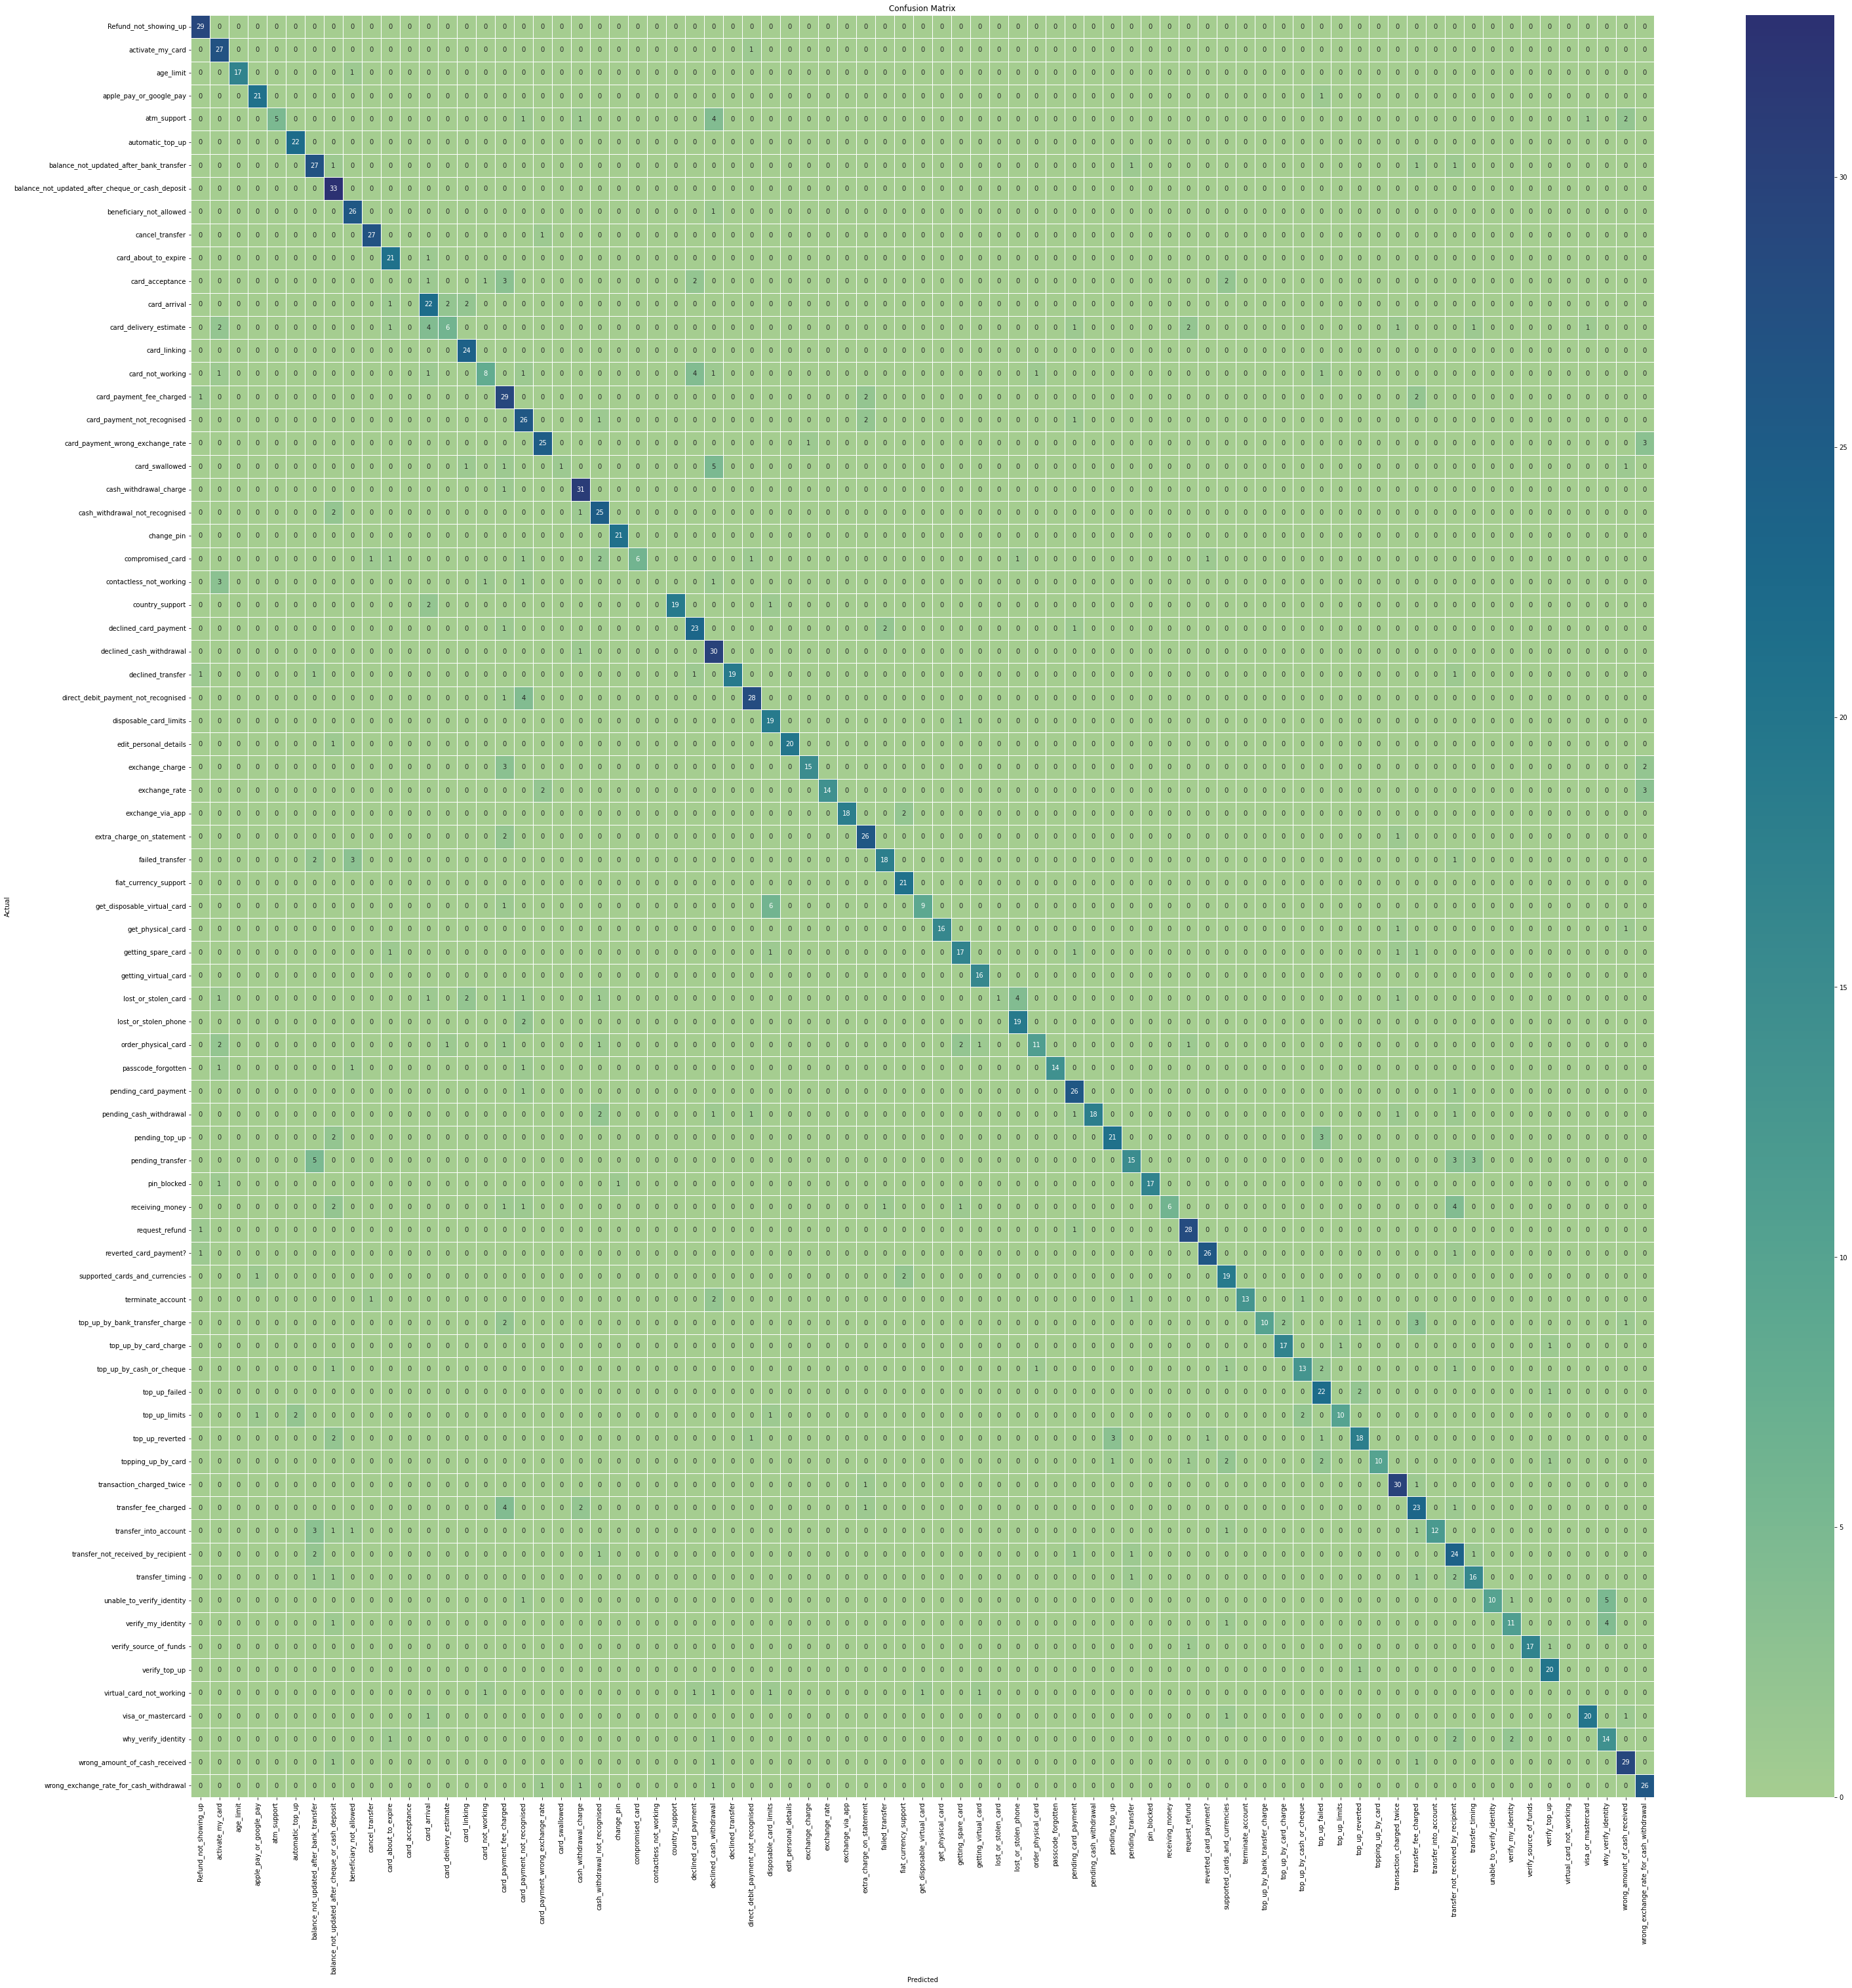

Total True Positives :  1393.0
Total False Positives :  331.0
Total True Negatives :  130693.0
Total False Negatives :  331.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     29                27         17   
TN                   1691              1685       1706   
FP                      4                11          0   
FN                      0                 1          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       21            5                22   
TN                     1700         1710              1700   
FP                        2            0                 2   
FN                        1            9                 0   

    balance_not_updated_after_bank_transfer  \
TP                                       27   
TN                                     1679   
FP                                       14   
FN                                        4   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                33                       26   
TN                                              1676                     1691   
FP                                                15                        6   
FN                                                 0                        1   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    21                0            22   
TN             1694                  1697             1715          1686   
FP                2                     5                0            11   
FN                1                     1                9             5   

    card_delivery_estimate  card_linking  card_not_working  \
TP                       6            24                 8   
TN                    1702          1695              1703   
FP                       3             5                 3   
FN                      13             0                10   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        29                           26   
TN                      1668                         1679   
FP                        22                           15   
FN                         5                            4   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                25               1                      31   
TN                              1691            1715                    1686   
FP                                 4               0                       6   
FN                                 4               8                       1   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              25          21                 6   
TN                            1688        1702              1710   
FP                               8           1                 0   
FN                               3           0                 8   

    contactless_not_working  country_support  declined_card_payment  \
TP                        0               19                     23   
TN                     1718             1702                   1689   
FP                        0                0                      8   
FN                        6                3                      4   

    declined_cash_withdrawal  declined_transfer  \
TP                        30                 19   
TN                      1674               1701   
FP                        19                  0   
FN                         1                  4   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   28                      19   
TN                                 1687                    1694   
FP                                    4                      10   
FN                                    5                       1   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Using TfidfVectorizer
tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
tfidfvectorizer_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = tfidfvectorizer_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNBTF1")

In [ ]:
# tf-idf vectorizer and MNB model using Pipeline approach

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# Creating a pipeline object
tfidf_vector_MNB_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
 
 #fit with features
tfidf_vector_MNB_pipeline.fit(X_train, y_train)

#get the predictions for X_test using pipeline object
y_pred = tfidf_vector_MNB_pipeline.predict(X_test)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

### Using KNN (K Nearest Neighbour) Model and CountVectorizer

##### Using ngram_range as unigram and bigram and metric as Euclidean distance.

Accuracy: 0.7088167053364269
F1 score: 0.7103115925303882
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.77      0.79      0.78        29
                                activate_my_card       0.58      0.89      0.70        28
                                       age_limit       0.85      0.94      0.89        18
                         apple_pay_or_google_pay       0.78      0.82      0.80        22
                                     atm_support       0.61      0.79      0.69        14
                                automatic_top_up       1.00      0.59      0.74        22
         balance_not_updated_after_bank_transfer       0.47      0.52      0.49        31
balance_not_updated_after_cheque_or_cash_deposit       0.82      0.70      0.75        33
                         beneficiary_not_allowed       0.65      0.63      0.64        27
                                 cancel_t

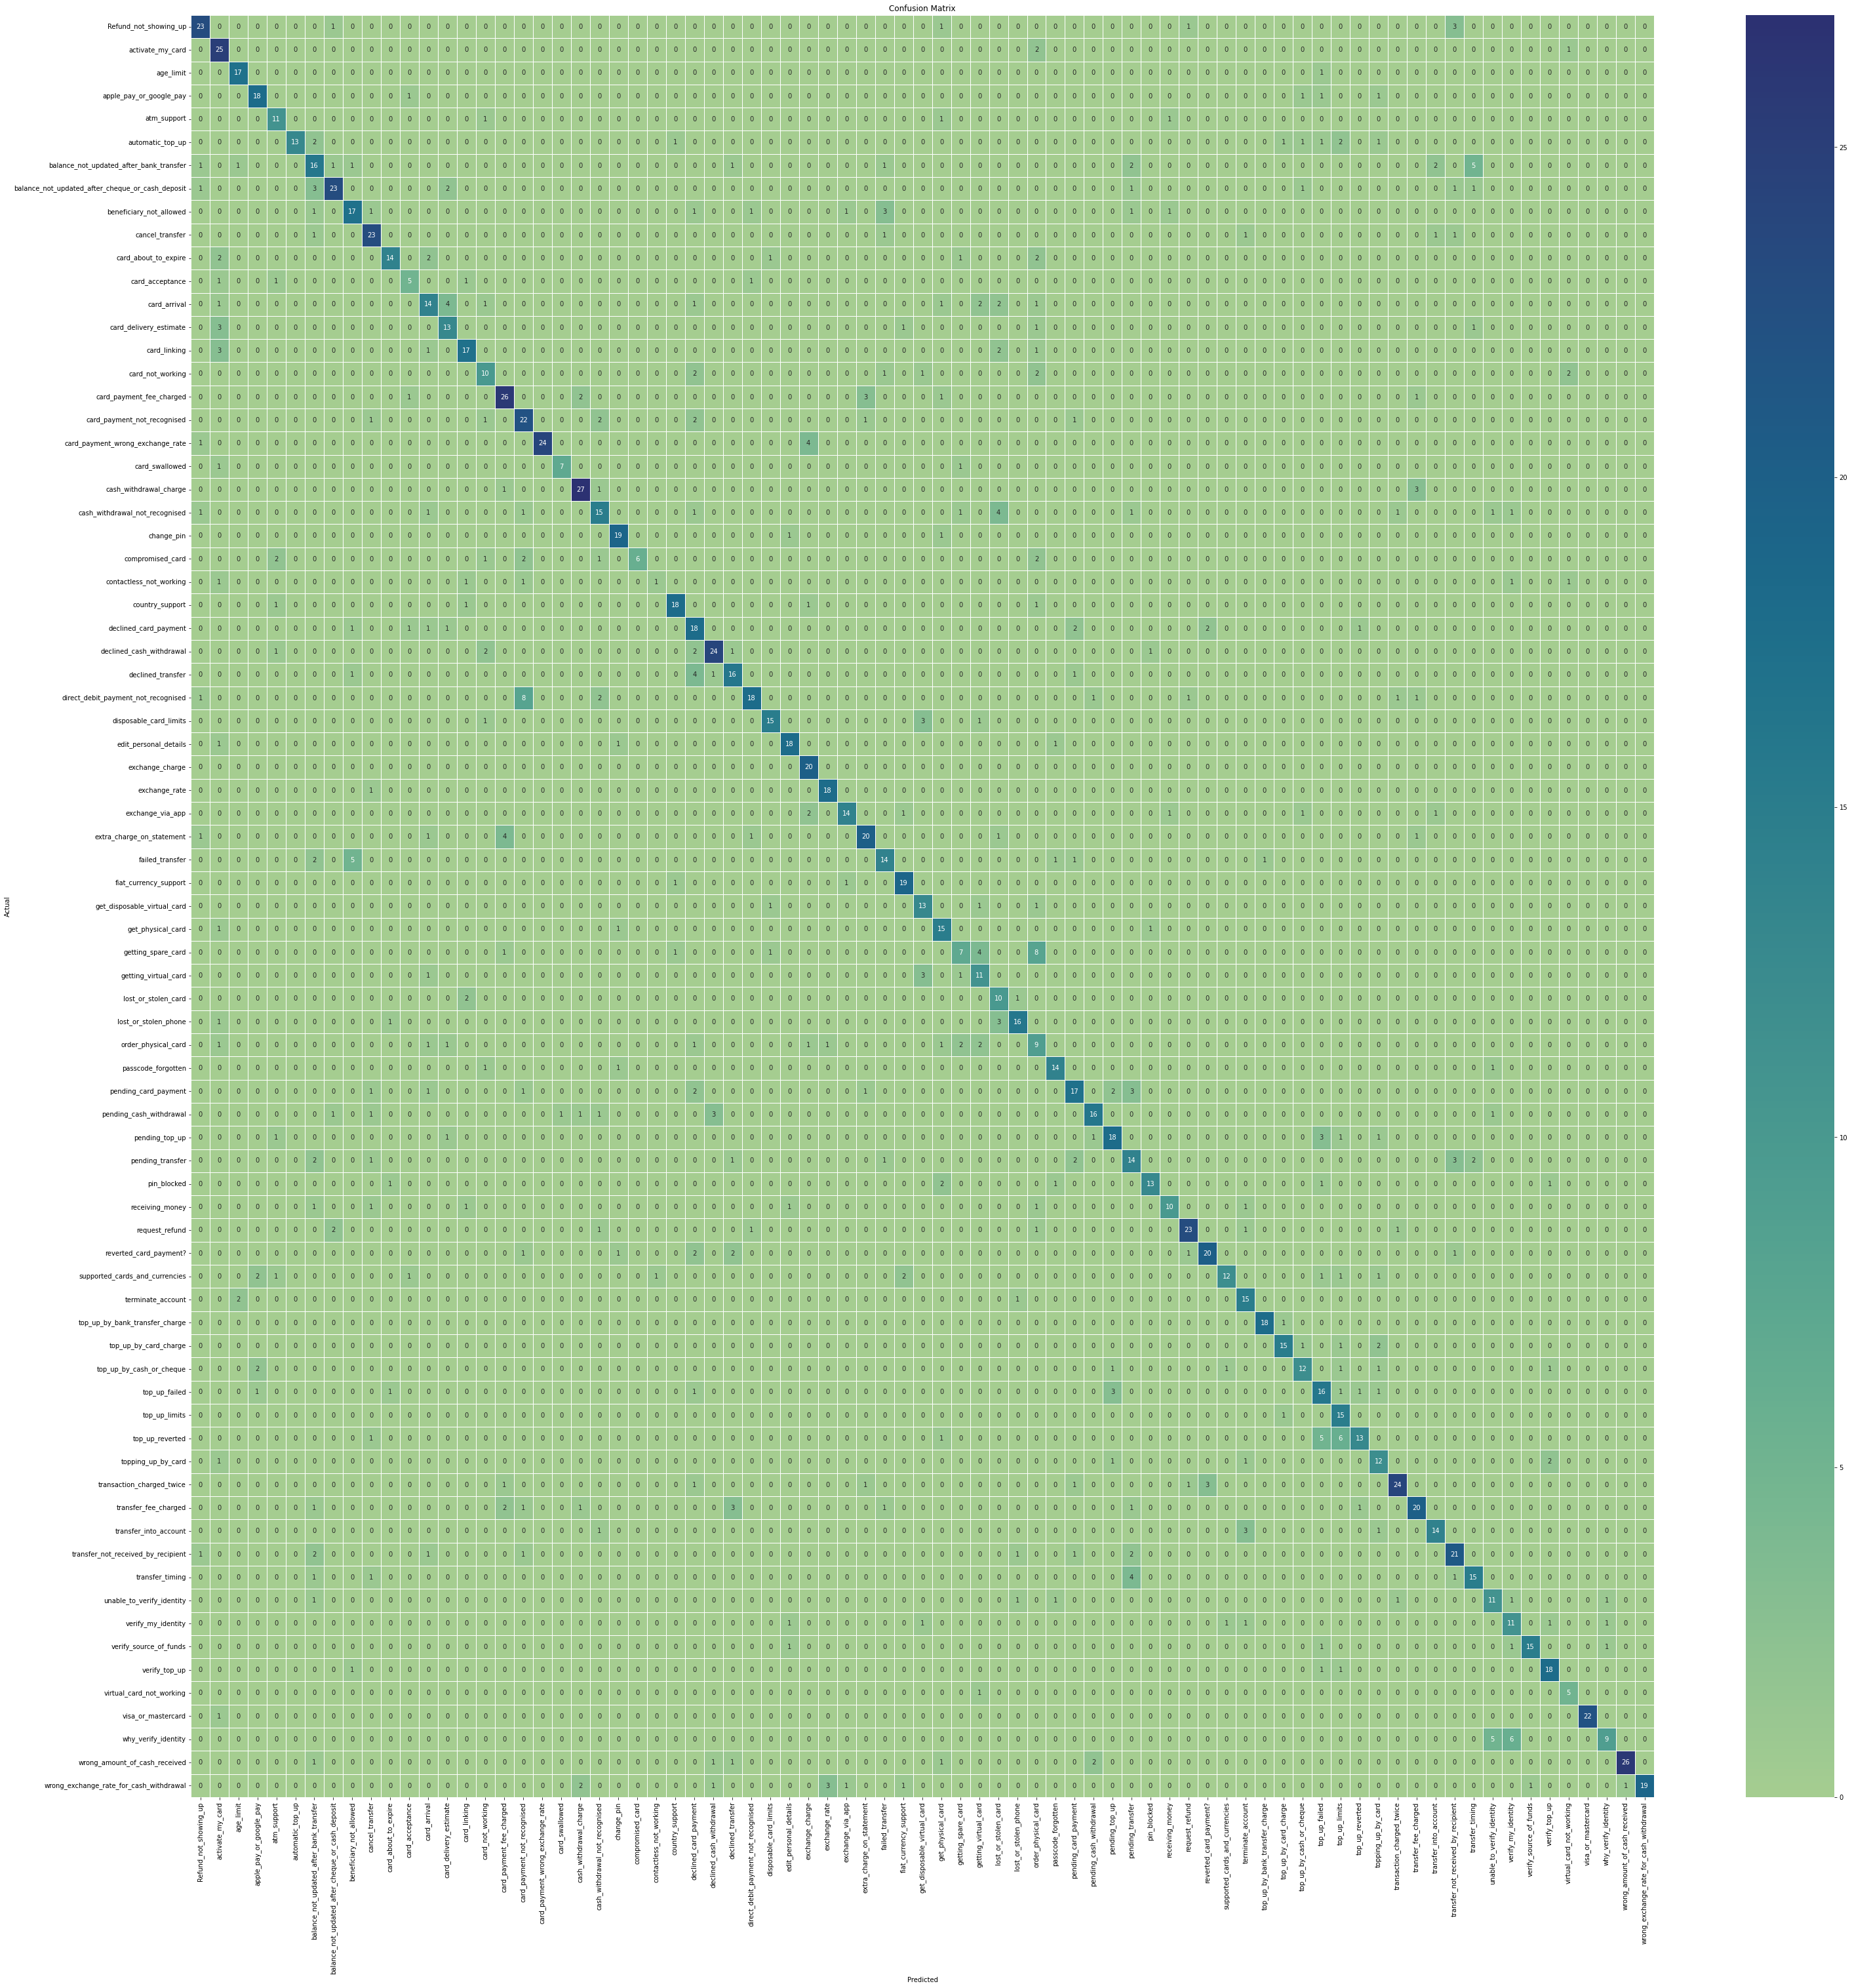

Total True Positives :  1222.0
Total False Positives :  502.0
Total True Negatives :  130522.0
Total False Negatives :  502.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     23                25         17   
TN                   1688              1678       1703   
FP                      7                18          3   
FN                      6                 3          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       18           11                13   
TN                     1697         1703              1702   
FP                        5            7                 0   
FN                        4            3                 9   

    balance_not_updated_after_bank_transfer  \
TP                                       16   
TN                                     1675   
FP                                       18   
FN                                       15   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                23                       17   
TN                                              1686                     1688   
FP                                                 5                        9   
FN                                                10                       10   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               23                    14                5            14   
TN             1687                  1699             1711          1687   
FP                9                     3                4            10   
FN                5                     8                4            13   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      13            17                10   
TN                    1696          1694              1698   
FP                       9             6                 8   
FN                       6             7                 8   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        26                           22   
TN                      1681                         1678   
FP                         9                           16   
FN                         8                            8   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                24               7                      27   
TN                              1695            1714                    1686   
FP                                 0               1                       6   
FN                                 5               2                       5   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              15          19                 6   
TN                            1687        1699              1710   
FP                               9           4                 0   
FN                              13           2                 8   

    contactless_not_working  country_support  declined_card_payment  \
TP                        1               18                     18   
TN                     1717             1699                   1677   
FP                        1                3                     20   
FN                        5                4                      9   

    declined_cash_withdrawal  declined_transfer  \
TP                        24                 16   
TN                      1687               1692   
FP                         6                  9   
FN                         7                  7   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   18                      15   
TN                                 1687                    1701   
FP                                    4                       3   
FN                                   15                       5   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# CountVectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
count_vector_KNN1_pipeline = Pipeline([
    ('vectorizer_count', CountVectorizer()),        #using the ngram_range parameter 
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'))         
])
 
 #fit with features
count_vector_KNN1_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = count_vector_KNN1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNN1")

##### Using ngram_range as unigram and metric as cosine distance.

Accuracy: 0.775522041763341
F1 score: 0.7777792874375138
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.85      0.76      0.80        29
                                activate_my_card       0.71      0.79      0.75        28
                                       age_limit       0.89      0.94      0.92        18
                         apple_pay_or_google_pay       1.00      0.86      0.93        22
                                     atm_support       1.00      0.64      0.78        14
                                automatic_top_up       0.90      0.82      0.86        22
         balance_not_updated_after_bank_transfer       0.58      0.61      0.59        31
balance_not_updated_after_cheque_or_cash_deposit       0.90      0.82      0.86        33
                         beneficiary_not_allowed       0.59      0.74      0.66        27
                                 cancel_tr

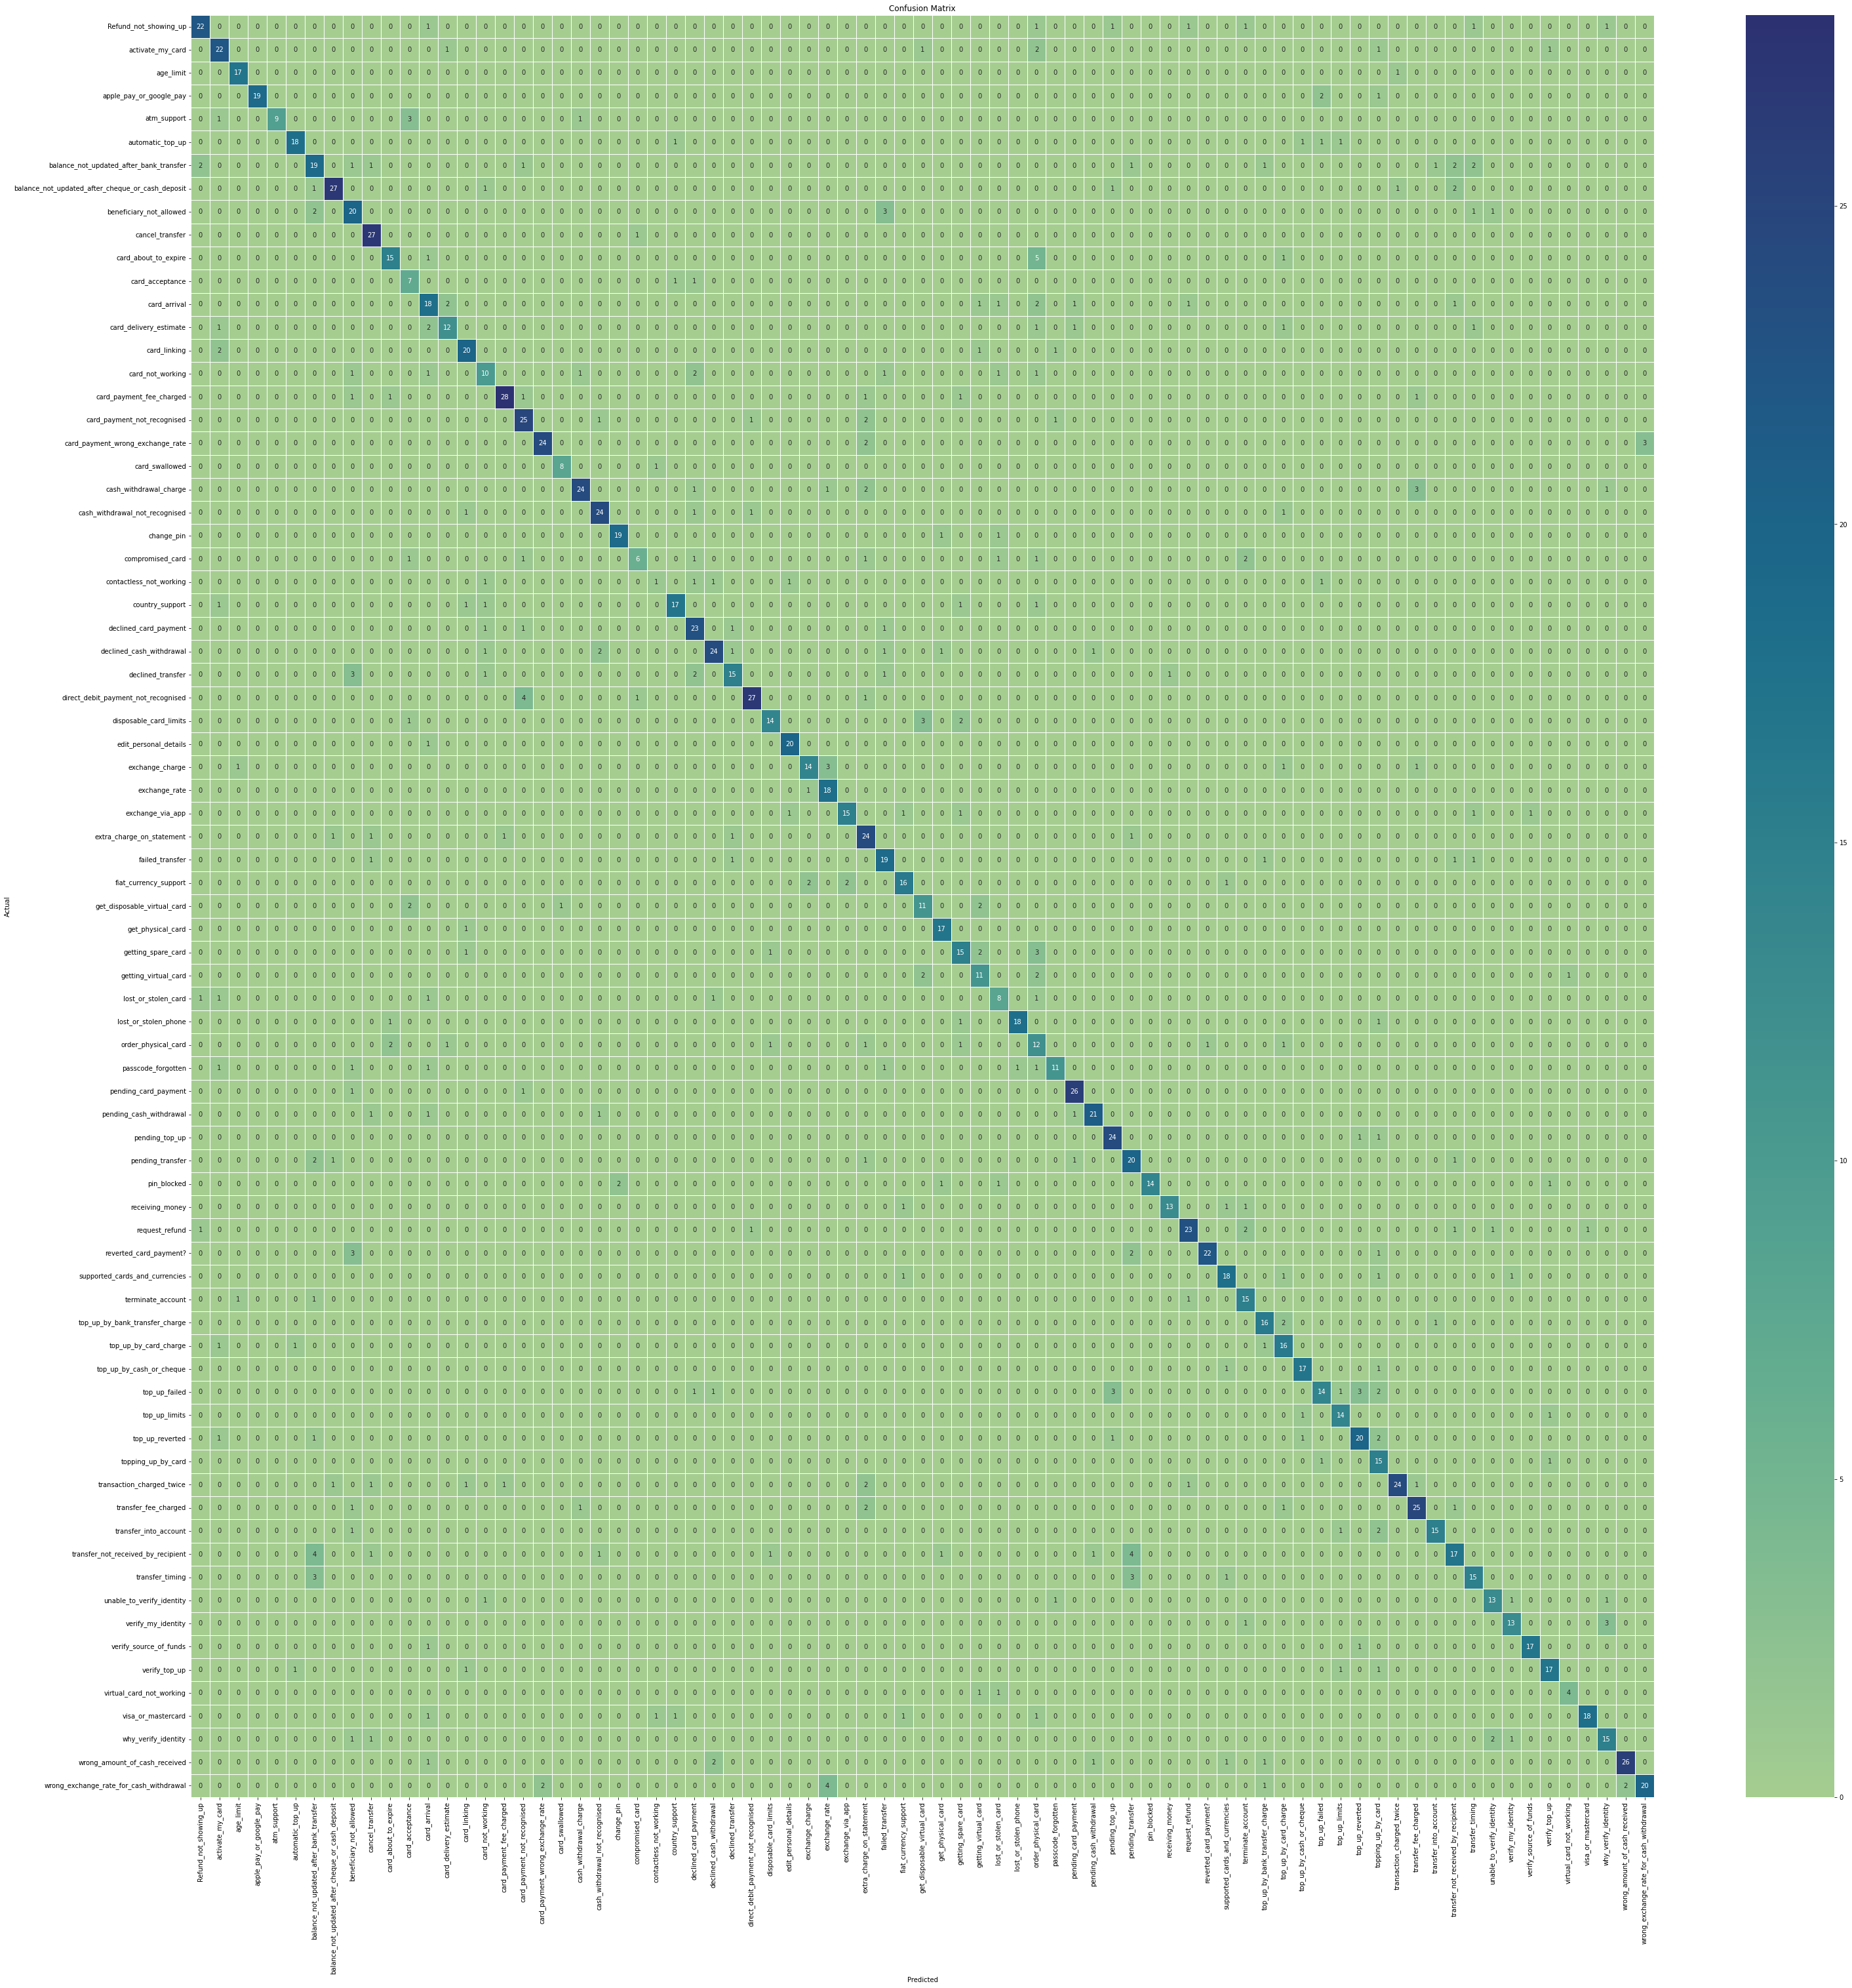

Total True Positives :  1337.0
Total False Positives :  387.0
Total True Negatives :  130637.0
Total False Negatives :  387.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     22                22         17   
TN                   1691              1687       1704   
FP                      4                 9          2   
FN                      7                 6          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       19            9                18   
TN                     1702         1710              1700   
FP                        0            0                 2   
FN                        3            5                 4   

    balance_not_updated_after_bank_transfer  \
TP                                       19   
TN                                     1679   
FP                                       14   
FN                                       12   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                27                       20   
TN                                              1688                     1683   
FP                                                 3                       14   
FN                                                 6                        7   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    15                7            18   
TN             1689                  1698             1708          1685   
FP                7                     4                7            12   
FN                1                     7                2             9   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      12            20                10   
TN                    1701          1694              1699   
FP                       4             6                 7   
FN                       7             4                 8   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        28                           25   
TN                      1688                         1685   
FP                         2                            9   
FN                         6                            5   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                24               8                      24   
TN                              1693            1714                    1689   
FP                                 2               1                       3   
FN                                 5               1                       8   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              24          19                 6   
TN                            1691        1701              1708   
FP                               5           2                 2   
FN                               4           2                 8   

    contactless_not_working  country_support  declined_card_payment  \
TP                        1               17                     23   
TN                     1716             1699                   1687   
FP                        2                3                     10   
FN                        5                5                      4   

    declined_cash_withdrawal  declined_transfer  \
TP                        24                 15   
TN                      1688               1697   
FP                         5                  4   
FN                         7                  8   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   27                      14   
TN                                 1688                    1701   
FP                                    3                       3   
FN                                    6                       6   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# CountVectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
count_vector_KNN2_pipeline = Pipeline([
    ('vectorizer_count', CountVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='cosine'))         
])
 
 #fit with features
count_vector_KNN2_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = count_vector_KNN2_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNN2")

### Using KNN (K Nearest Neighbour) Model and TF-IDF Vectorizer

#####Using Euclidean distance metric.

Accuracy: 0.8364269141531323
F1 score: 0.8367253025730129
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.82      0.79      0.81        29
                                activate_my_card       0.90      1.00      0.95        28
                                       age_limit       0.89      0.94      0.92        18
                         apple_pay_or_google_pay       1.00      0.95      0.98        22
                                     atm_support       0.85      0.79      0.81        14
                                automatic_top_up       1.00      0.86      0.93        22
         balance_not_updated_after_bank_transfer       0.76      0.73      0.75        30
balance_not_updated_after_cheque_or_cash_deposit       0.85      0.88      0.87        33
                         beneficiary_not_allowed       1.00      0.78      0.88        27
                                 cancel_t

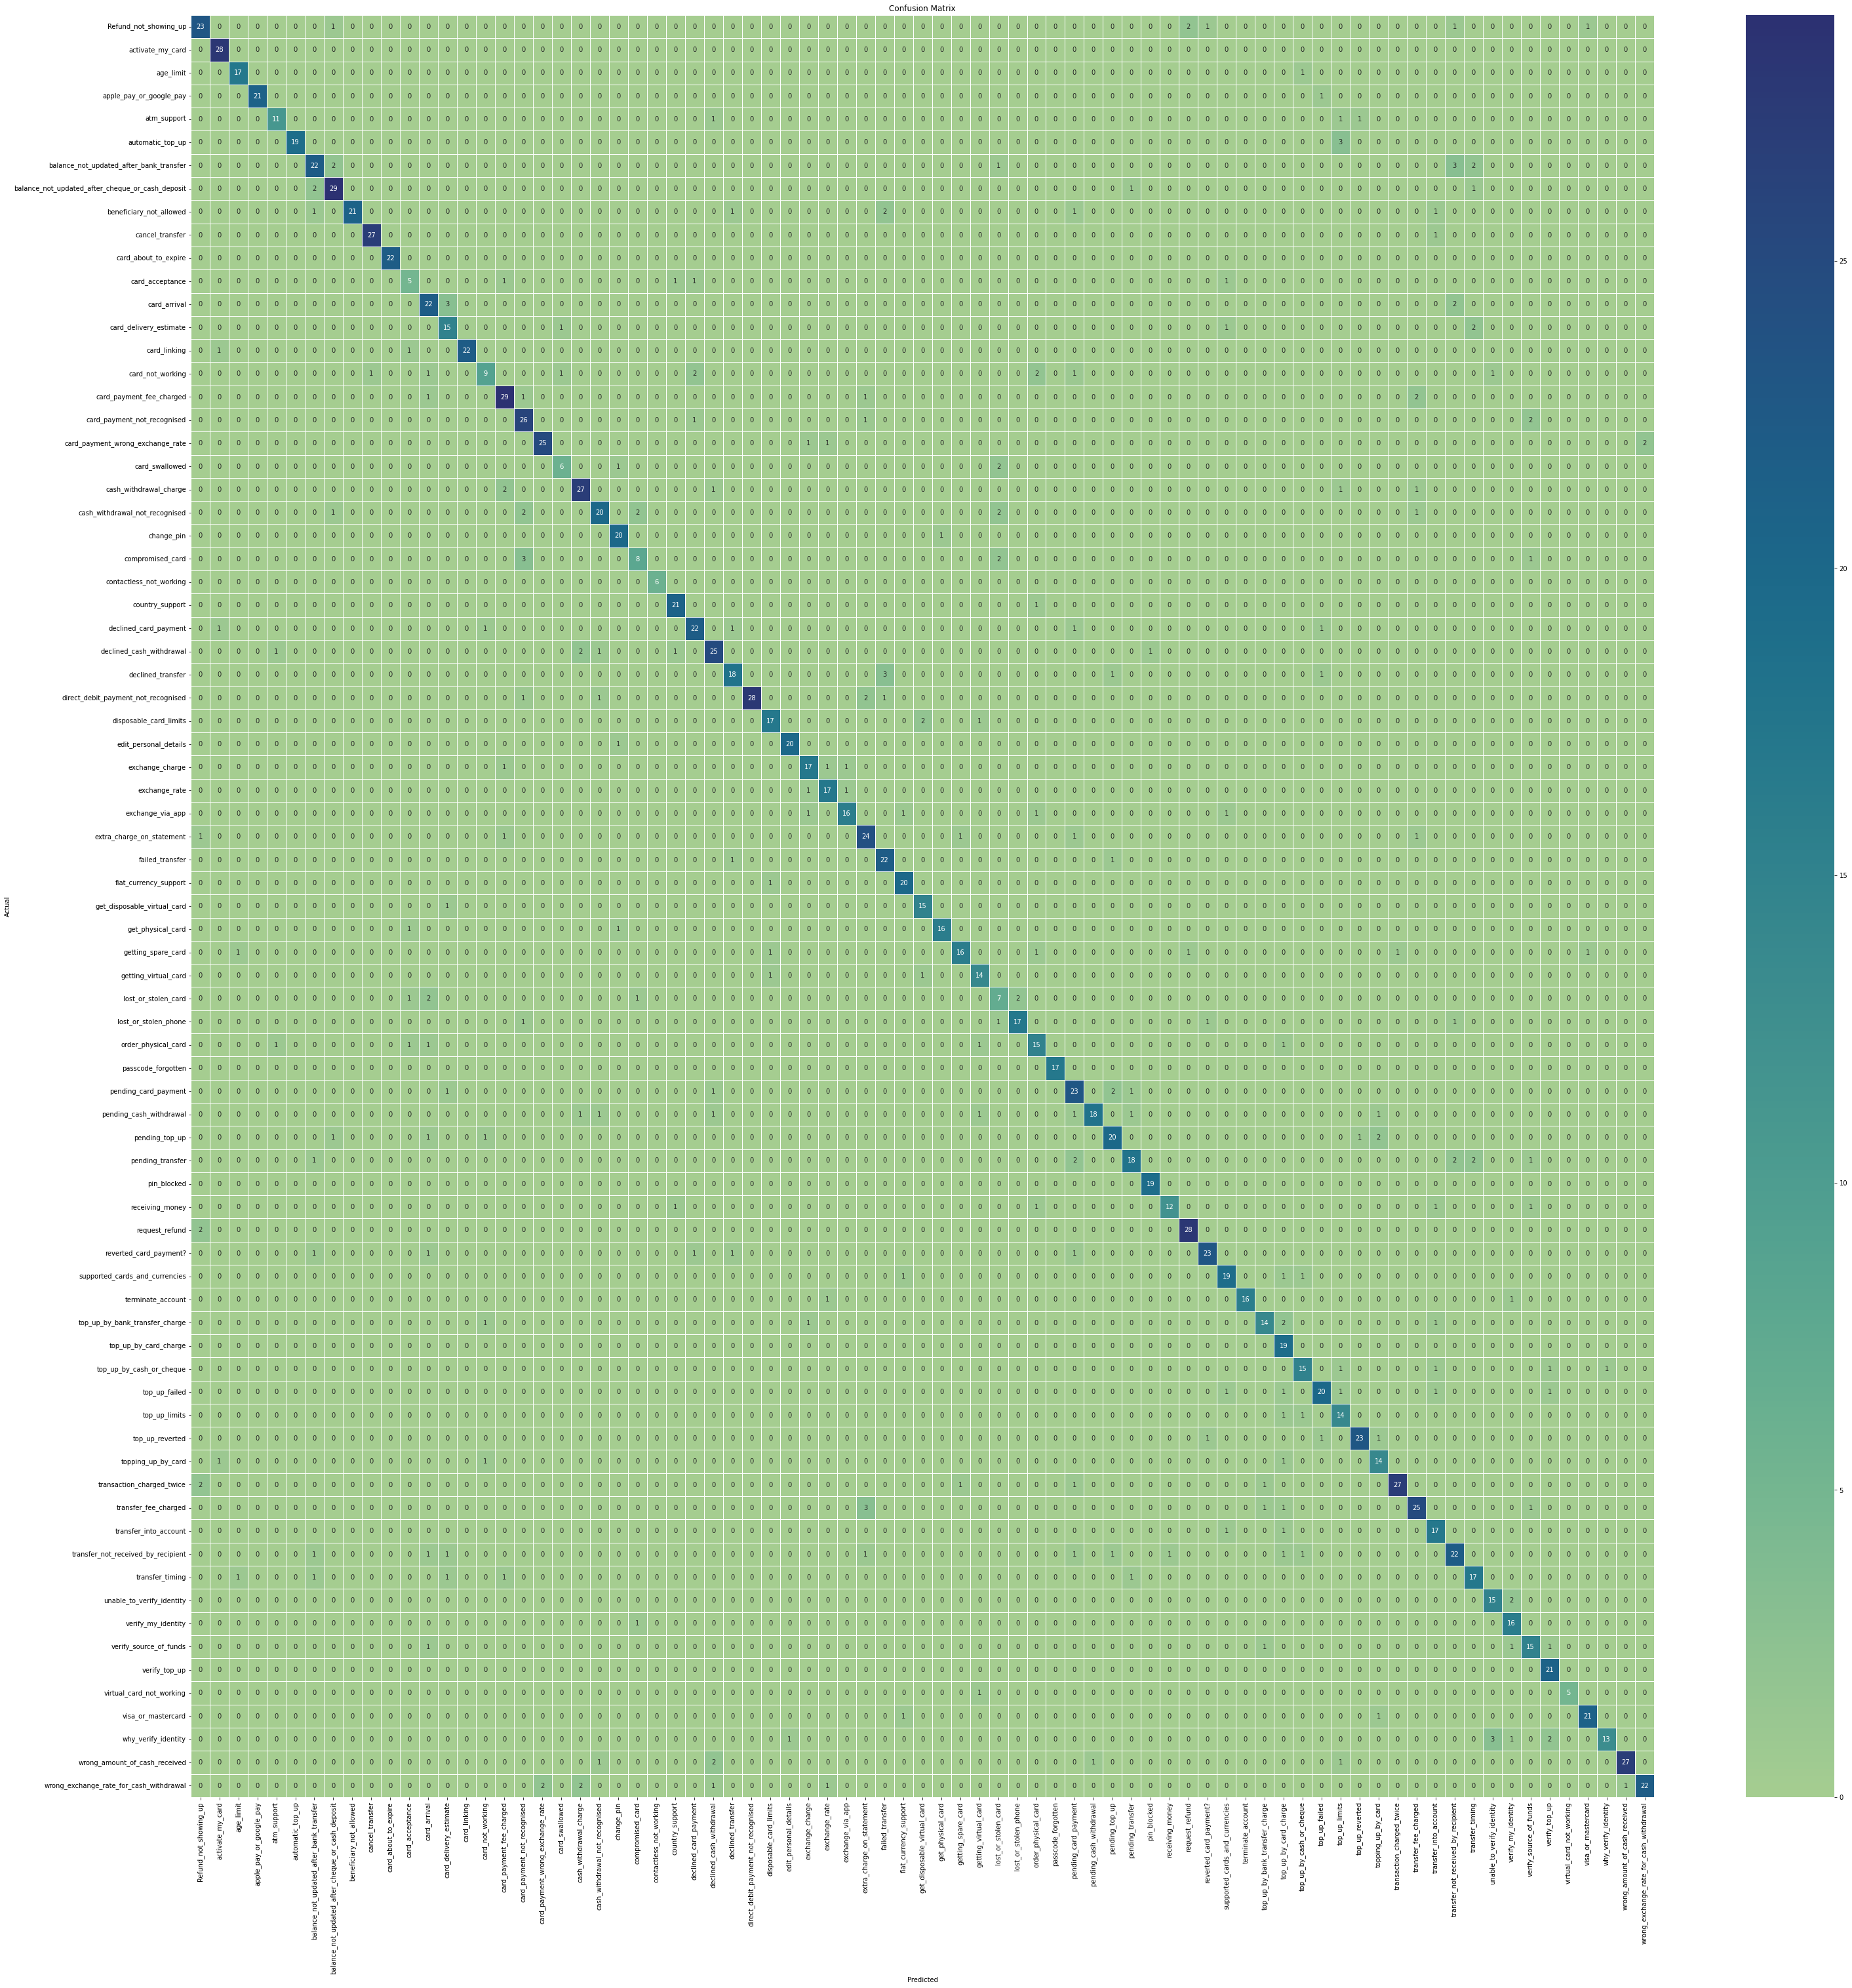

Total True Positives :  1442.0
Total False Positives :  282.0
Total True Negatives :  130742.0
Total False Negatives :  282.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     23                28         17   
TN                   1690              1693       1704   
FP                      5                 3          2   
FN                      6                 0          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       21           11                19   
TN                     1702         1708              1702   
FP                        0            2                 0   
FN                        1            3                 3   

    balance_not_updated_after_bank_transfer  \
TP                                       22   
TN                                     1687   
FP                                        7   
FN                                        8   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                29                       21   
TN                                              1686                     1697   
FP                                                 5                        0   
FN                                                 4                        6   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    22                5            22   
TN             1695                  1702             1711          1688   
FP                1                     0                4             9   
FN                1                     0                4             5   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      15            22                 9   
TN                    1698          1700              1702   
FP                       7             0                 4   
FN                       4             2                 9   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        29                           26   
TN                      1684                         1686   
FP                         6                            8   
FN                         5                            4   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                25               6                      27   
TN                              1693            1713                    1687   
FP                                 2               2                       5   
FN                                 4               3                       5   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              20          20                 8   
TN                            1692        1700              1706   
FP                               4           3                 4   
FN                               8           1                 6   

    contactless_not_working  country_support  declined_card_payment  \
TP                        6               21                     22   
TN                     1718             1699                   1692   
FP                        0                3                      5   
FN                        0                1                      5   

    declined_cash_withdrawal  declined_transfer  \
TP                        25                 18   
TN                      1686               1697   
FP                         7                  4   
FN                         6                  5   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   28                      17   
TN                                 1691                    1701   
FP                                    0                       3   
FN                                    5                       3   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# TF-IDF Vectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
tfidf_vector_KNN1_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean'))         
])
 
 #fit with features
tfidf_vector_KNN1_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = tfidf_vector_KNN1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNNTF1")

#####Using Cosine distance metric.

Accuracy: 0.824245939675174
F1 score: 0.8234814877081779
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.86      0.83      0.84        29
                                activate_my_card       0.93      0.93      0.93        28
                                       age_limit       0.94      0.94      0.94        18
                         apple_pay_or_google_pay       1.00      0.95      0.98        22
                                     atm_support       0.91      0.71      0.80        14
                                automatic_top_up       0.88      1.00      0.94        22
         balance_not_updated_after_bank_transfer       0.66      0.63      0.64        30
balance_not_updated_after_cheque_or_cash_deposit       0.82      0.94      0.87        33
                         beneficiary_not_allowed       0.75      0.78      0.76        27
                                 cancel_tr

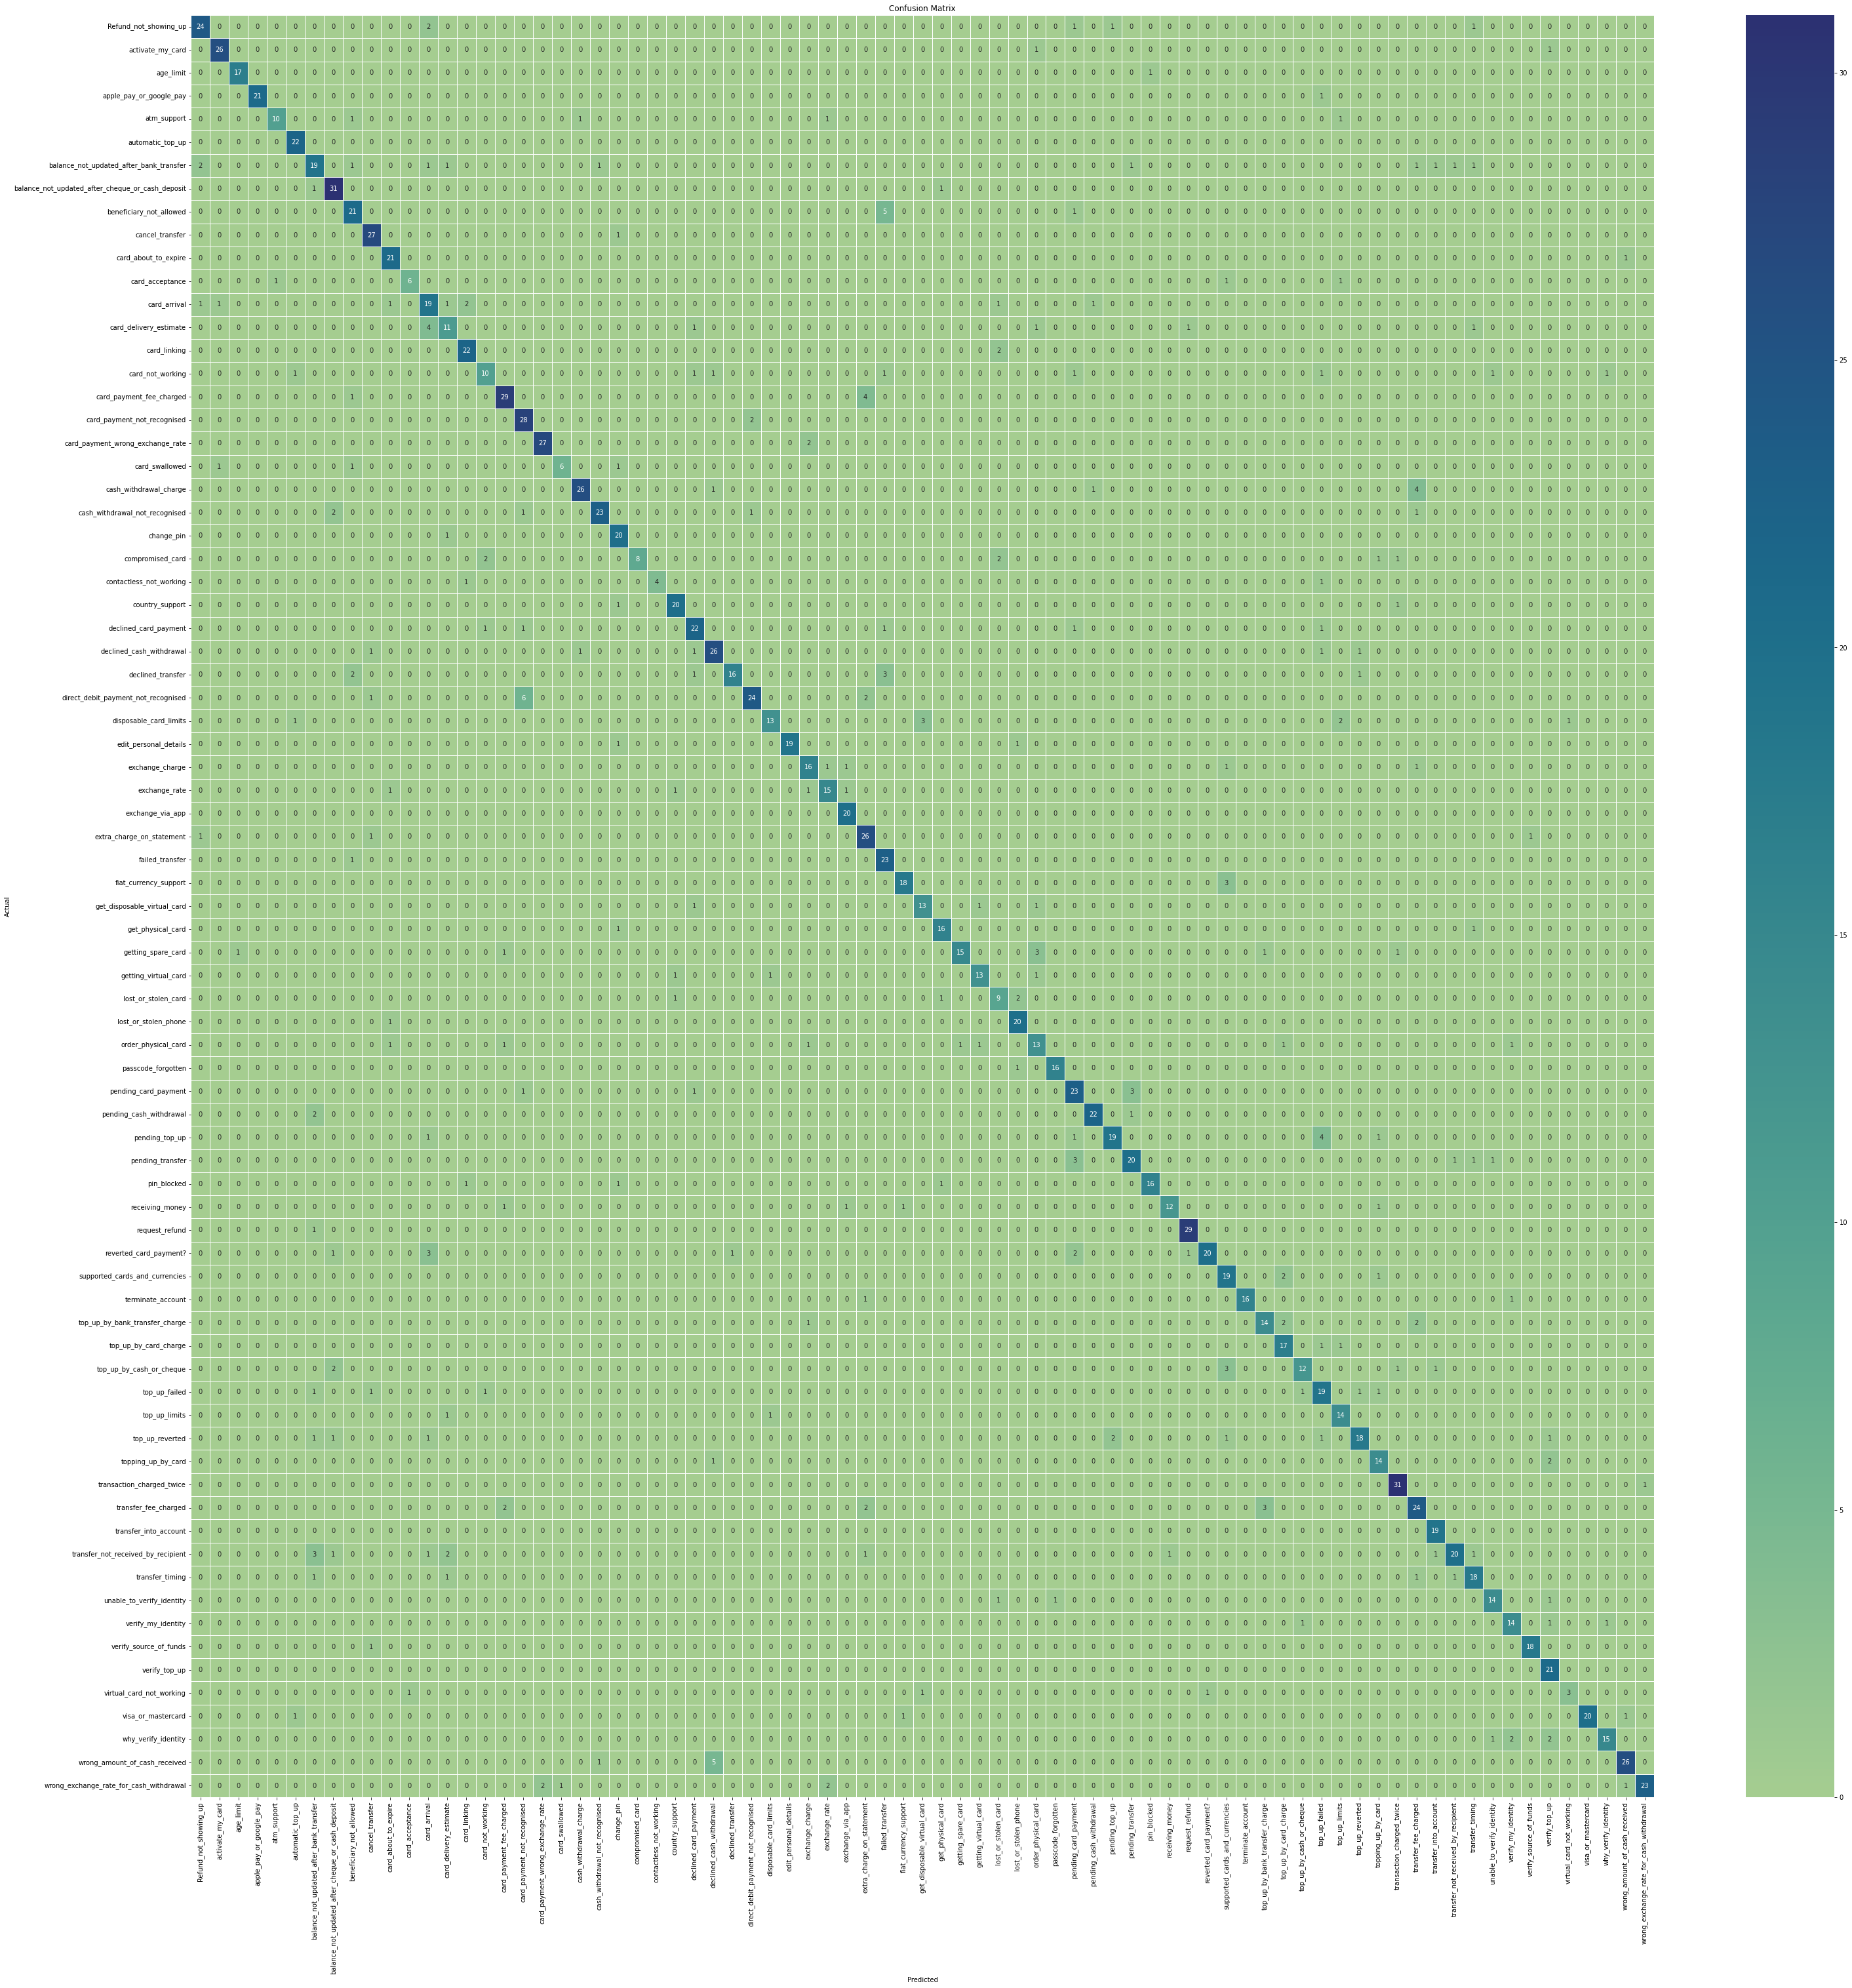

Total True Positives :  1421.0
Total False Positives :  303.0
Total True Negatives :  130721.0
Total False Negatives :  303.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     24                26         17   
TN                   1691              1694       1705   
FP                      4                 2          1   
FN                      5                 2          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       21           10                22   
TN                     1702         1709              1699   
FP                        0            1                 3   
FN                        1            4                 0   

    balance_not_updated_after_bank_transfer  \
TP                                       19   
TN                                     1684   
FP                                       10   
FN                                       11   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                31                       21   
TN                                              1684                     1690   
FP                                                 7                        7   
FN                                                 2                        6   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    21                6            19   
TN             1691                  1698             1714          1684   
FP                5                     4                1            13   
FN                1                     1                3             8   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      11            22                10   
TN                    1698          1696              1702   
FP                       7             4                 4   
FN                       8             2                 8   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        29                           28   
TN                      1685                         1685   
FP                         5                            9   
FN                         5                            2   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                27               6                      26   
TN                              1693            1714                    1690   
FP                                 2               1                       2   
FN                                 2               3                       6   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              23          20                 8   
TN                            1694        1697              1710   
FP                               2           6                 0   
FN                               5           1                 6   

    contactless_not_working  country_support  declined_card_payment  \
TP                        4               20                     22   
TN                     1718             1699                   1691   
FP                        0                3                      6   
FN                        2                2                      5   

    declined_cash_withdrawal  declined_transfer  \
TP                        26                 16   
TN                      1685               1700   
FP                         8                  1   
FN                         5                  7   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   24                      13   
TN                                 1688                    1702   
FP                                    3                       2   
FN                                    9                       7   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# TF-IDF Vectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
tfidf_vector_KNN2_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine'))         
])
 
 #fit with features
tfidf_vector_KNN2_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = tfidf_vector_KNN2_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))
# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNNTF2")

### Using SVM (Support Vector Machine) Model and TF-IDF Vectorizer

##### Using TF-IDF Vectorizer

Accuracy: 0.872969837587007
F1 score: 0.8730142491968463
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.97      0.97      0.97        29
                                activate_my_card       0.90      0.96      0.93        28
                                       age_limit       1.00      0.94      0.97        18
                         apple_pay_or_google_pay       1.00      0.91      0.95        22
                                     atm_support       1.00      0.93      0.96        14
                                automatic_top_up       1.00      0.95      0.98        22
         balance_not_updated_after_bank_transfer       0.63      0.77      0.70        31
balance_not_updated_after_cheque_or_cash_deposit       0.86      0.97      0.91        33
                         beneficiary_not_allowed       0.96      0.89      0.92        27
                                 cancel_tr

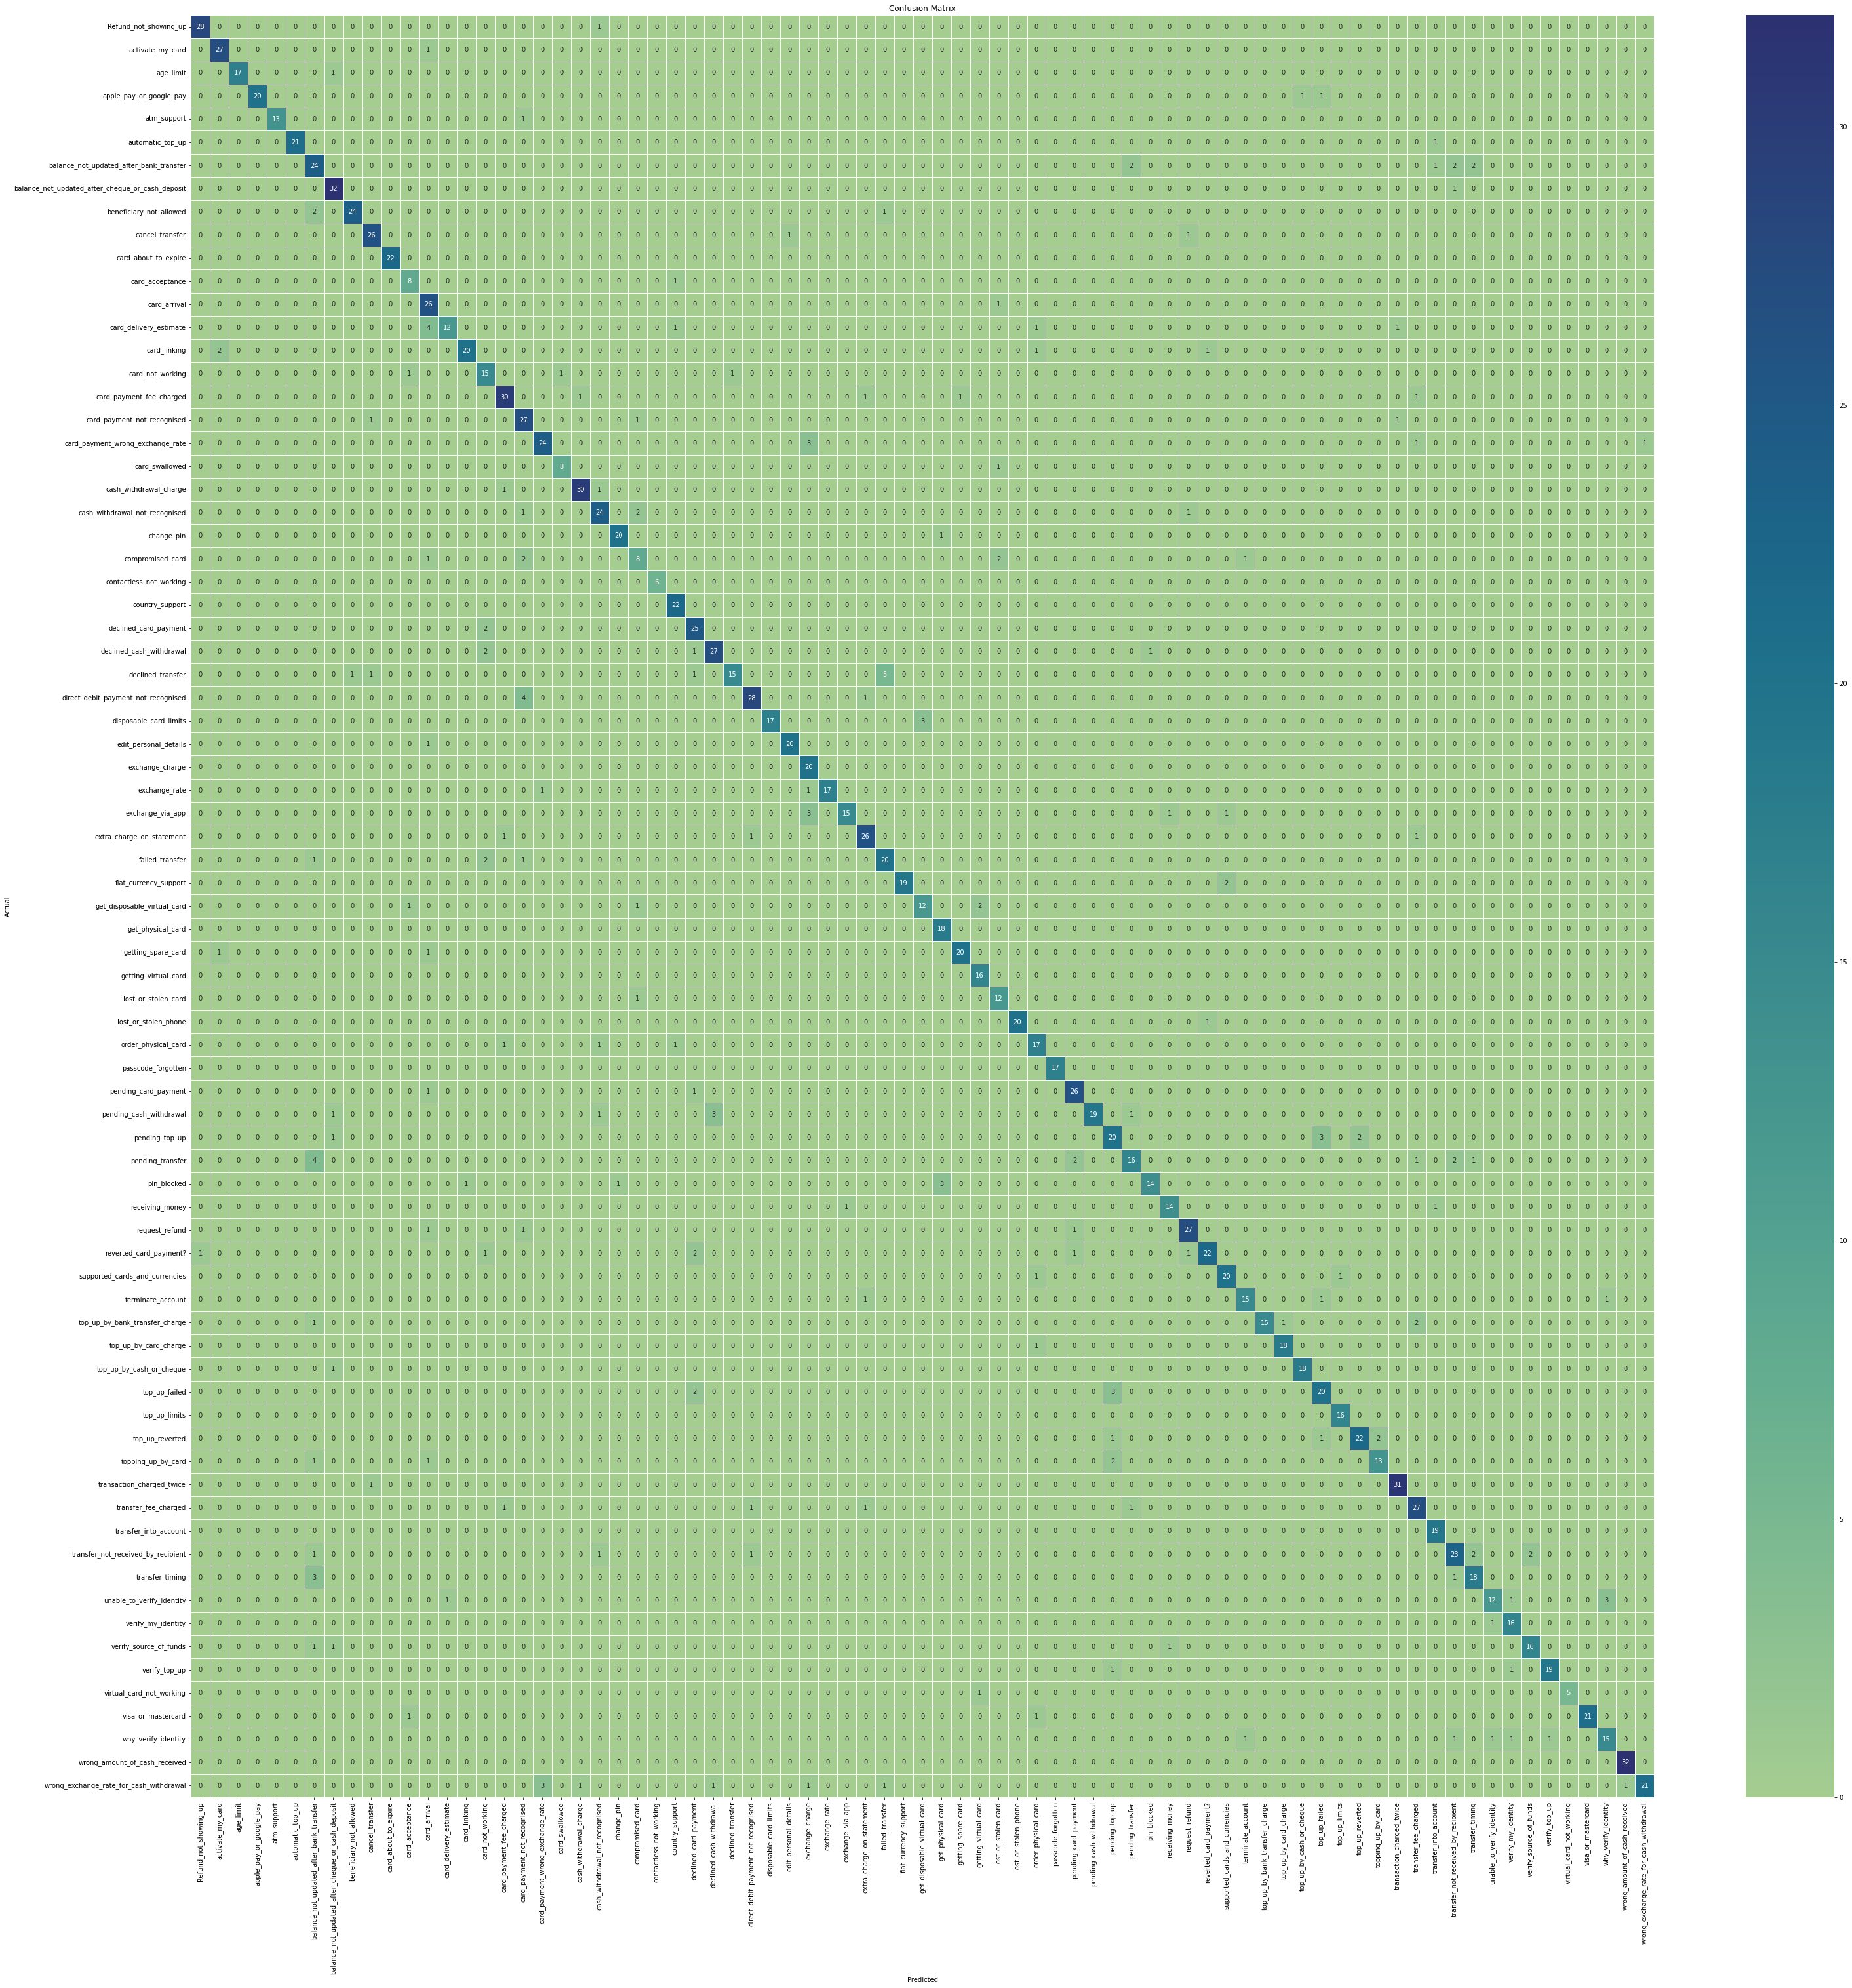

Total True Positives :  1505.0
Total False Positives :  219.0
Total True Negatives :  130805.0
Total False Negatives :  219.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     28                27         17   
TN                   1694              1693       1706   
FP                      1                 3          0   
FN                      1                 1          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       20           13                21   
TN                     1702         1710              1702   
FP                        0            0                 0   
FN                        2            1                 1   

    balance_not_updated_after_bank_transfer  \
TP                                       24   
TN                                     1679   
FP                                       14   
FN                                        7   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                32                       24   
TN                                              1686                     1696   
FP                                                 5                        1   
FN                                                 1                        3   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               26                    22                8            26   
TN             1693                  1702             1712          1686   
FP                3                     0                3            11   
FN                2                     0                1             1   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      12            20                15   
TN                    1704          1699              1699   
FP                       1             1                 7   
FN                       7             4                 3   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        30                           27   
TN                      1686                         1684   
FP                         4                           10   
FN                         4                            3   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                24               8                      30   
TN                              1691            1714                    1690   
FP                                 4               1                       2   
FN                                 5               1                       2   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              24          20                 8   
TN                            1691        1702              1705   
FP                               5           1                 5   
FN                               4           1                 6   

    contactless_not_working  country_support  declined_card_payment  \
TP                        6               22                     25   
TN                     1718             1699                   1690   
FP                        0                3                      7   
FN                        0                0                      2   

    declined_cash_withdrawal  declined_transfer  \
TP                        27                 15   
TN                      1689               1700   
FP                         4                  1   
FN                         4                  8   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   28                      17   
TN                                 1688                    1704   
FP                                    3                       0   
FN                                    5                       3   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# TF-IDF Vectorizer and SVM model 

tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

SVM_classifier_model1 = SVC(kernel='linear', gamma='auto')

#fit with features
SVM_classifier_model1.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = SVM_classifier_model1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted")) #Weighted F1 score since data is imbalanced.

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMTF1")

##### Using Count Vectorizer

Accuracy: 0.8538283062645011
F1 score: 0.8546130110795894
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       1.00      0.90      0.95        29
                                activate_my_card       0.96      0.89      0.93        28
                                       age_limit       1.00      1.00      1.00        18
                         apple_pay_or_google_pay       1.00      0.91      0.95        22
                                     atm_support       0.82      1.00      0.90        14
                                automatic_top_up       0.90      0.86      0.88        22
         balance_not_updated_after_bank_transfer       0.69      0.73      0.71        30
balance_not_updated_after_cheque_or_cash_deposit       0.86      0.97      0.91        33
                         beneficiary_not_allowed       0.77      0.85      0.81        27
                                 cancel_t

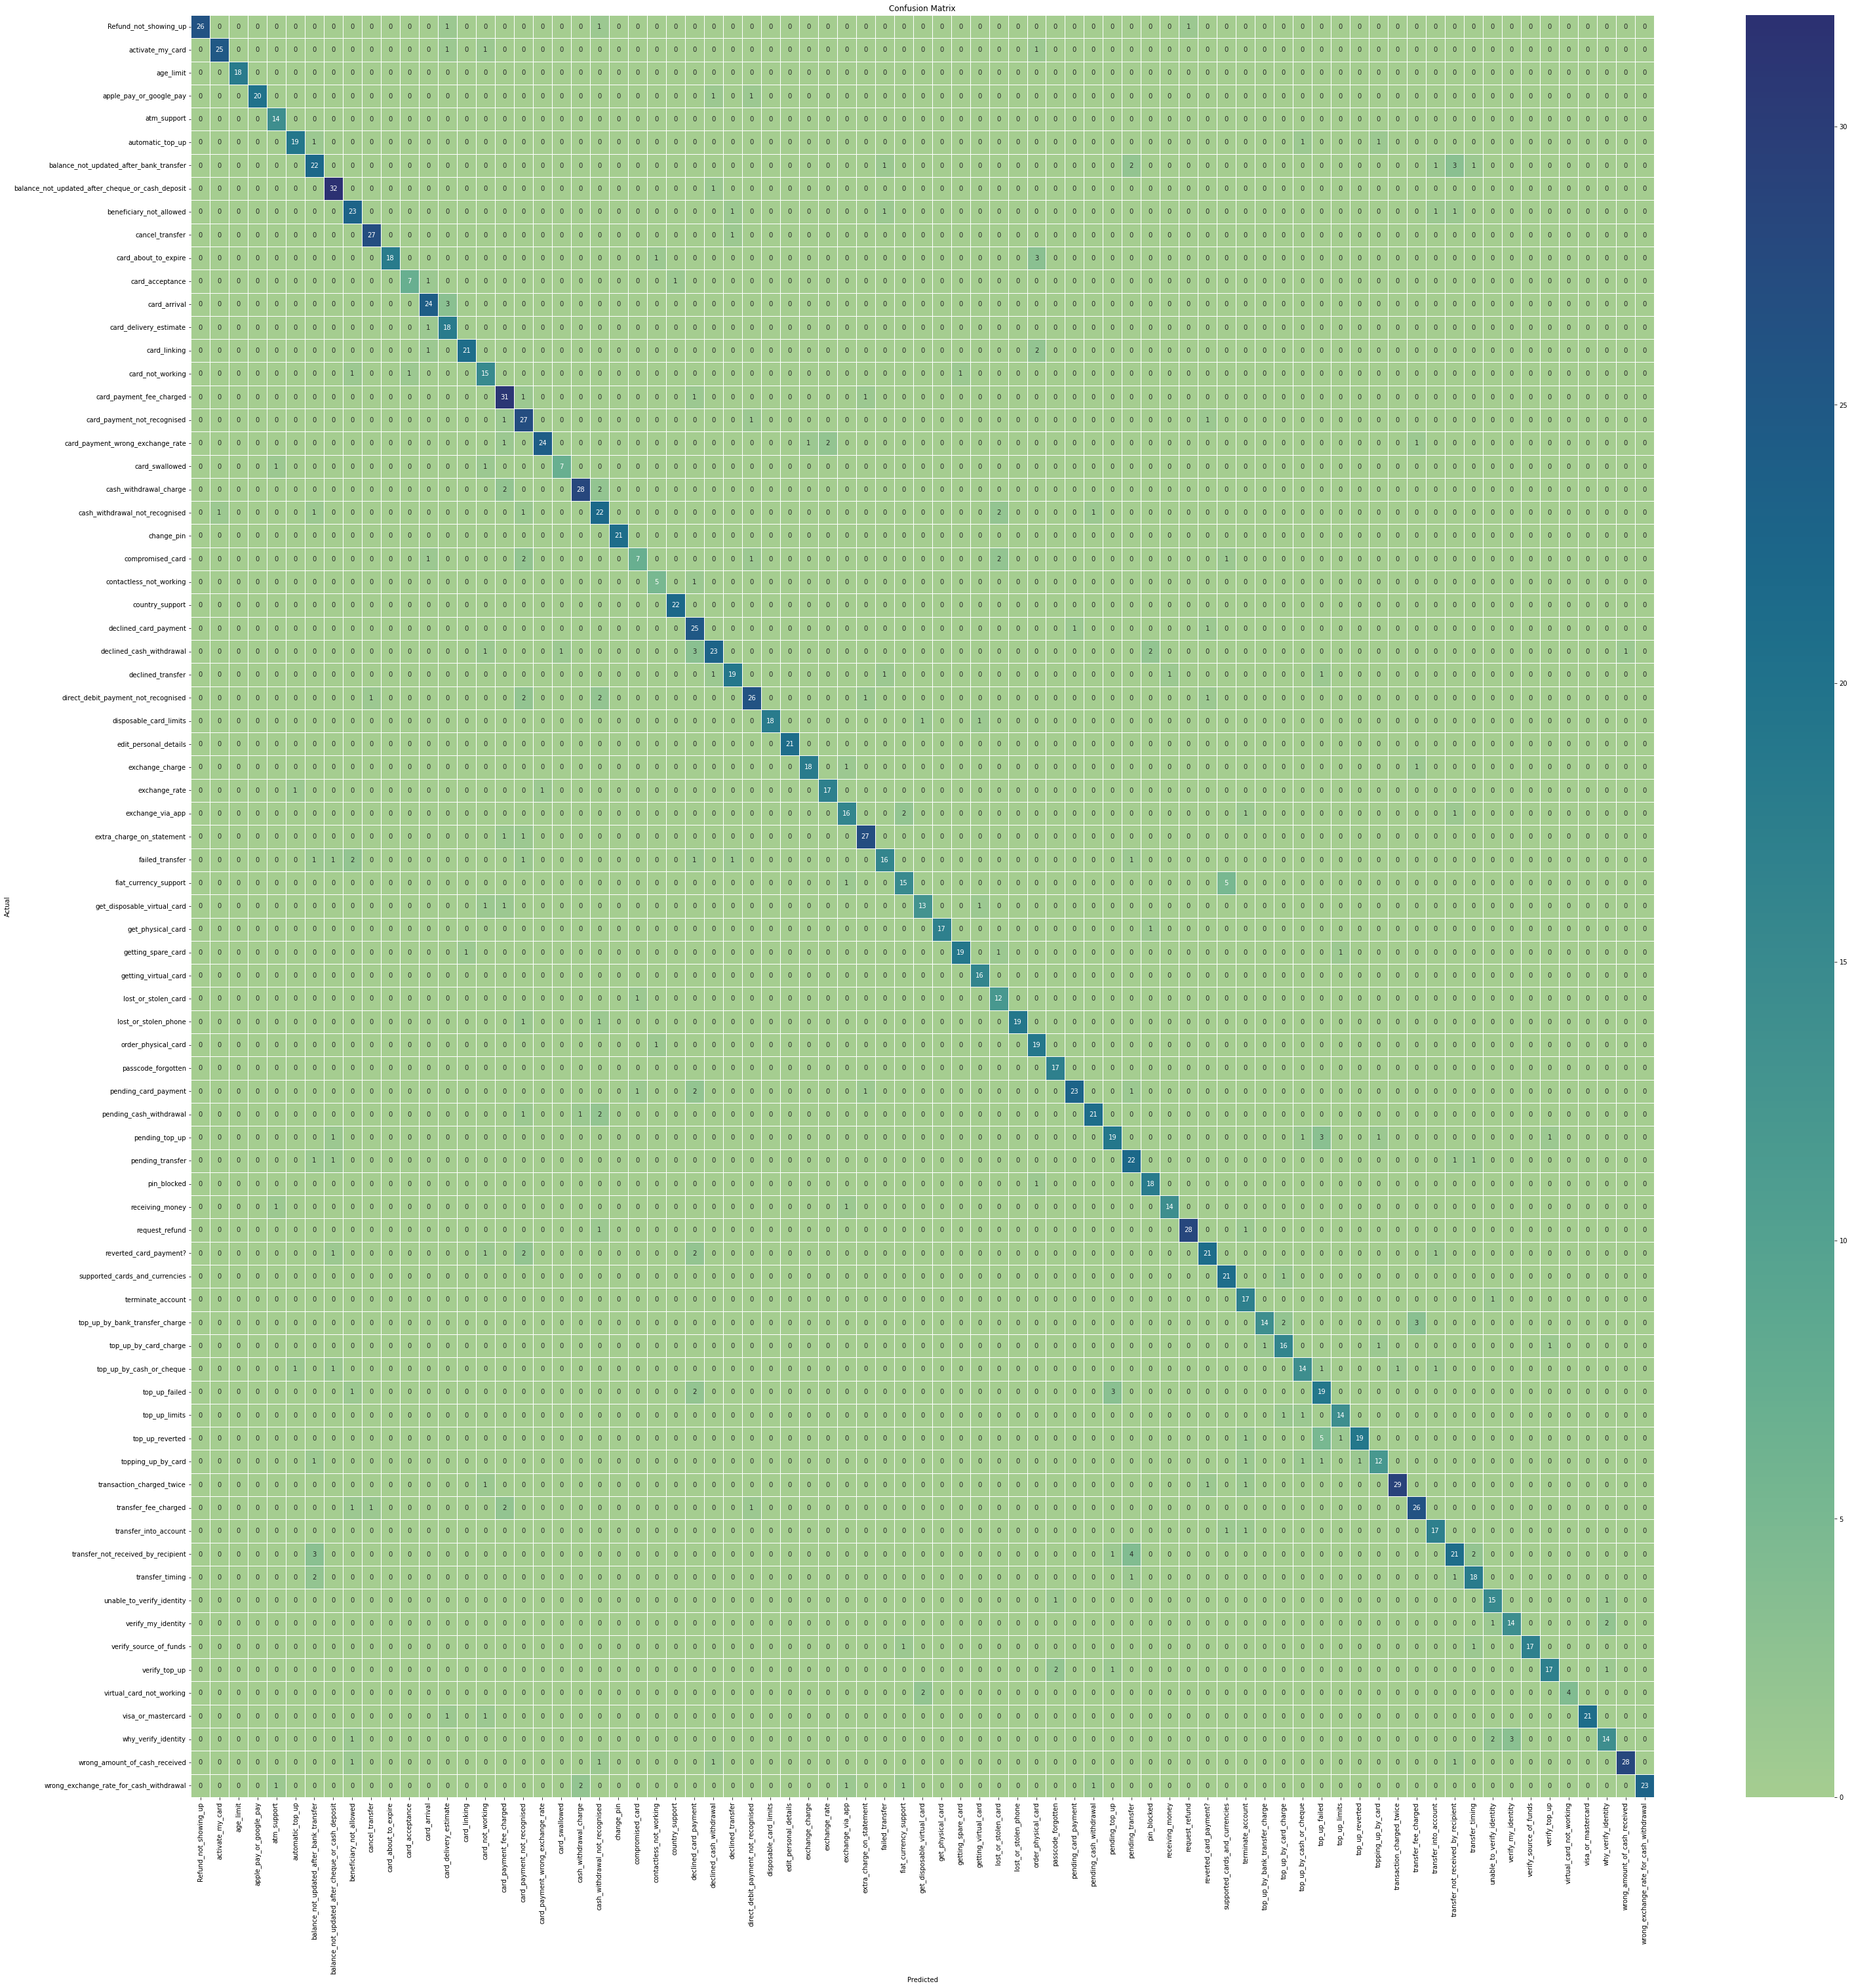

Total True Positives :  1472.0
Total False Positives :  252.0
Total True Negatives :  130772.0
Total False Negatives :  252.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     26                25         18   
TN                   1695              1695       1706   
FP                      0                 1          0   
FN                      3                 3          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       20           14                19   
TN                     1702         1707              1700   
FP                        0            3                 2   
FN                        2            0                 3   

    balance_not_updated_after_bank_transfer  \
TP                                       22   
TN                                     1684   
FP                                       10   
FN                                        8   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                32                       23   
TN                                              1686                     1690   
FP                                                 5                        7   
FN                                                 1                        4   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    18                7            24   
TN             1694                  1702             1714          1693   
FP                2                     0                1             4   
FN                1                     4                2             3   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      18            21                15   
TN                    1699          1699              1699   
FP                       6             1                 7   
FN                       1             3                 3   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        31                           27   
TN                      1682                         1682   
FP                         8                           12   
FN                         3                            3   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                24               7                      28   
TN                              1694            1714                    1689   
FP                                 1               1                       3   
FN                                 5               2                       4   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              22          21                 7   
TN                            1686        1703              1708   
FP                              10           0                 2   
FN                               6           0                 7   

    contactless_not_working  country_support  declined_card_payment  \
TP                        5               22                     25   
TN                     1716             1701                   1685   
FP                        2                1                     12   
FN                        1                0                      2   

    declined_cash_withdrawal  declined_transfer  \
TP                        23                 19   
TN                      1689               1698   
FP                         4                  3   
FN                         8                  4   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   26                      18   
TN                                 1687                    1704   
FP                                    4                       0   
FN                                    7                       2   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Count Vectorizer with unigram and bigram range and SVC model

count_vectorizer = CountVectorizer(ngram_range=(1,2)).fit_transform(utterances['lemmatized_utterance'])
X = np.array(count_vectorizer.todense())
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

SVM_classifier_mode2 = SVC(kernel='linear', gamma='auto')

#fit with features
SVM_classifier_mode2.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = SVM_classifier_mode2.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted")) #Weighted F1 score since data is imbalanced.

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVM1")

### Using RandomForest Classifier with TF-IDF Vectorizer and CountVectorizer

##### Using TF-IDF Vectorizer

Accuracy: 0.8480278422273781
F1 score: 0.847373040324264
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.92      0.92      0.92        24
                                activate_my_card       0.97      0.94      0.96        35
                                       age_limit       0.81      0.93      0.87        14
                         apple_pay_or_google_pay       0.89      1.00      0.94        25
                                     atm_support       1.00      0.86      0.92        14
                                automatic_top_up       1.00      0.95      0.98        21
         balance_not_updated_after_bank_transfer       0.67      0.52      0.58        27
balance_not_updated_after_cheque_or_cash_deposit       0.93      0.93      0.93        29
                         beneficiary_not_allowed       0.85      0.88      0.86        25
                                 cancel_tr

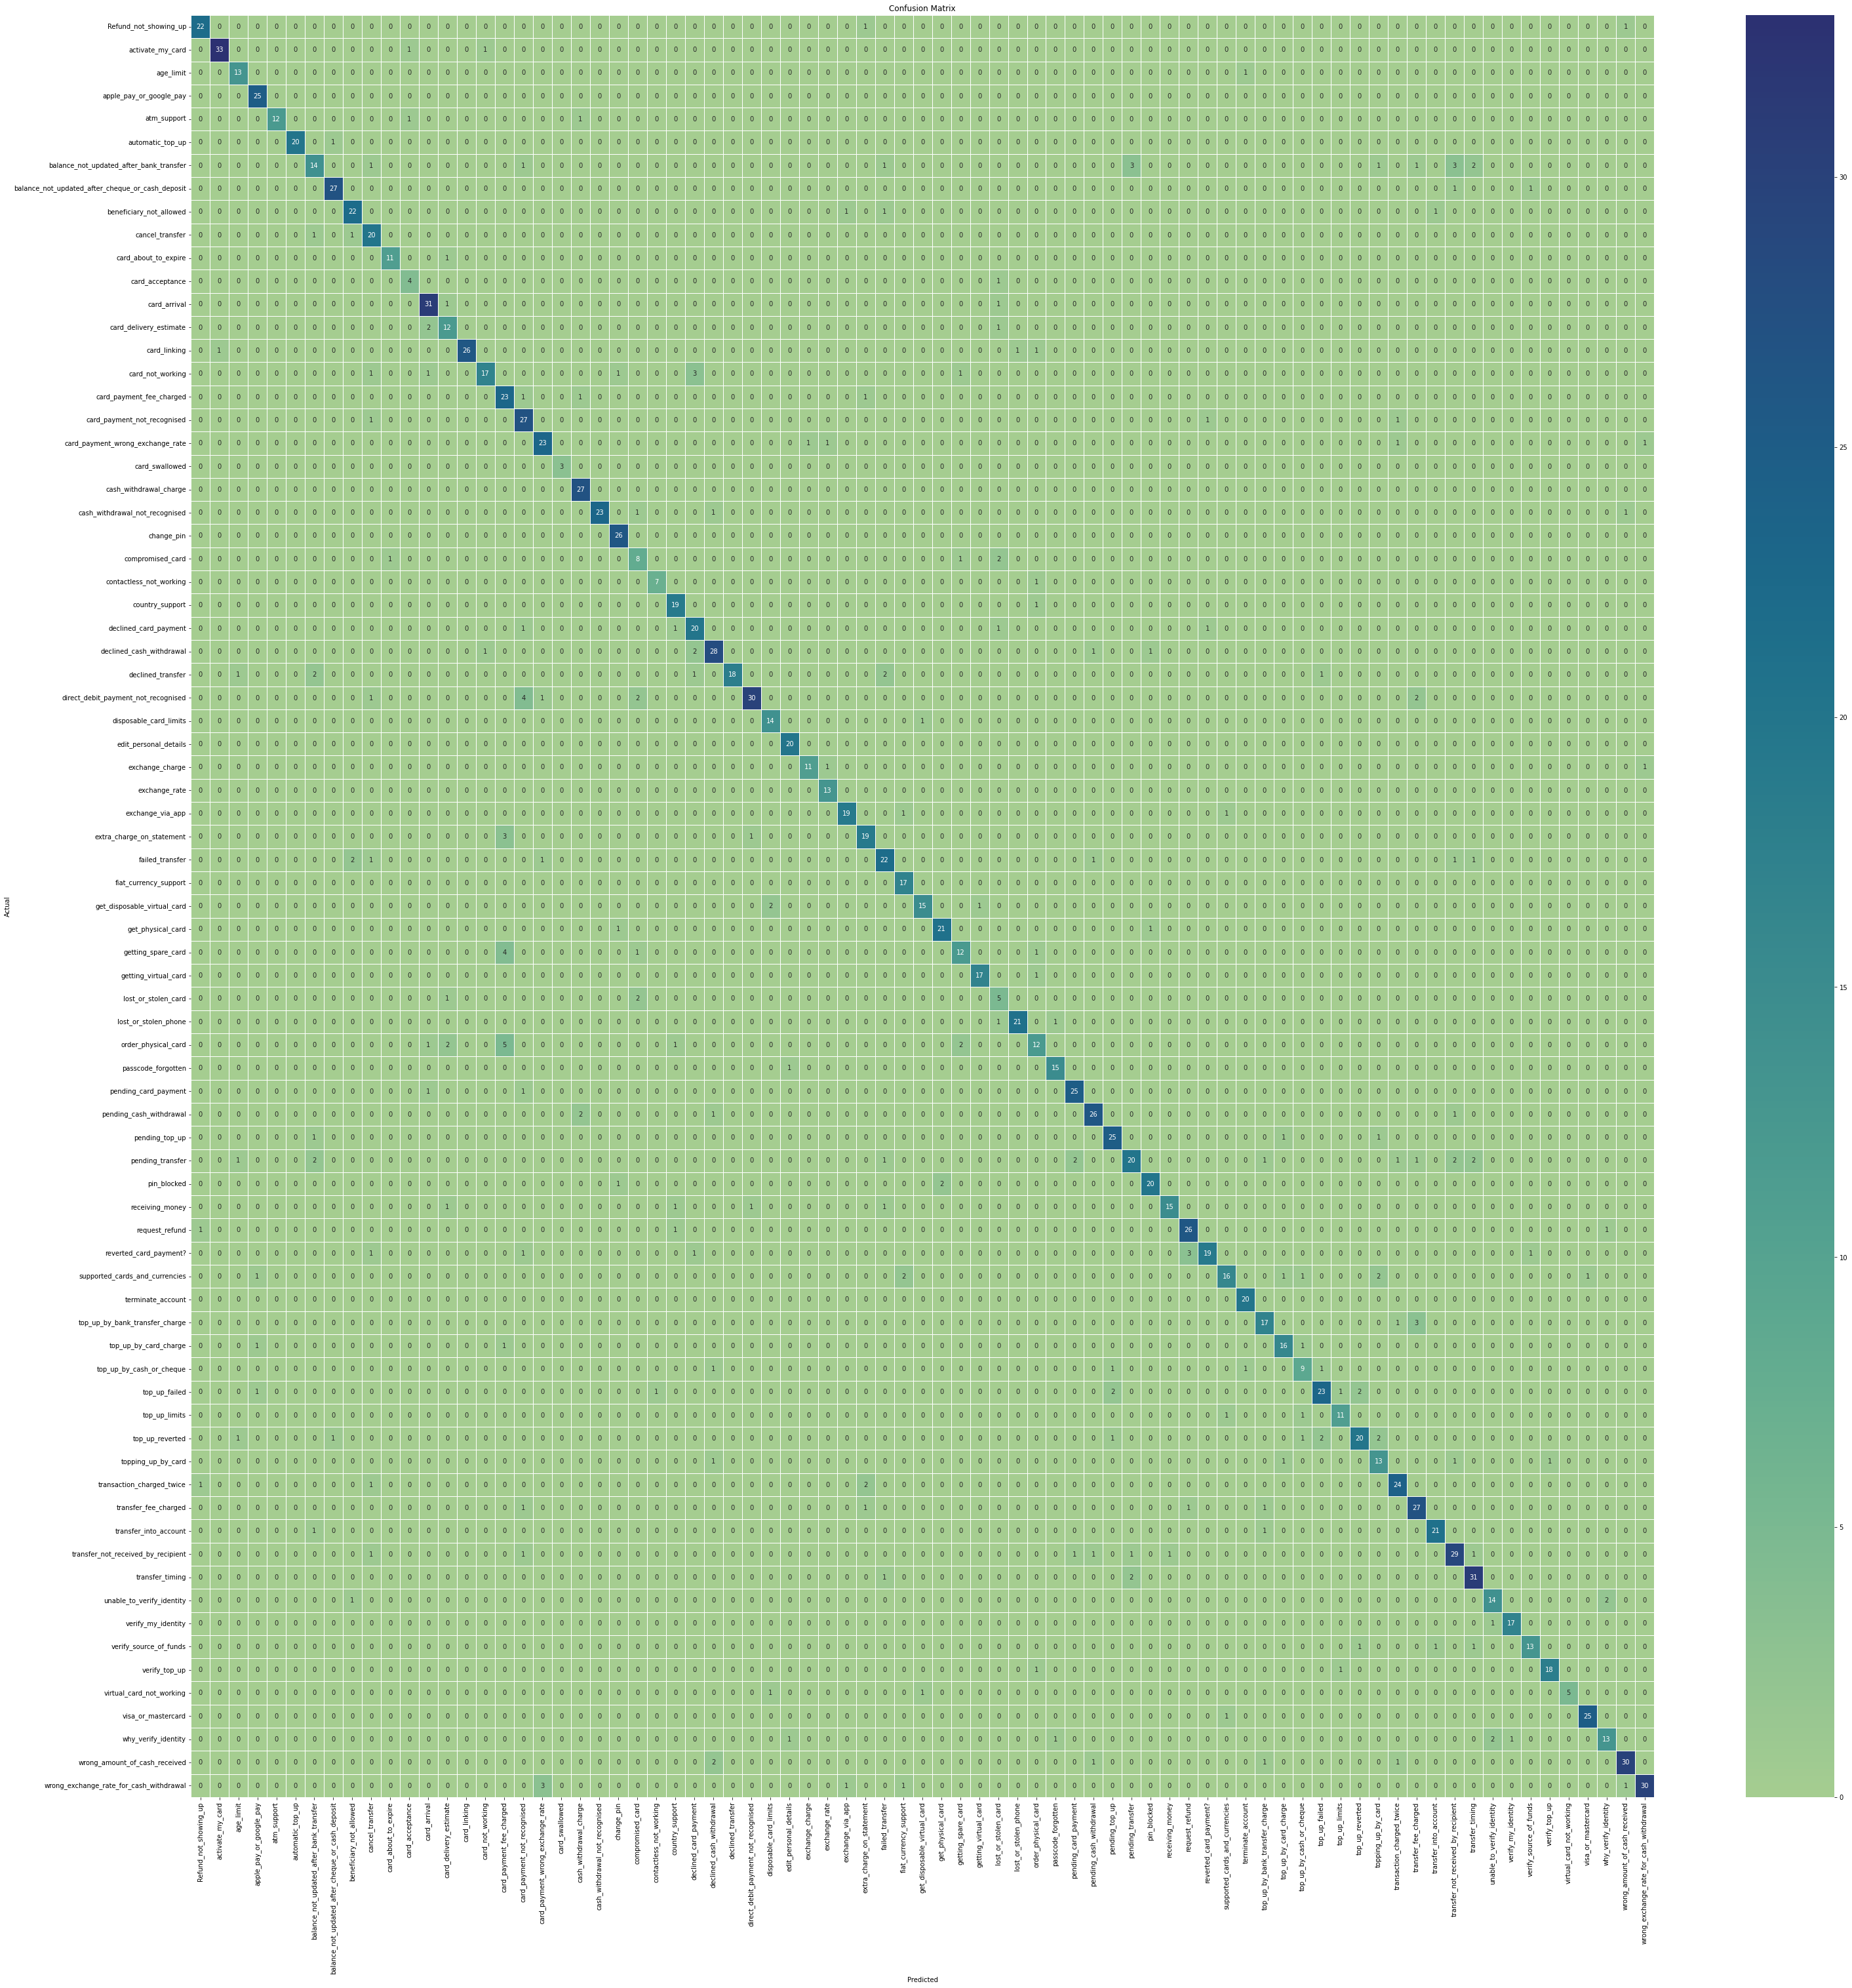

Total True Positives :  1462.0
Total False Positives :  262.0
Total True Negatives :  130762.0
Total False Negatives :  262.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     22                33         13   
TN                   1698              1688       1707   
FP                      2                 1          3   
FN                      2                 2          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       25           12                20   
TN                     1696         1710              1703   
FP                        3            0                 0   
FN                        0            2                 1   

    balance_not_updated_after_bank_transfer  \
TP                                       14   
TN                                     1690   
FP                                        7   
FN                                       13   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                27                       22   
TN                                              1693                     1695   
FP                                                 2                        4   
FN                                                 2                        3   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               20                    11                4            31   
TN             1694                  1711             1717          1686   
FP                8                     1                2             5   
FN                2                     1                1             2   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      12            26                17   
TN                    1703          1695              1698   
FP                       6             0                 2   
FN                       3             3                 7   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        23                           27   
TN                      1685                         1683   
FP                        13                           11   
FN                         3                            3   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                23               3                      27   
TN                              1692            1721                    1693   
FP                                 5               0                       4   
FN                                 4               0                       0   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              23          26                 8   
TN                            1698        1695              1706   
FP                               0           3                 6   
FN                               3           0                 4   

    contactless_not_working  country_support  declined_card_payment  \
TP                        7               19                     20   
TN                     1715             1700                   1693   
FP                        1                4                      7   
FN                        1                1                      4   

    declined_cash_withdrawal  declined_transfer  \
TP                        28                 18   
TN                      1685               1699   
FP                         6                  0   
FN                         5                  7   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   30                      14   
TN                                 1682                    1706   
FP                                    2                       3   
FN                                   10                       1   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Using RandomForestClassifier and TF-IDF Vectorizer

tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

randomForestClassifier1 = RandomForestClassifier()

#fit with features 
randomForestClassifier1.fit(X_train, y_train)

#get the predictions of X_test
y_pred = randomForestClassifier1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RFTF")

##### Using Count Vectorizer

Accuracy: 0.8439675174013921
F1 score: 0.8435854280561818
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.91      0.95      0.93        21
                                activate_my_card       0.93      0.86      0.89        29
                                       age_limit       0.79      1.00      0.88        19
                         apple_pay_or_google_pay       1.00      1.00      1.00        22
                                     atm_support       0.88      0.74      0.80        19
                                automatic_top_up       1.00      0.80      0.89        20
         balance_not_updated_after_bank_transfer       0.65      0.63      0.64        27
balance_not_updated_after_cheque_or_cash_deposit       0.89      0.97      0.93        35
                         beneficiary_not_allowed       0.90      0.79      0.84        24
                                 cancel_t

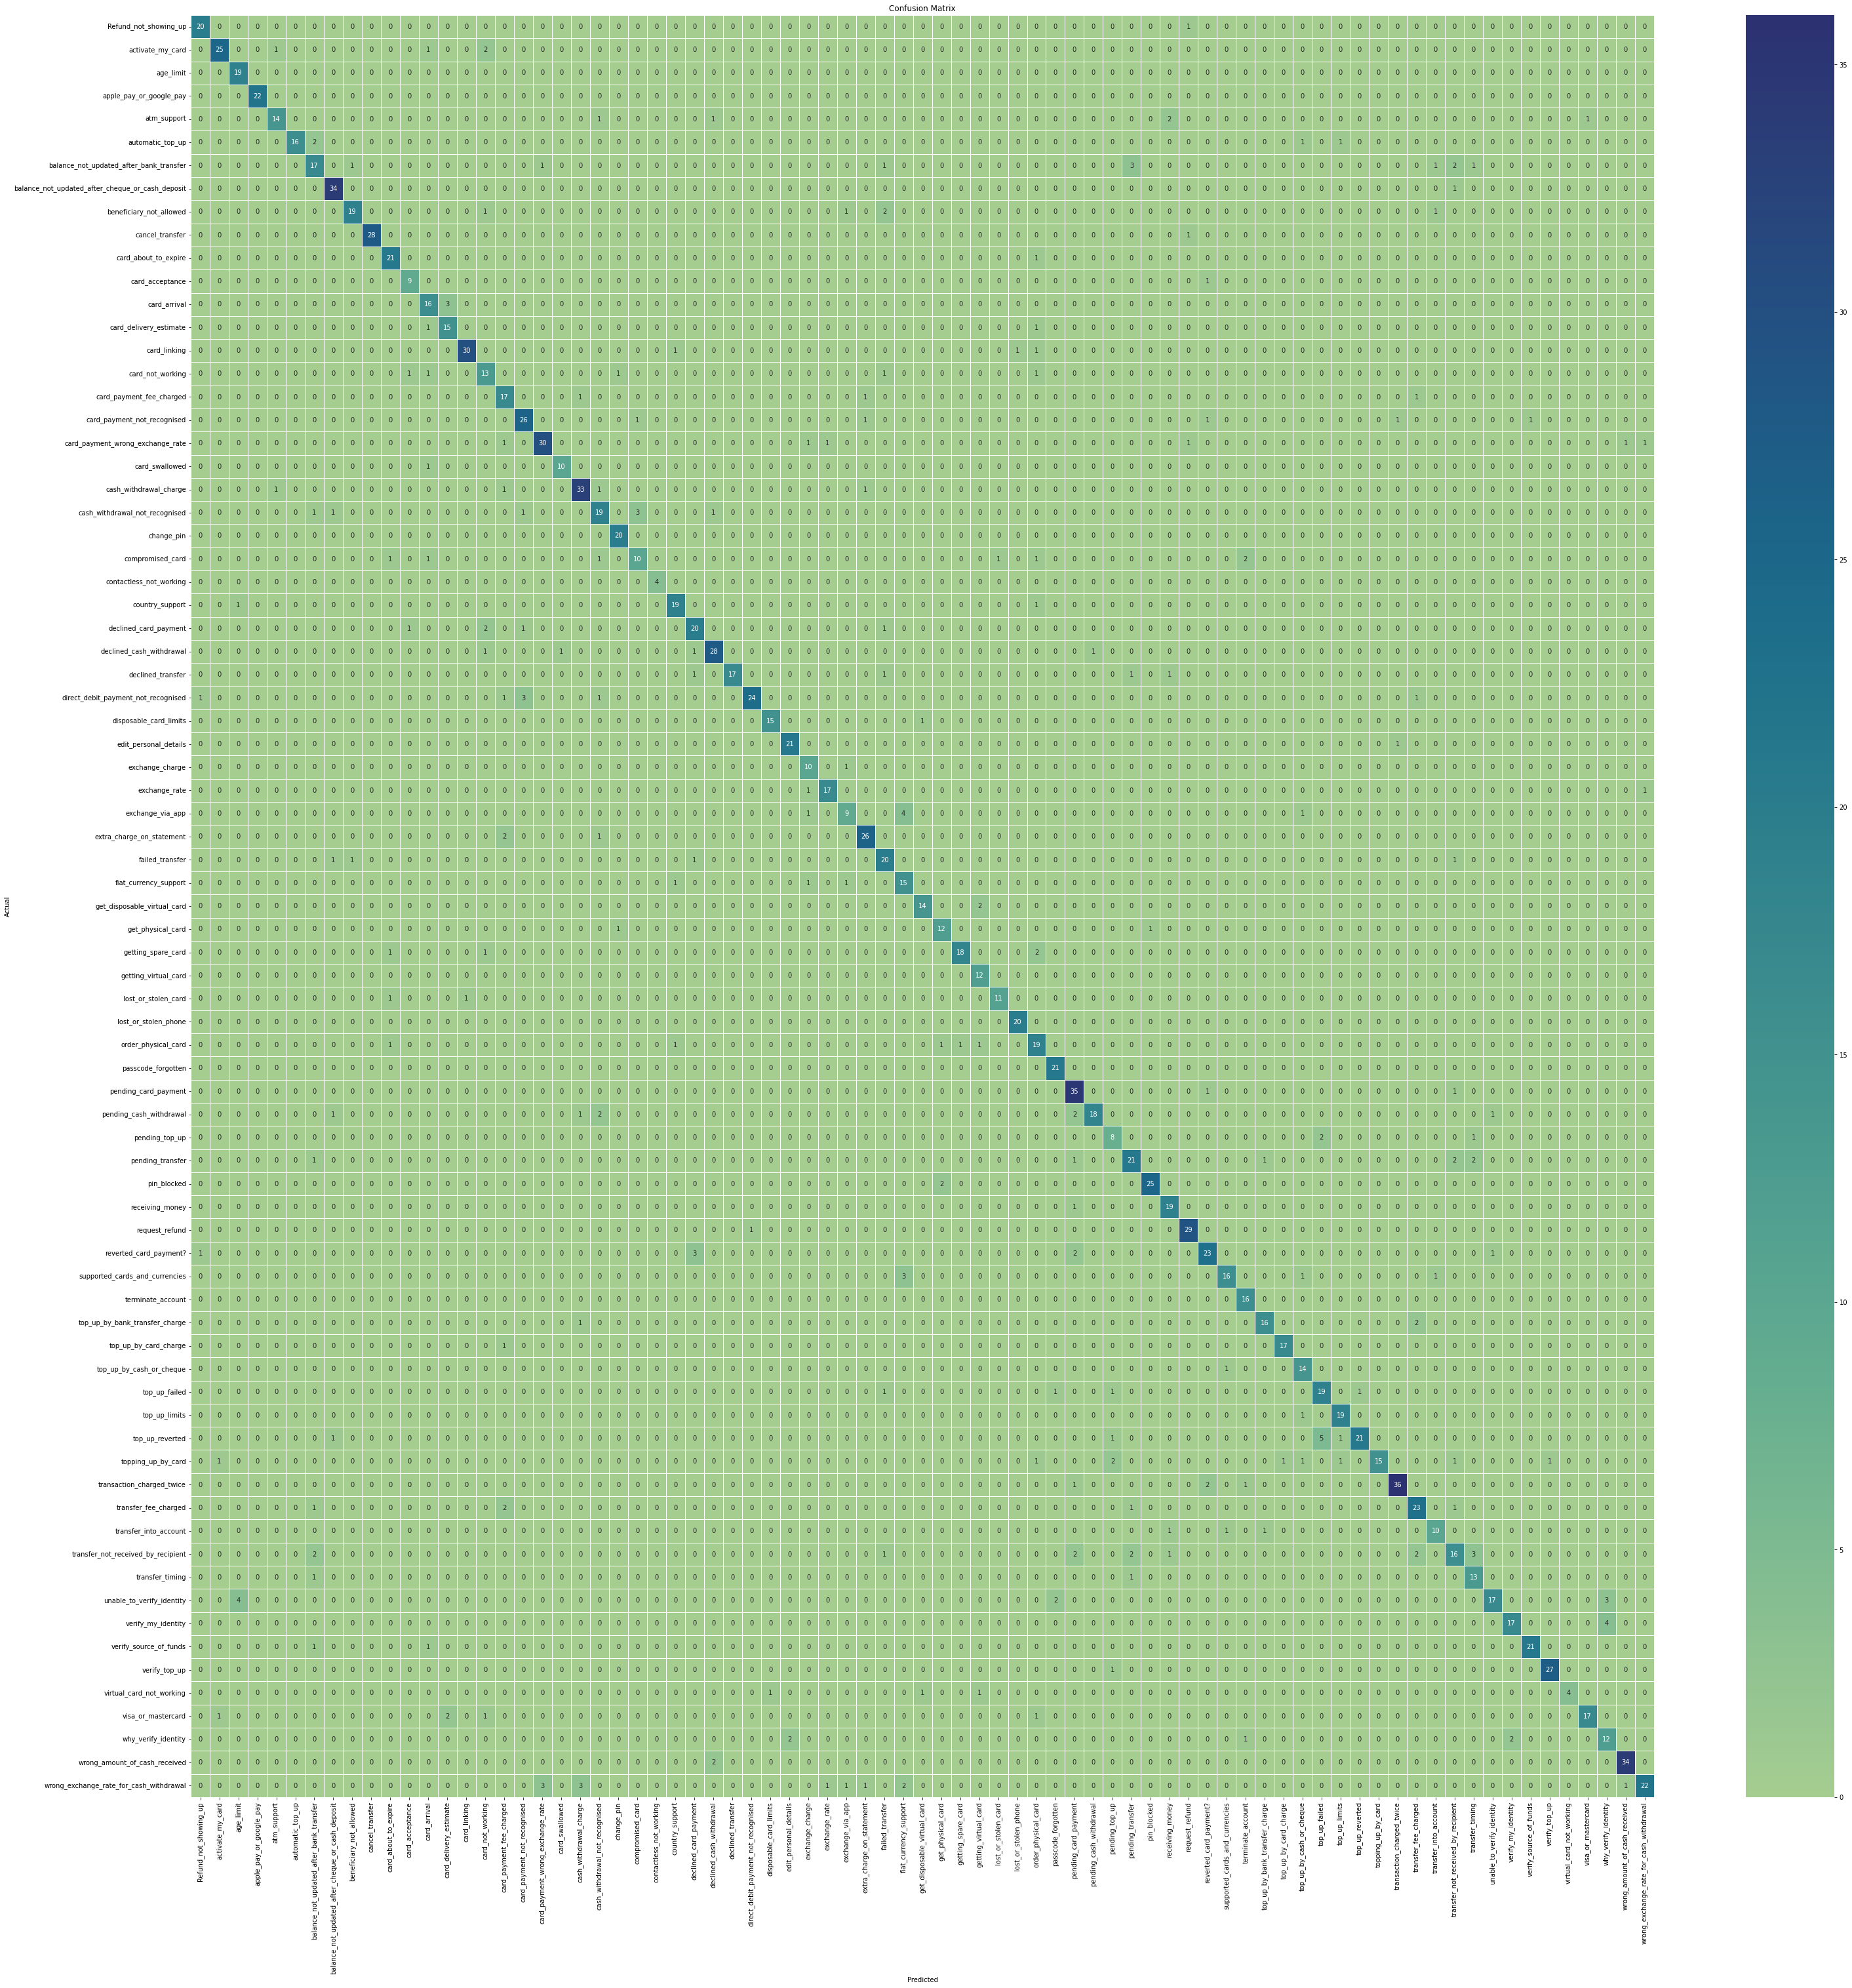

Total True Positives :  1455.0
Total False Positives :  269.0
Total True Negatives :  130755.0
Total False Negatives :  269.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     20                25         19   
TN                   1701              1693       1700   
FP                      2                 2          5   
FN                      1                 4          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       22           14                16   
TN                     1702         1703              1704   
FP                        0            2                 0   
FN                        0            5                 4   

    balance_not_updated_after_bank_transfer  \
TP                                       17   
TN                                     1688   
FP                                        9   
FN                                       10   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                34                       19   
TN                                              1685                     1698   
FP                                                 4                        2   
FN                                                 1                        5   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               28                    21                9            16   
TN             1695                  1698             1712          1699   
FP                0                     4                2             6   
FN                1                     1                1             3   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      15            30                13   
TN                    1702          1690              1698   
FP                       5             1                 8   
FN                       2             3                 5   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        17                           26   
TN                      1696                         1688   
FP                         8                            5   
FN                         3                            5   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                30              10                      33   
TN                              1684            1712                    1681   
FP                                 4               1                       6   
FN                                 6               1                       4   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              19          20                10   
TN                            1691        1702              1703   
FP                               7           2                 4   
FN                               7           0                 7   

    contactless_not_working  country_support  declined_card_payment  \
TP                        4               19                     20   
TN                     1720             1700                   1693   
FP                        0                3                      6   
FN                        0                2                      5   

    declined_cash_withdrawal  declined_transfer  \
TP                        28                 17   
TN                      1688               1703   
FP                         4                  0   
FN                         4                  4   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   24                      15   
TN                                 1692                    1707   
FP                                    1                       1   
FN                                    7                       1   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Using RandomForestClassifier and Count Vectorizer 

countVectorizer = CountVectorizer(ngram_range=(1,2)).fit_transform(utterances['lemmatized_utterance'])
X = np.array(countVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

randomForestClassifier2 = RandomForestClassifier()

#fit with features 
randomForestClassifier2.fit(X_train, y_train)

#get the predictions of X_test
y_pred = randomForestClassifier2.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RF1")

### Using RandomOverSampler to balance the imbalanced data

#### Using SVM

Accuracy: 0.8868909512761021
F1 score: 0.8871151293459855
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.97      0.97      0.97        29
                                activate_my_card       0.93      0.89      0.91        28
                                       age_limit       0.94      0.94      0.94        18
                         apple_pay_or_google_pay       1.00      0.95      0.98        22
                                     atm_support       0.93      0.93      0.93        14
                                automatic_top_up       0.95      0.95      0.95        22
         balance_not_updated_after_bank_transfer       0.66      0.68      0.67        31
balance_not_updated_after_cheque_or_cash_deposit       0.91      0.97      0.94        33
                         beneficiary_not_allowed       0.88      0.81      0.85        27
                                 cancel_t

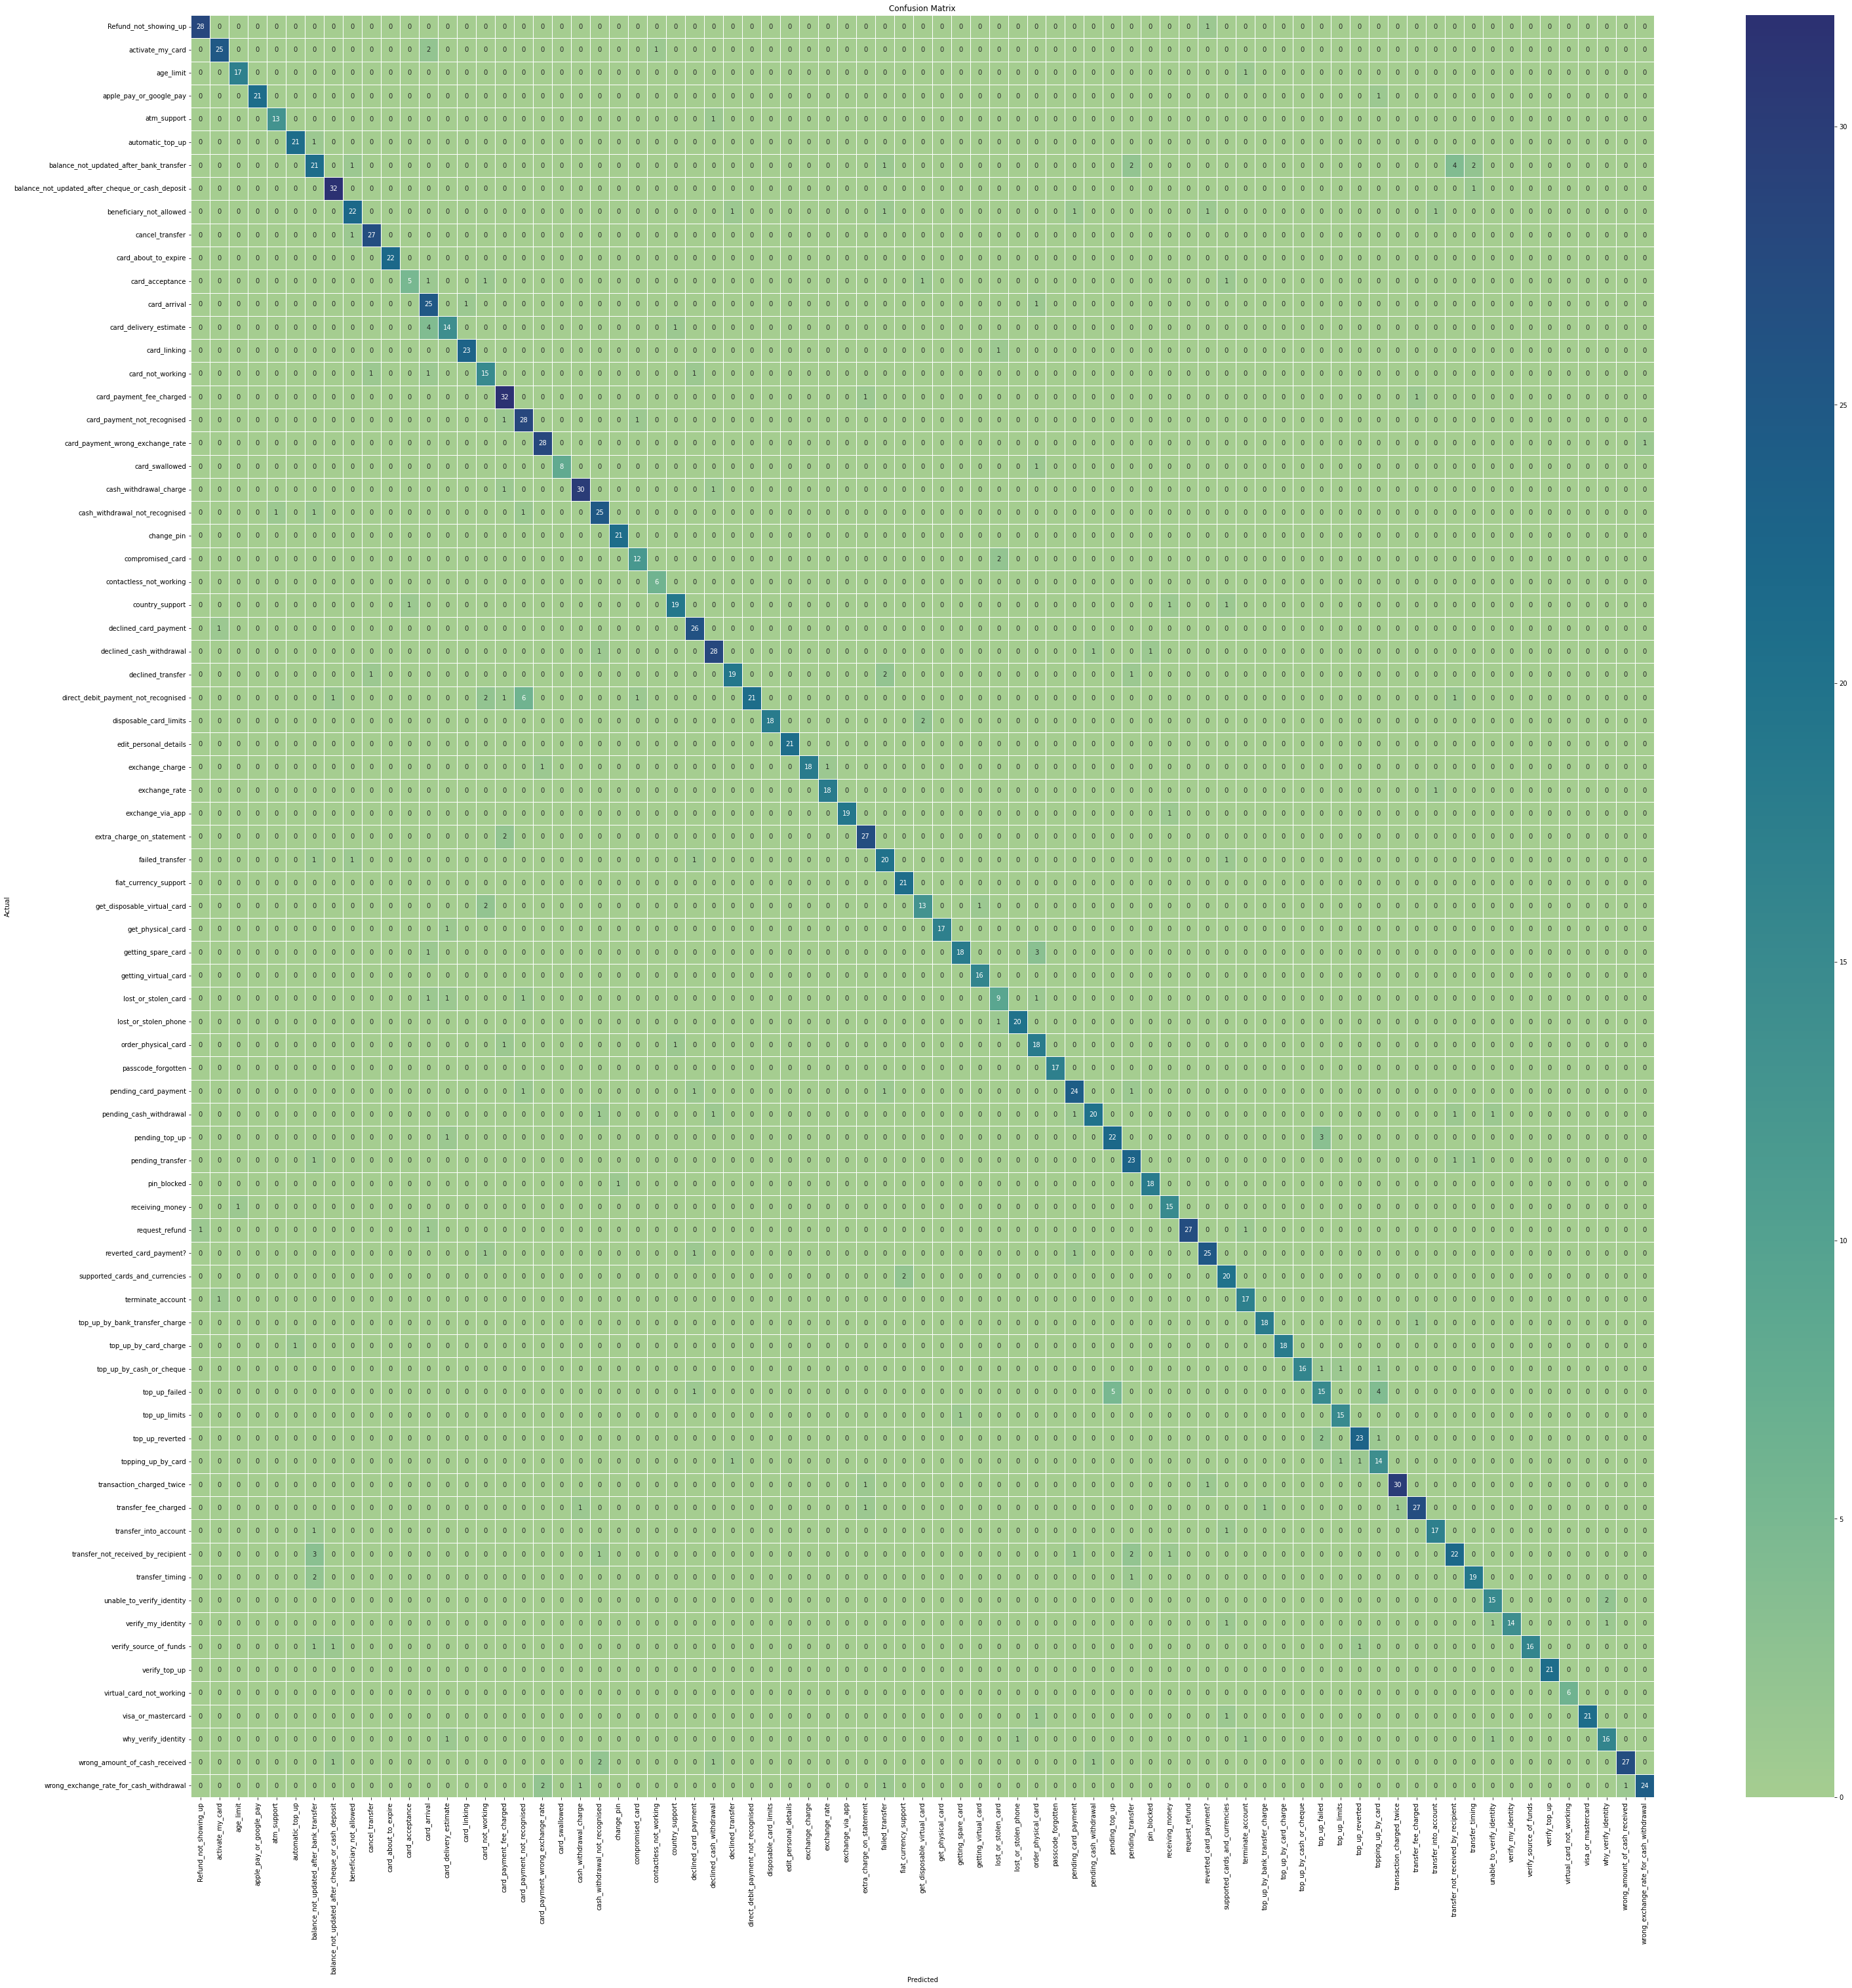

Total True Positives :  1529.0
Total False Positives :  195.0
Total True Negatives :  130829.0
Total False Negatives :  195.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     28                25         17   
TN                   1694              1694       1705   
FP                      1                 2          1   
FN                      1                 3          1   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       21           13                21   
TN                     1702         1709              1701   
FP                        0            1                 1   
FN                        1            1                 1   

    balance_not_updated_after_bank_transfer  \
TP                                       21   
TN                                     1682   
FP                                       11   
FN                                       10   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                32                       22   
TN                                              1688                     1694   
FP                                                 3                        3   
FN                                                 1                        5   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    22                5            25   
TN             1694                  1702             1714          1686   
FP                2                     0                1            11   
FN                1                     0                4             2   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      14            23                15   
TN                    1701          1699              1700   
FP                       4             1                 6   
FN                       5             1                 3   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        32                           28   
TN                      1684                         1685   
FP                         6                            9   
FN                         2                            2   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                28               8                      30   
TN                              1692            1715                    1690   
FP                                 3               0                       2   
FN                                 1               1                       2   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              25          21                12   
TN                            1691        1702              1708   
FP                               5           1                 2   
FN                               3           0                 2   

    contactless_not_working  country_support  declined_card_payment  \
TP                        6               19                     26   
TN                     1717             1700                   1692   
FP                        1                2                      5   
FN                        0                3                      1   

    declined_cash_withdrawal  declined_transfer  \
TP                        28                 19   
TN                      1689               1699   
FP                         4                  2   
FN                         3                  4   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   21                      18   
TN                                 1691                    1704   
FP                                    0                       0   
FN                                   12                       2   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# We will use TF-IDF Vectorizer with SVM Model (since SVM classifier above gives 
# highest accuracy so far) with RandomOverSampler to balance the data.


tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = tfidfVectorizer.toarray()

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#Uncomment to see the distribution
#print("instances per class label in training data before oversampling.")
#display(Counter(y_train))

#Define RandomOverSampler 

randomOverSampler = RandomOverSampler(random_state=500)
X_train_ROS, y_train_ROS = randomOverSampler.fit_resample(X_train, y_train)

# Check the number of instanaces for each class in oversampled training data
#Uncomment to see the distribution
#print("instances per class label in training data after oversampling.")
#display(Counter(y_train_ROS))

SVM_classifier_model3 = SVC(kernel='linear', gamma='auto')

#fit with oversampled features 
SVM_classifier_model3.fit(X_train_ROS, y_train_ROS)

#get the predictions of X_test
y_pred = SVM_classifier_model3.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMROS1")

#### Using SMOTE to balance the imbalanced data

Accuracy: 0.8845707656612529
F1 score: 0.8854667544933551
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.90      0.93      0.91        28
                                activate_my_card       0.94      1.00      0.97        31
                                       age_limit       0.95      1.00      0.98        20
                         apple_pay_or_google_pay       0.96      0.96      0.96        24
                                     atm_support       1.00      0.93      0.96        14
                                automatic_top_up       0.96      1.00      0.98        24
         balance_not_updated_after_bank_transfer       0.71      0.73      0.72        30
balance_not_updated_after_cheque_or_cash_deposit       0.92      0.95      0.93        37
                         beneficiary_not_allowed       0.96      0.84      0.90        32
                                 cancel_t

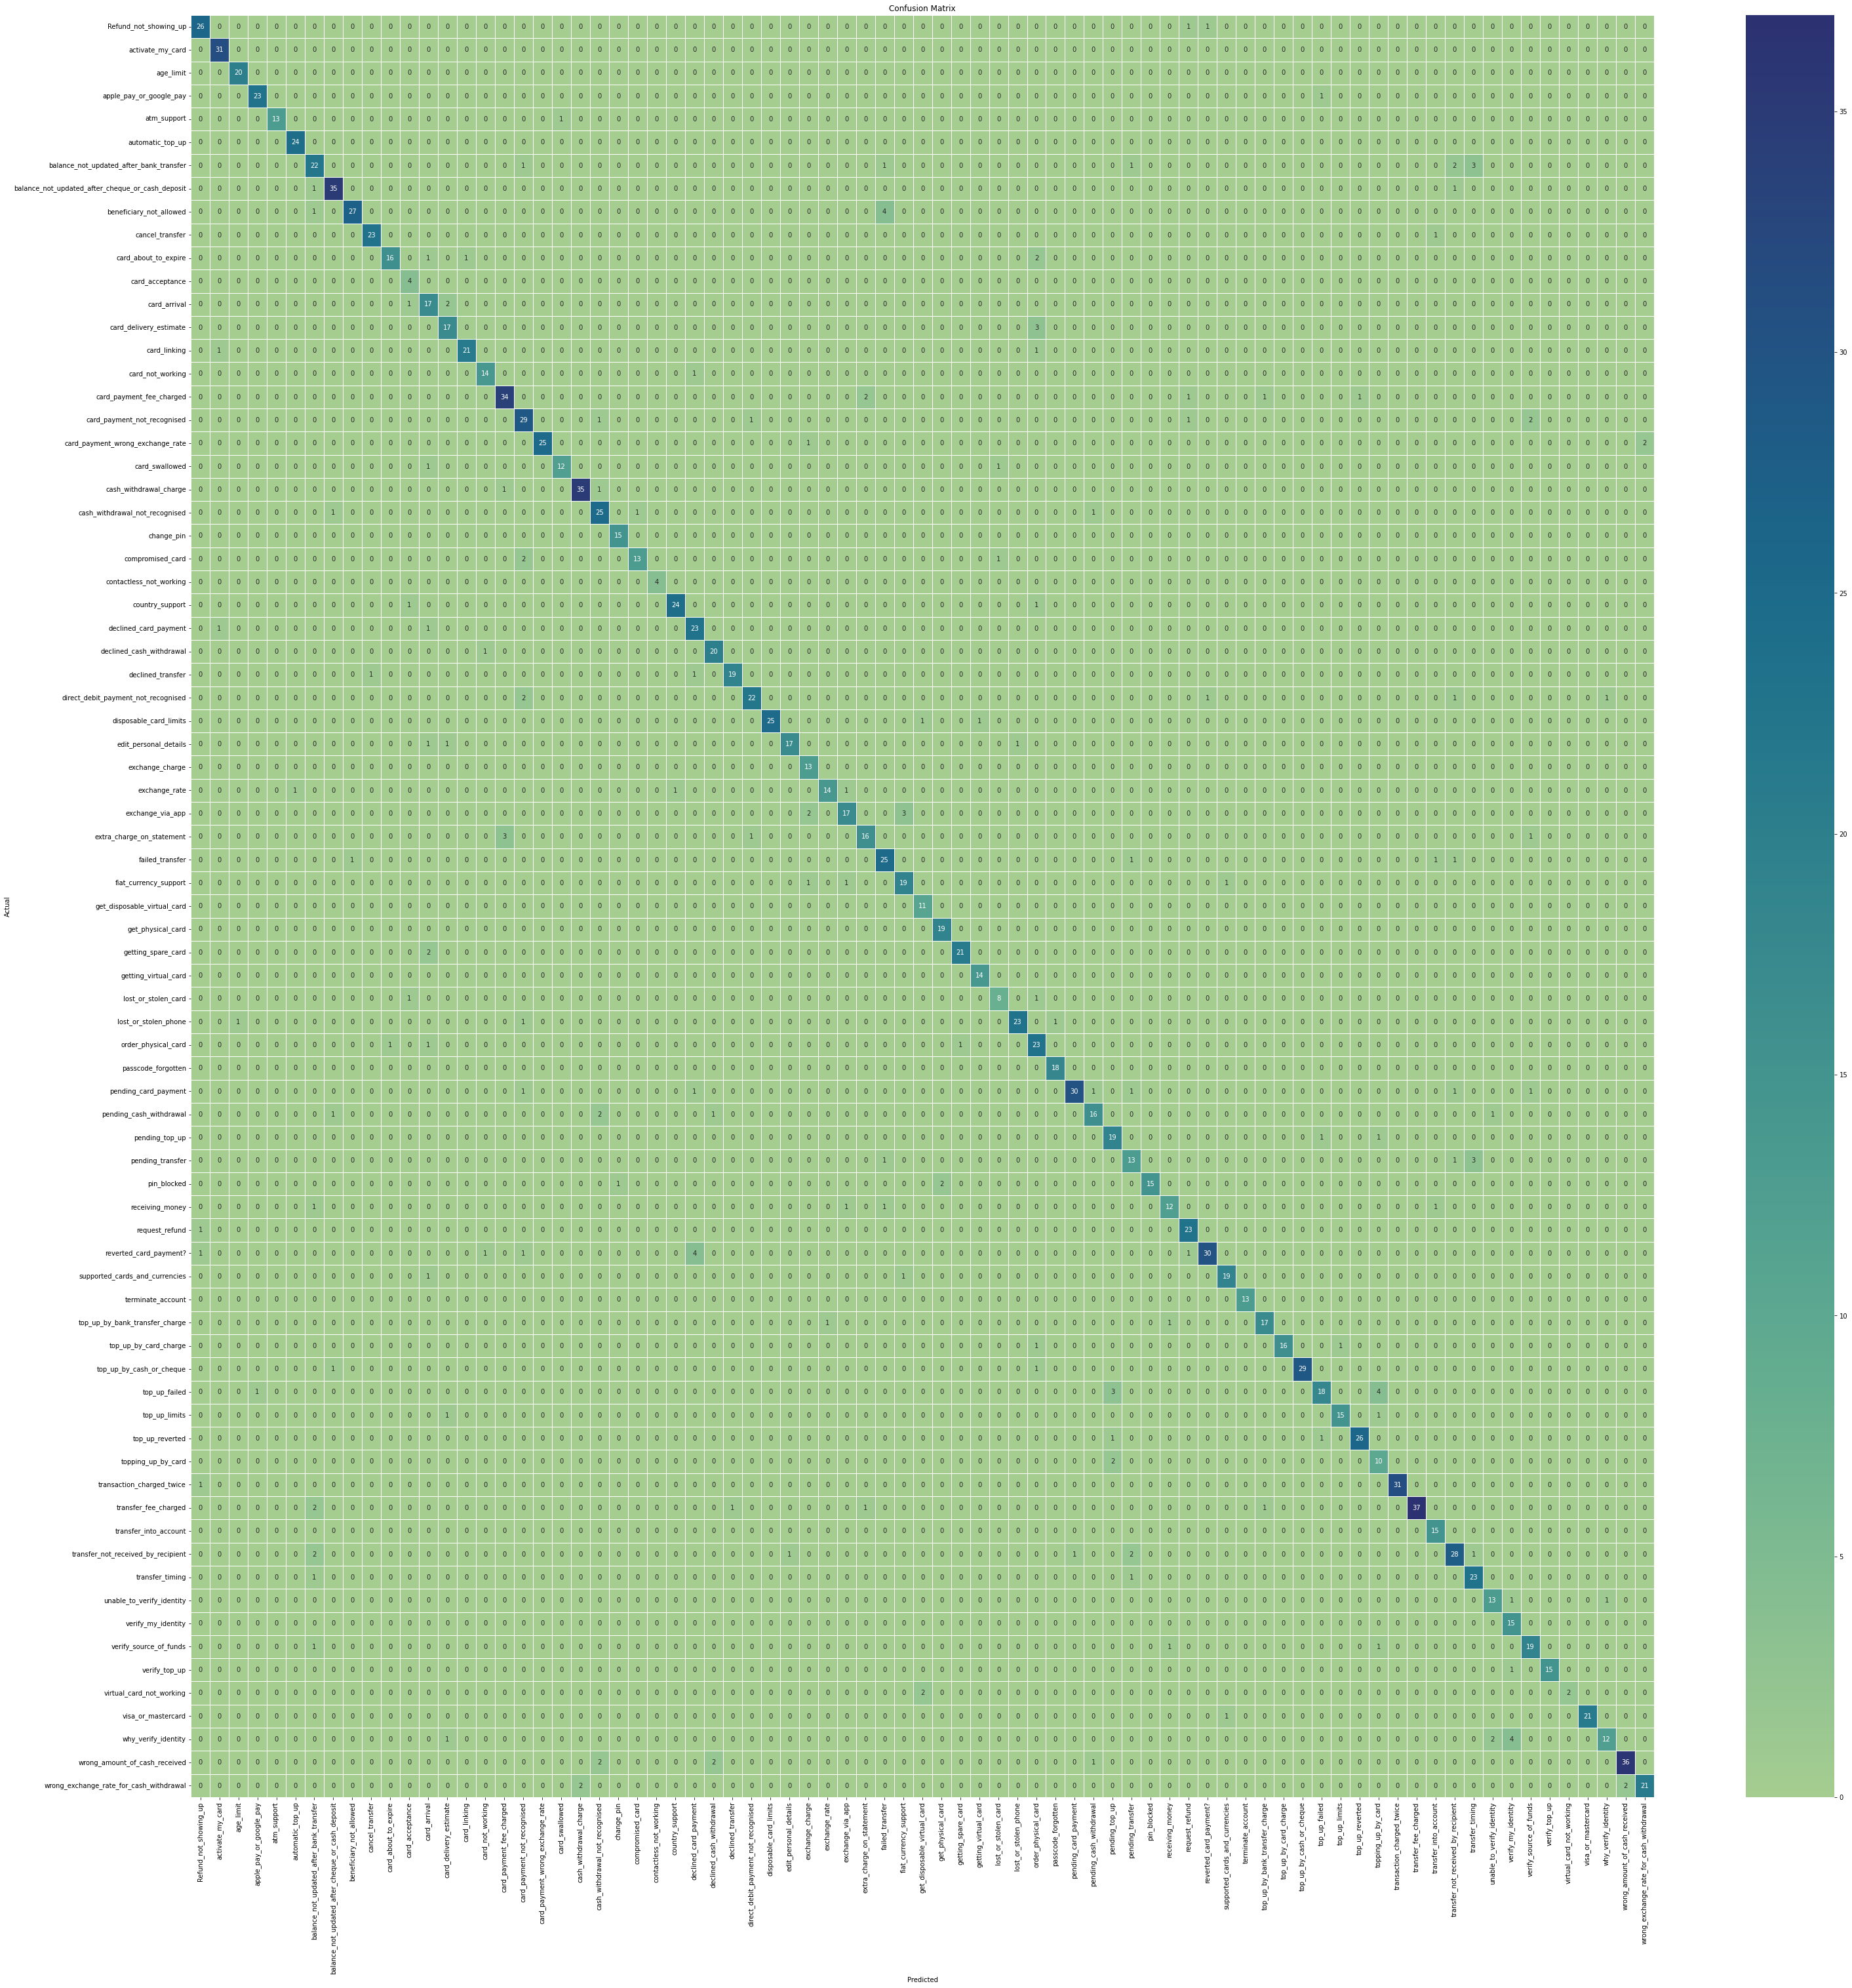

Total True Positives :  1525.0
Total False Positives :  199.0
Total True Negatives :  130825.0
Total False Negatives :  199.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     26                31         20   
TN                   1693              1691       1703   
FP                      3                 2          1   
FN                      2                 0          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       23           13                24   
TN                     1699         1710              1699   
FP                        1            0                 1   
FN                        1            1                 0   

    balance_not_updated_after_bank_transfer  \
TP                                       22   
TN                                     1685   
FP                                        9   
FN                                        8   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                35                       27   
TN                                              1684                     1691   
FP                                                 3                        1   
FN                                                 2                        5   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               23                    16                4            17   
TN             1699                  1703             1717          1696   
FP                1                     1                3             8   
FN                1                     4                0             3   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      17            21                14   
TN                    1699          1700              1707   
FP                       5             1                 2   
FN                       3             2                 1   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        34                           29   
TN                      1681                         1682   
FP                         4                            8   
FN                         5                            5   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                25              12                      35   
TN                              1696            1709                    1685   
FP                                 0               1                       2   
FN                                 3               2                       2   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              25          15                13   
TN                            1690        1708              1707   
FP                               6           1                 1   
FN                               3           0                 3   

    contactless_not_working  country_support  declined_card_payment  \
TP                        4               24                     23   
TN                     1720             1697                   1692   
FP                        0                1                      7   
FN                        0                2                      2   

    declined_cash_withdrawal  declined_transfer  \
TP                        20                 19   
TN                      1700               1702   
FP                         3                  1   
FN                         1                  2   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   22                      25   
TN                                 1695                    1697   
FP                                    2                       0   
FN                                    5                       2   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# We will use TF-IDF Vectorizer with SVM Model (since SVM classifier above gives 
# highest accuracy so far) with SMOTE to balance the data.

tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Uncomment to see the distribution
#print("instances per class label in training data before oversampling.")
#display(Counter(y_train))

#Define SMOTE 

smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Check the number of instanaces for each class in oversampled training data
#Uncomment to see the distribution
#print("instances per class label in training data after oversampling.")
#display(Counter(y_train_SMOTE))

SVM_classifier_model4 = SVC(kernel='linear', gamma='auto')

#fit with oversampled features 
SVM_classifier_model4.fit(X_train_SMOTE, y_train_SMOTE)

#get the predictions of X_test
y_pred = SVM_classifier_model4.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMSMOT")

#### Using RandomForestClassifer and SMOTE

Accuracy: 0.8472544470224285
F1 score: 0.8469202745670226
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.86      0.88      0.87        34
                                activate_my_card       0.98      0.96      0.97        51
                                       age_limit       0.89      0.94      0.91        33
                         apple_pay_or_google_pay       0.92      0.97      0.95        37
                                     atm_support       0.72      0.87      0.79        15
                                automatic_top_up       0.97      0.94      0.96        36
         balance_not_updated_after_bank_transfer       0.73      0.73      0.73        45
balance_not_updated_after_cheque_or_cash_deposit       0.88      0.94      0.91        47
                         beneficiary_not_allowed       0.82      0.82      0.82        39
                                 cancel_t

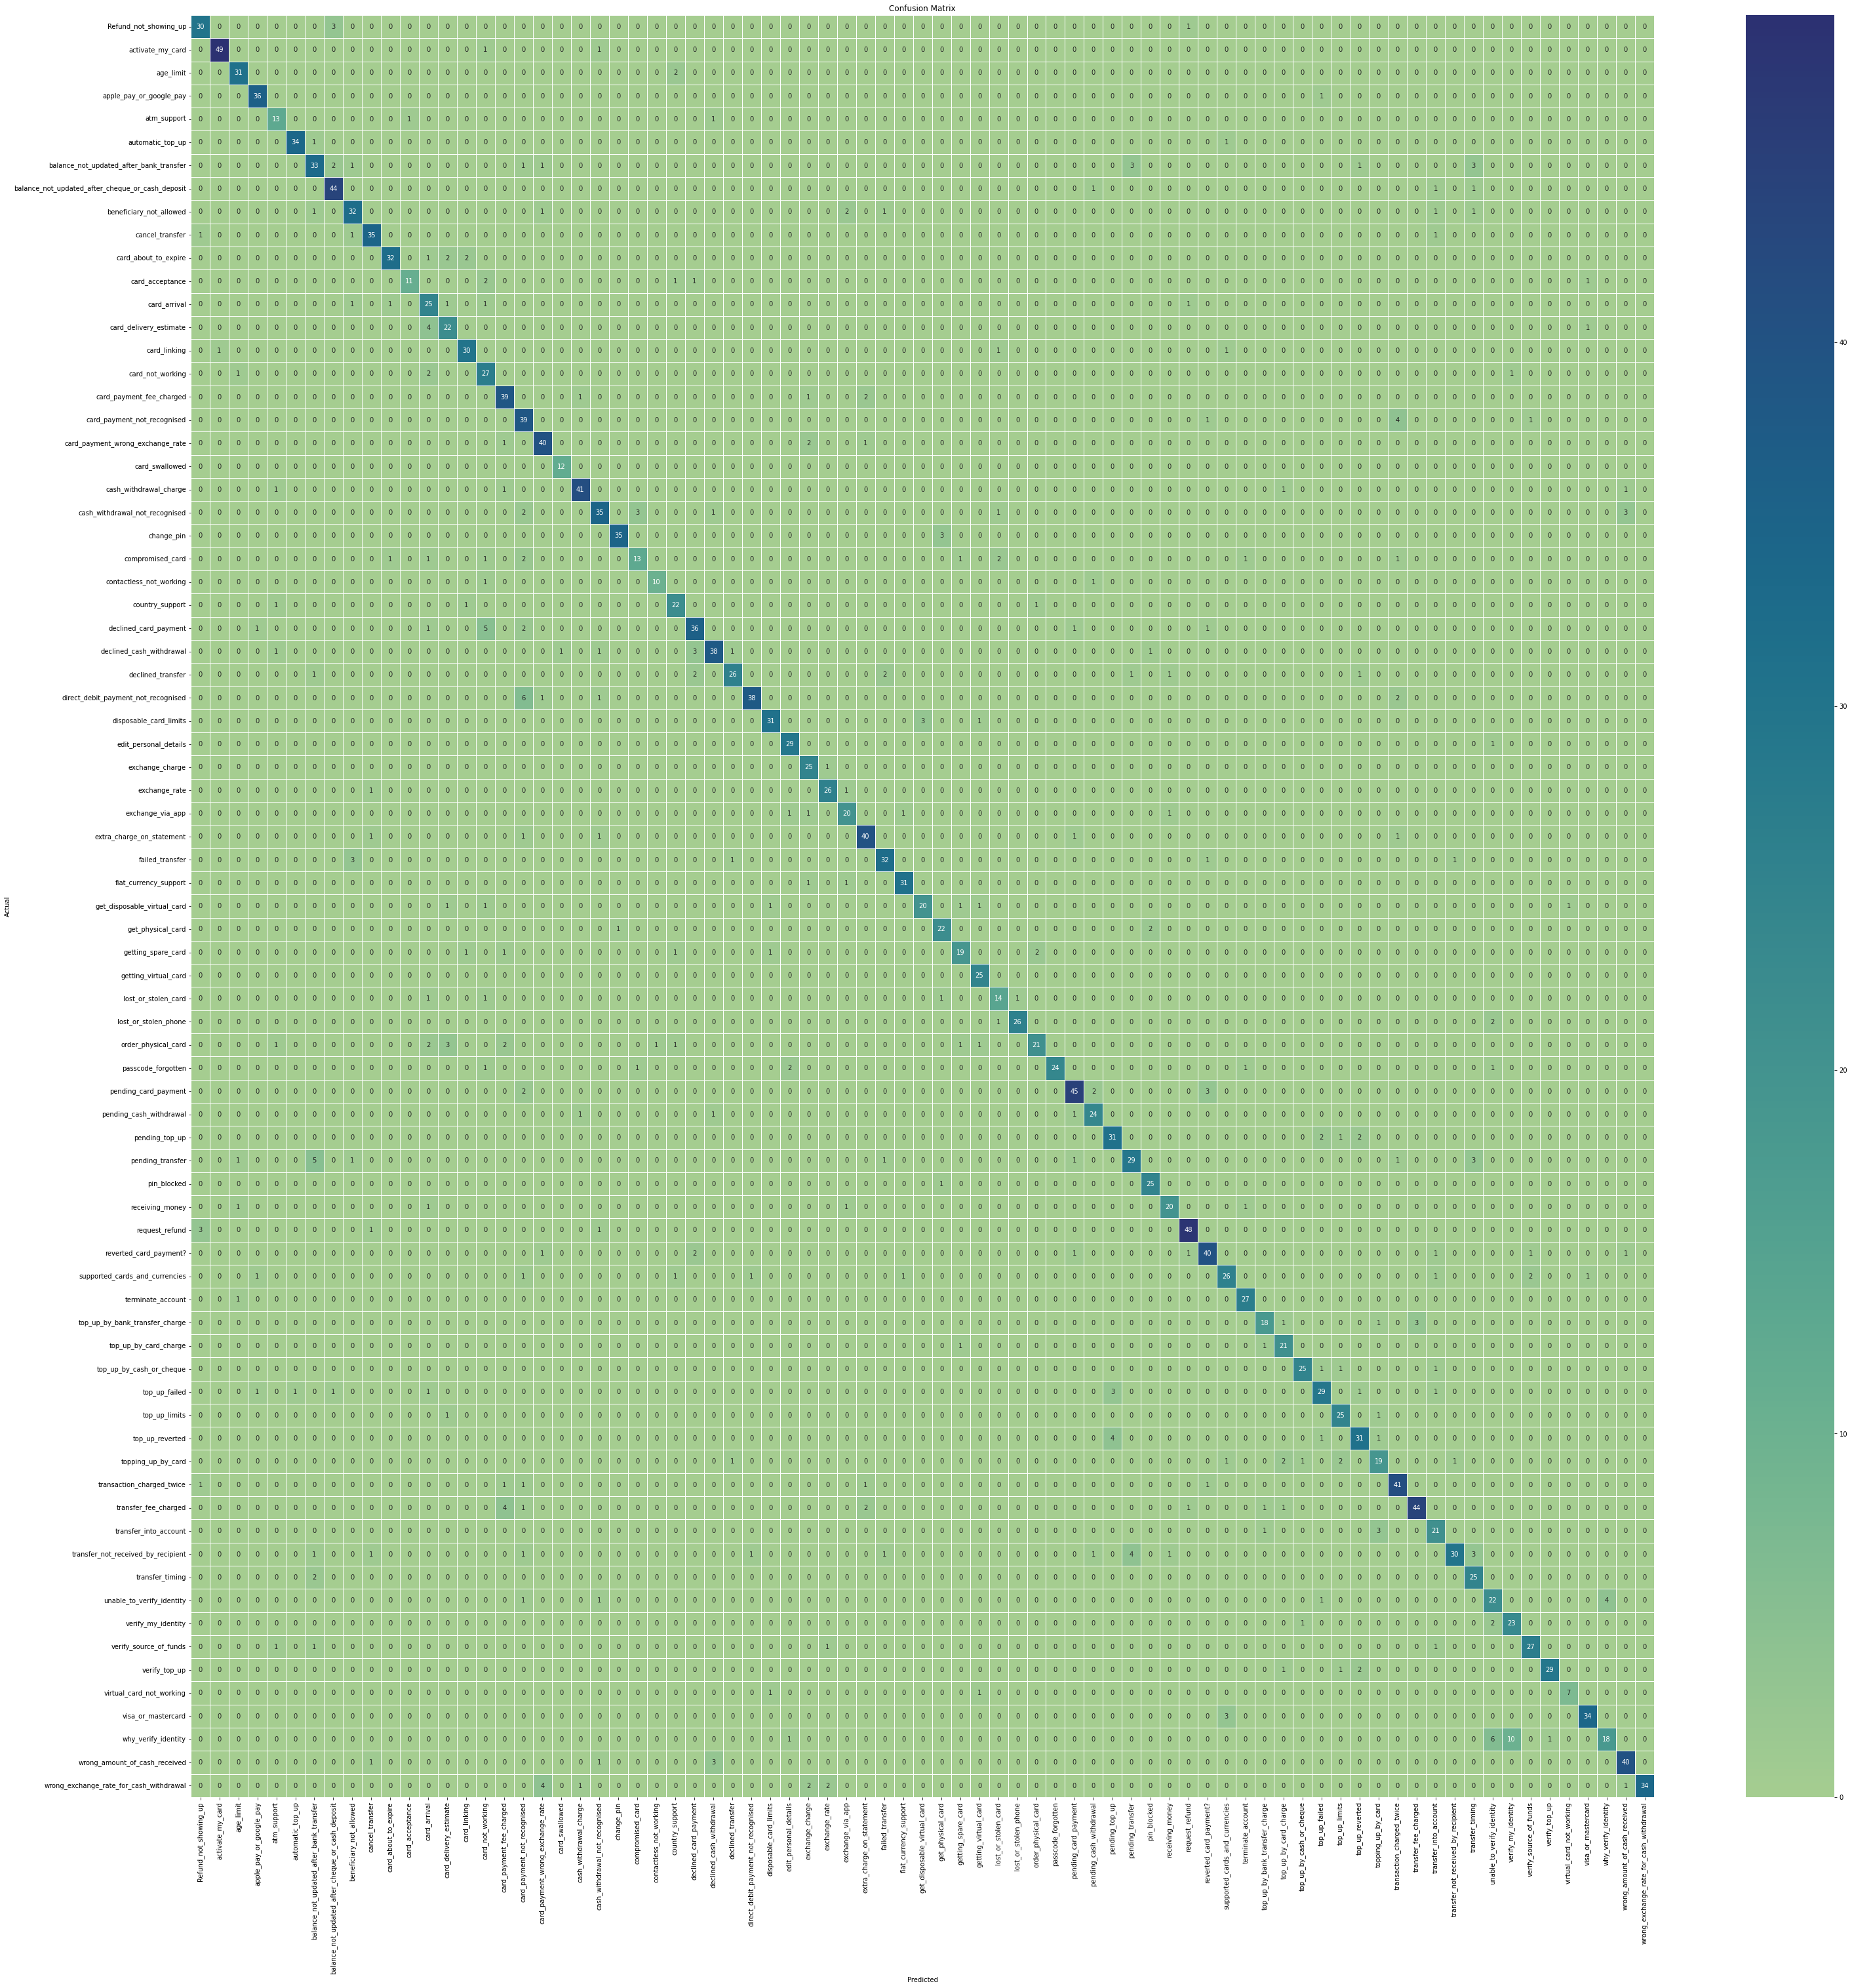

Total True Positives :  2191.0
Total False Positives :  395.0
Total True Negatives :  196141.0
Total False Negatives :  395.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     30                49         31   
TN                   2547              2534       2549   
FP                      5                 1          4   
FN                      4                 2          2   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       36           13                34   
TN                     2546         2566              2549   
FP                        3            5                 1   
FN                        1            2                 2   

    balance_not_updated_after_bank_transfer  \
TP                                       33   
TN                                     2529   
FP                                       12   
FN                                       12   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                44                       32   
TN                                              2533                     2540   
FP                                                 6                        7   
FN                                                 3                        7   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               35                    32               11            25   
TN             2543                  2547             2569          2542   
FP                5                     2                1            14   
FN                3                     5                5             5   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      22            30                27   
TN                    2551          2549              2541   
FP                       8             4                14   
FN                       5             3                 4   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        39                           39   
TN                      2533                         2520   
FP                        10                           21   
FN                         4                            6   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                40              12                      41   
TN                              2534            2573                    2538   
FP                                 8               1                       3   
FN                                 4               0                       4   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              35          35                13   
TN                            2534        2547              2559   
FP                               7           1                 4   
FN                              10           3                10   

    contactless_not_working  country_support  declined_card_payment  \
TP                       10               22                     36   
TN                     2573             2555                   2531   
FP                        1                6                      8   
FN                        2                3                     11   

    declined_cash_withdrawal  declined_transfer  \
TP                        38                 26   
TN                      2534               2549   
FP                         6                  3   
FN                         8                  8   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   38                      31   
TN                                 2536                    2548   
FP                                    2                       3   
FN                                   10                       4   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Using RandomForestClassifier and TF-IDF Vectorizer with OverSampling technique SMOTE

tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Define SMOTE 
smote = SMOTE(random_state=777, k_neighbors=1)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

randomForestClassifier3 = RandomForestClassifier()

#fit with oversampled features 
randomForestClassifier3.fit(X_train_SMOTE, y_train_SMOTE)

#get the predictions of X_test
y_pred = randomForestClassifier3.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RFSMOT")

#### Using MultiNomialNB Classifier and SMOTE

Accuracy: 0.8439675174013921
F1 score: 0.8436254970201876
                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.93      0.86      0.89        29
                                activate_my_card       0.90      0.96      0.93        28
                                       age_limit       1.00      1.00      1.00        18
                         apple_pay_or_google_pay       0.96      1.00      0.98        22
                                     atm_support       0.80      0.57      0.67        14
                                automatic_top_up       1.00      0.86      0.93        22
         balance_not_updated_after_bank_transfer       0.70      0.70      0.70        30
balance_not_updated_after_cheque_or_cash_deposit       0.83      0.88      0.85        33
                         beneficiary_not_allowed       0.86      0.89      0.87        27
                                 cancel_t

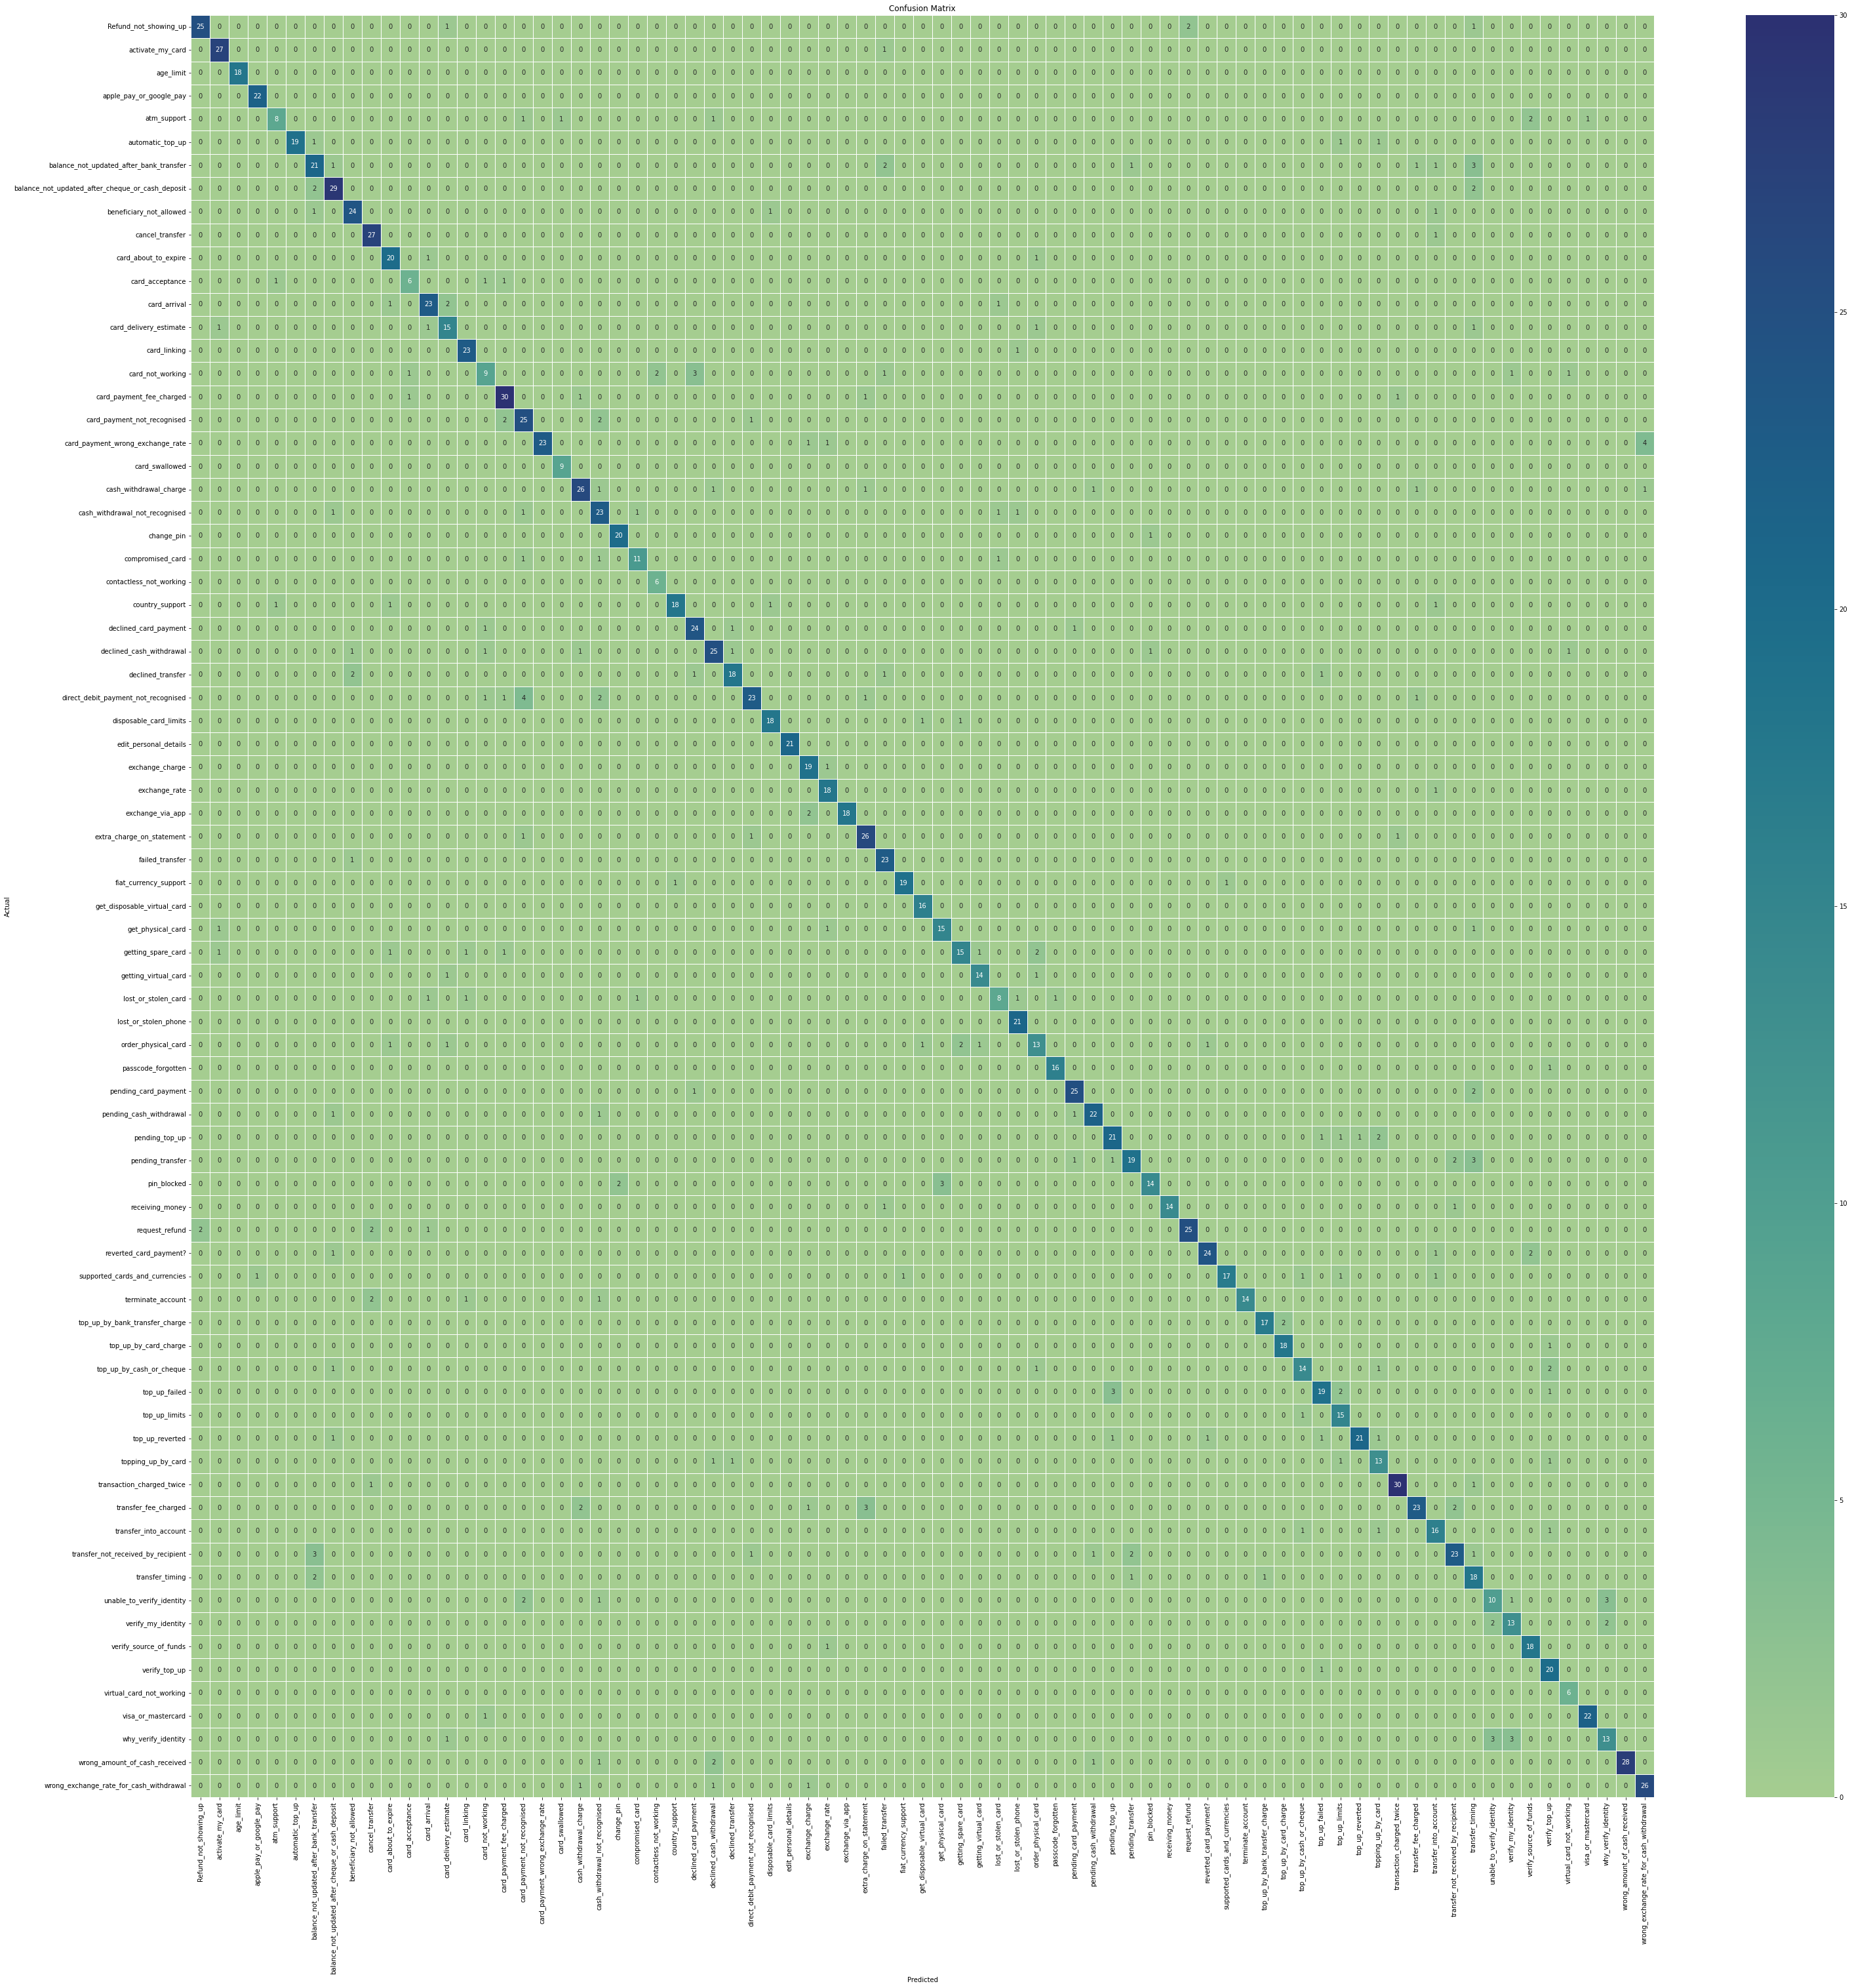

Total True Positives :  1455.0
Total False Positives :  269.0
Total True Negatives :  130755.0
Total False Negatives :  269.0


Refund_not_showing_up  activate_my_card  age_limit  \
TP                     25                27         18   
TN                   1693              1693       1706   
FP                      2                 3          0   
FN                      4                 1          0   

    apple_pay_or_google_pay  atm_support  automatic_top_up  \
TP                       22            8                19   
TN                     1701         1708              1702   
FP                        1            2                 0   
FN                        0            6                 3   

    balance_not_updated_after_bank_transfer  \
TP                                       21   
TN                                     1685   
FP                                        9   
FN                                        9   

    balance_not_updated_after_cheque_or_cash_deposit  beneficiary_not_allowed  \
TP                                                29                       24   
TN                                              1685                     1693   
FP                                                 6                        4   
FN                                                 4                        3   

    cancel_transfer  card_about_to_expire  card_acceptance  card_arrival  \
TP               27                    20                6            23   
TN             1691                  1698             1713          1693   
FP                5                     4                2             4   
FN                1                     2                3             4   

    card_delivery_estimate  card_linking  card_not_working  \
TP                      15            23                 9   
TN                    1699          1697              1701   
FP                       6             3                 5   
FN                       4             1                 9   

    card_payment_fee_charged  card_payment_not_recognised  \
TP                        30                           25   
TN                      1685                         1684   
FP                         5                           10   
FN                         4                            5   

    card_payment_wrong_exchange_rate  card_swallowed  cash_withdrawal_charge  \
TP                                23               9                      26   
TN                              1695            1714                    1687   
FP                                 0               1                       5   
FN                                 6               0                       6   

    cash_withdrawal_not_recognised  change_pin  compromised_card  \
TP                              23          20                11   
TN                            1686        1701              1708   
FP                              10           2                 2   
FN                               5           1                 3   

    contactless_not_working  country_support  declined_card_payment  \
TP                        6               18                     24   
TN                     1716             1701                   1692   
FP                        2                1                      5   
FN                        0                4                      3   

    declined_cash_withdrawal  declined_transfer  \
TP                        25                 18   
TN                      1687               1698   
FP                         6                  3   
FN                         6                  5   

    direct_debit_payment_not_recognised  disposable_card_limits  \
TP                                   23                      18   
TN                                 1688                    1702   
FP                                    3                       2   
FN                                   10                       2   

    edit_personal_details  exchange_charge  exchange_rate  exchange_via_

In [ ]:
# Using TfidfVectorizer
tfidfVectorizer = TfidfVectorizer().fit_transform(utterances['lemmatized_utterance'])
X = np.array(tfidfVectorizer.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

#Define SMOTE 
smote = SMOTE(random_state=777, k_neighbors=1)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Initalize MNB classifier and fit with features
MNB_model_SMOTE = MultinomialNB().fit(X_train_SMOTE, y_train_SMOTE)

# get the predictions for X_test using pipeline object
y_pred = MNB_model_SMOTE.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNBSMOT")

### Building Neural Networks Using Word Embeddings

##### Model 1 - In this model, we will use Tokenizer to convert text to sequences, fit the tokenizer on a training data using most common words in vocabulary built using the same trainin data. Then, using SMOTE balance the imbalanced training set. We will then build a sequential model with Embedding Layer as the first layer with vocabulary size we obtained in previous steps, Outpur dim size as 100, and input length as 15 (this is the maximum length of utterance), Flatten layer and output Dense layer with 77 output space (since we have 77 different intent categories) and activation function as 'Softmax'. We will use 'rmsprop' optimizer with 'sparse_categorical_crossentropy' as loss function and metrics as 'accuracy' to evaluate the model.

In [ ]:
MAX_TEXT_LEN = 15
EMBEDDING_OUTPUT_DIM = 300

In [ ]:
# split the dataset into training and testing

X = utterances['lemmatized_utterance']
y = utterances['intent_labelEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Prepare tokenizer using Tokenizer

tokenizer_x = Tokenizer()
tokenizer_x.fit_on_texts(list(X))

#size of vocabulary ( +1 for padding token)
dataset_voc_size = len(tokenizer_x.word_index) + 1

dataset_voc_size

940

In [ ]:
# Get the most common words in dataset and get the vocab size using Tokenizer

# threshold = 2

# cnt=0
# tot_cnt=0
# freq=0
# tot_freq=0

# for key,value in tokenizer_x.word_counts.items():
#     tot_cnt=tot_cnt+1
#     tot_freq=tot_freq+value
#     if(value<threshold):
#         cnt=cnt+1
#         freq=freq+value
    
# common_words = tot_cnt - cnt

# Redefine tokenzier with most common words in dataset
# tokenizer_x = Tokenizer(num_words=common_words)
# tokenizer_x.fit_on_texts(list(X_train))

# Convert text sequences into integer sequences
dataset_x_train_seq = tokenizer_x.texts_to_sequences(X_train)
dataset_x_test_seq = tokenizer_x.texts_to_sequences(X_test)

# Padding the sequences with zeros upto maximum length
dataset_x_train_seq_pad = pad_sequences(dataset_x_train_seq, MAX_TEXT_LEN, padding="post")
dataset_x_test_seq_pad = pad_sequences(dataset_x_test_seq, MAX_TEXT_LEN, padding="post") 

#Define SMOTE 
# smote = SMOTE(random_state=777, k_neighbors=1)
# X_train_SMOTE, y_train_SMOTE = smote.fit_resample(dataset_x_train_seq_pad, y_train)


In [ ]:
def printHistory_plot_graph(history):

  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
# Define a sequential model
model_1 = Sequential()
model_1.add(Embedding(dataset_voc_size, EMBEDDING_OUTPUT_DIM, input_length=MAX_TEXT_LEN))
model_1.add(Flatten())
model_1.add(Dense(77, activation="softmax"))

#compile the model
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
model_1.summary()

#fit the model with training data
history = model_1.fit(dataset_x_train_seq_pad, y_train, epochs=25)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 15, 300)           275700    
                                                                 
 flatten_10 (Flatten)        (None, 4500)              0         
                                                                 
 dense_62 (Dense)            (None, 77)                346577    
                                                                 
Total params: 622,277
Trainable params: 622,277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
216/216 [==============================] - 6s 28ms/step - loss: 3.9247 - accuracy: 0.1857
Epoch 2/25
216/216 [==============================] - 1s 6ms/step - loss: 2.3230 - accuracy: 0.5212
Epoch 3/25
216/216 [==============================] - 1s 6ms/step - loss: 1.2995 - accuracy: 0.7251
Epoch 4/25

dict_keys(['loss', 'accuracy'])


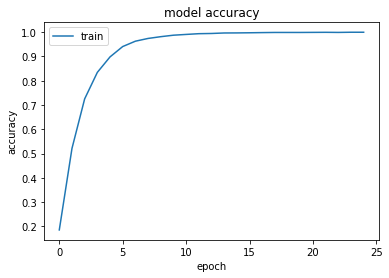

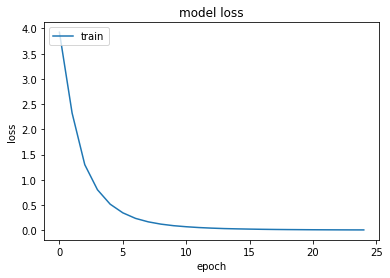

Accuracy: 72.041762


In [ ]:
print(history)
printHistory_plot_graph(history)

#evaluatte the model
loss, accuracy = model_1.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("How do I locate my card?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_1 = [np.argmax(pred) for pred in model_1.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_1 ])

how do locate my card
1/1 [==============================] - 0s 22ms/step
[array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['visa_or_mastercard'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['visa_or_mastercard'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotte

Model 2 - Using Embedding Layer, GlobalAveragePoolong1D, Dropout regularizer, 1 hidden Dense layer with 'relu' activation function, and output Dense layer with 'softmax' activation function.

In [ ]:
#defind drop_out_rate

drop_out_rate = 0.2

# Define a sequential model
model_2 = Sequential()
model_2.add(Embedding(dataset_voc_size, EMBEDDING_OUTPUT_DIM, input_length=MAX_TEXT_LEN))
model_2.add(GlobalAveragePooling1D())
model_2.add(Dropout(drop_out_rate))
model_2.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
model_2.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))

#compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
model_2.summary()

#fit the model with training data
history = model_2.fit(dataset_x_train_seq_pad, y_train, epochs=25)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 15, 300)           275700    
                                                                 
 global_average_pooling1d_14  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_28 (Dropout)        (None, 300)               0         
                                                                 
 dense_63 (Dense)            (None, 512)               154112    
                                                                 
 dense_64 (Dense)            (None, 77)                39501     
                                                                 
Total params: 469,313
Trainable params: 469,313
Non-trainable params: 0
_______________________________________________

dict_keys(['loss', 'accuracy'])


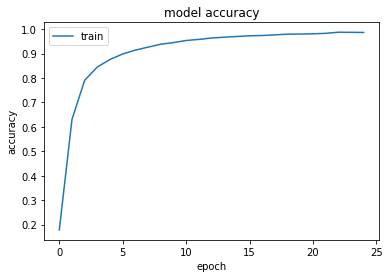

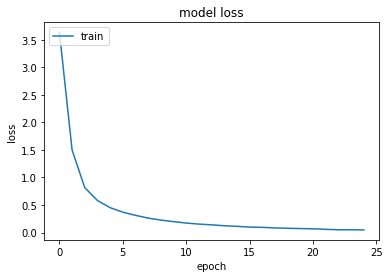

Accuracy: 83.526683


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_2.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:

corrected_utterance = preprocess_utterance("I need a new pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_2.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

need new pin
1/1 [==============================] - 0s 20ms/step
[array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['verify_my_identity'], dtype=object), array(['cancel_transfer'], dtype=object), array(['verify_my_identity'], dtype=object)]


#### Using Pre-trained embeddings Glove, Word2Vec, FastText

In [ ]:
# Load entire GloVe word embedding file into the memory as a dictionary of word to embedding array

embeddings_dict = dict()

def getEmbeddings(pretrained_model_url):
  f = open(pretrained_model_url, encoding="utf-8")
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dict[word] = coefs
  f.close()
  print('Loaded %s word vectors.' % len(embeddings_dict))
  return embeddings_dict

In [ ]:
# create a weight matrix for words in the training dataset

def getWeightMatrix(embeddings, vocab_size, dimen):
  embedding_matrix = np.zeros((vocab_size,dimen))
  for word, i in tokenizer_x.word_index.items():
    if word in embeddings:
      embedding_vector = embeddings[word]
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
  return embedding_matrix

In [ ]:
# Now, let's define the sequential model with pre-trained weights from embedding matrix.
def getSequentialModelWithoutHidden(embedding_layer):
  model = Sequential()
  #Since we chose 300d version of GloVe, we must defind output dimension as 300
  model.add(embedding_layer)
  model.add(Flatten())
  model.add(Dense(77, activation="softmax"))
  return model

In [ ]:
# Define a sequential model
def getSequentialModelWithHidden(embedding_layer, drop_out_rate):
  model = Sequential()
  model.add(embedding_layer)
  model.add(GlobalAveragePooling1D())
  model.add(Dropout(drop_out_rate))
  model.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
  model.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))
  return model

##### Model Building neural network using pre-trained Embedding model GloVe. It's trained on global word-word co-occurrence matrix,  which tabulates how frequently words co-occur with one another in a given corpus. Using Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab uncased, 300d vectors)

In [ ]:
# Embeddings for Glove 300 dimension
embeddings = getEmbeddings("/content/drive/MyDrive/Dissertation/Topic_Analysis/glove.6B/glove.6B.300d.txt")
embedding_matrix = getWeightMatrix(embeddings, dataset_voc_size, 300)

Loaded 400000 word vectors.


Model 3 - Using GloVe Embedding Layer, no hidden layers and output Dense layer with 'softmax' activation function.

In [ ]:
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_3 = getSequentialModelWithoutHidden(embedding_layer)
#compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_3.summary()
#fit the model with training data
history = model_3.fit(dataset_x_train_seq_pad, y_train, epochs=100)


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 15, 300)           282000    
                                                                 
 flatten_12 (Flatten)        (None, 4500)              0         
                                                                 
 dense_70 (Dense)            (None, 77)                346577    
                                                                 
Total params: 628,577
Trainable params: 346,577
Non-trainable params: 282,000
_________________________________________________________________
Epoch 1/100
216/216 [==============================] - 1s 2ms/step - loss: 3.1752 - accuracy: 0.3145
Epoch 2/100
216/216 [==============================] - 1s 2ms/step - loss: 1.4380 - accuracy: 0.7097
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.8519
Ep

dict_keys(['loss', 'accuracy'])


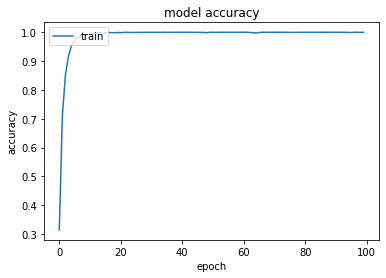

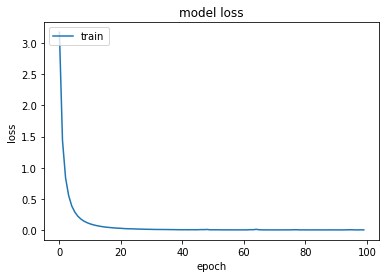

Accuracy: 66.299301


In [ ]:
printHistory_plot_graph(history)

#evaluatte the model
loss, accuracy = model_3.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("How do I locate my card?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
preds
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

how do locate my card
1/1 [==============================] - 0s 53ms/step
[array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['country_support'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['top_up_failed'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['lost_or_stolen_phone'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['card_linking'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['top_up_failed'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['country_support'], dtype=object)]


Model 4 - Using GloVe Embedding Layer, GlobalAveragePoolong1D, Dropout rate, 1 hidden Dense layer with 'relu' activation function, and output Dense layer with 'softmax' activation function.

In [ ]:
#compile the model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_4 = getSequentialModelWithHidden(embedding_layer, 0.2)
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_4.summary()
#fit the model with training data
history = model_4.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 15, 300)           275700    
                                                                 
 global_average_pooling1d_16  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_30 (Dropout)        (None, 300)               0         
                                                                 
 dense_67 (Dense)            (None, 512)               154112    
                                                                 
 dense_68 (Dense)            (None, 77)                39501     
                                                                 
Total params: 469,313
Trainable params: 193,613
Non-trainable params: 275,700
_________________________________________

dict_keys(['loss', 'accuracy'])


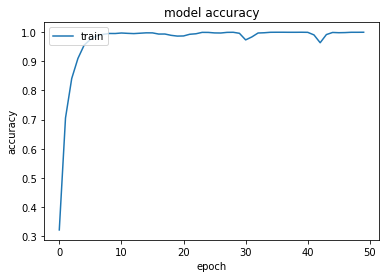

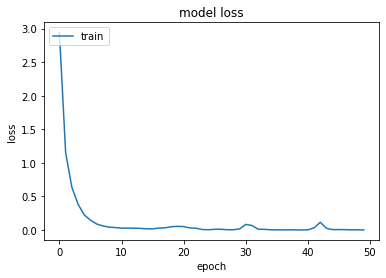

Accuracy: 84.744781


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_4.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("I am still waiting on my card")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_4 = [np.argmax(pred) for pred in model_4.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_4 ])

be still wait on my card
1/1 [==============================] - 0s 43ms/step
[array(['country_support'], dtype=object), array(['edit_personal_details'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['why_verify_identity'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['why_verify_identity'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['unable_to_verify_identity'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['c

##### Using Deep CNN (Convolutional Neural Network) + Embedding Layer

In [ ]:
def getSequentialCNNModelWithEmbedding(embedding_layer):
  model = Sequential()
  model.add(embedding_layer)
  model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(77, activation='softmax'))
  print(model.summary())
  return model

##### Using Deep CNN and Glove Embedding

In [ ]:
#compile the CNN model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_cnn = getSequentialCNNModelWithEmbedding(embedding_layer)
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_cnn.summary()
#fit the model with training data
history = model_cnn.fit(dataset_x_train_seq_pad, y_train, epochs=50)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 15, 300)           275700    
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 128)           192128    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 640)               0         
                                                                 
 dense_69 (Dense)            (None, 77)                49357     
                                                                 
Total params: 517,185
Trainable params: 241,485
Non-trainable params: 275,700
_________________________________________

dict_keys(['loss', 'accuracy'])


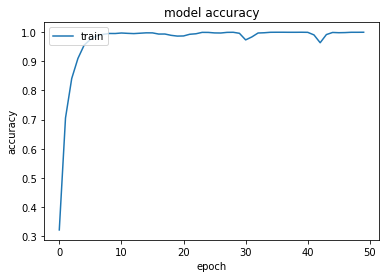

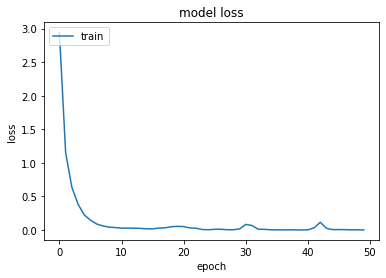

Accuracy: 74.477959


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_cnn.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("top-up my cheque")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

top up my cheque
1/1 [==============================] - 0s 28ms/step
[array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['request_refund'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['unable_to_verify_identity'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['verify_my_identity'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['request_refund'], dtype=object), array(['verify_my_identity'], dtype=object)]


##### Using Deep Learning model + LSTM Layer

In [ ]:
# Define a sequential model
def getSequentialModelWithLSTM(embedding_layer, drop_out_rate):
  model = Sequential()
  model.add(embedding_layer)
  model.add(Dropout(drop_out_rate))
  model.add(LSTM(64, dropout=drop_out_rate, recurrent_dropout=0.5))
  model.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
  model.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))
  return model

##### Using Sequential model with LSTM and Glove Embedding

In [ ]:
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_3 = getSequentialModelWithLSTM(embedding_layer, 0.2)
#compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_3.summary()
#fit the model with training data
history = model_3.fit(dataset_x_train_seq_pad, y_train, epochs=20)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 15, 300)           274200    
                                                                 
 dropout_13 (Dropout)        (None, 15, 300)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                93440     
                                                                 
 dense_34 (Dense)            (None, 512)               33280     
                                                                 
 dense_35 (Dense)            (None, 77)                39501     
                                                                 
Total params: 440,421
Trainable params: 166,221
Non-trainable params: 274,200
_________________________________________________________________
Epoch 1/20
216/216 [=====================

dict_keys(['loss', 'accuracy'])


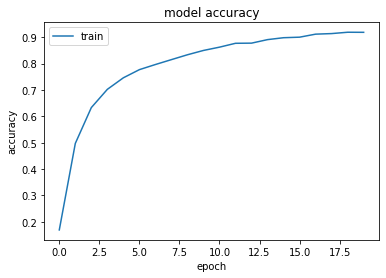

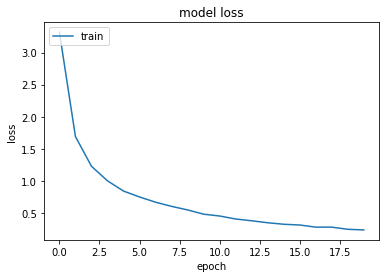

Accuracy: 82.772624


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_3.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("I need a new pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

need new pin
1/1 [==============================] - 0s 54ms/step
[array(['passcode_forgotten'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['automatic_top_up'], dtype=object), array(['contactless_not_working'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['contactless_not_working'], dtype=object), array(['contactless_not_working'], dtype=object), array(['contactless_not_working'], dtype=object), array(['transaction_charged_twice'], dtype=object), array(['passcode_forgotten'], dtype=object)]


#### Using Word2Vec Pre-trained Embedding Layer with GoogleNews-vectors-negative300 pre-trained model

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import KeyedVectors

def getGensimWord2VecModel():
  filename = '/content/drive/MyDrive/Dissertation/Topic_Analysis/GoogleNews-vectors-negative300.bin'
  word2vec_model = KeyedVectors.load_word2vec_format(filename, binary=True)
  return word2vec_model

In [ ]:
weight_matrix = getWeightMatrix(getGensimWord2VecModel(), dataset_voc_size, 300)

In [ ]:
#compile the model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[weight_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_6 = getSequentialModelWithHidden(embedding_layer, 0.2)
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_6.summary()
#fit the model with training data
history = model_6.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_46 (Embedding)    (None, 15, 300)           282000    
                                                                 
 global_average_pooling1d_19  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_33 (Dropout)        (None, 300)               0         
                                                                 
 dense_75 (Dense)            (None, 512)               154112    
                                                                 
 dense_76 (Dense)            (None, 77)                39501     
                                                                 
Total params: 475,613
Trainable params: 193,613
Non-trainable params: 282,000
_________________________________________

dict_keys(['loss', 'accuracy'])


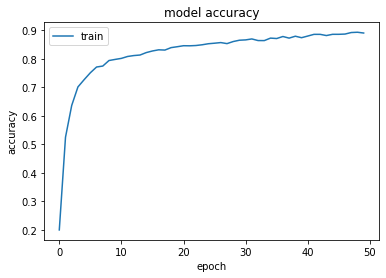

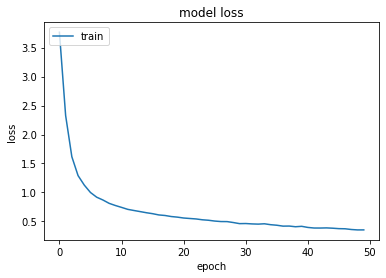

Accuracy: 84.106731


In [ ]:
printHistory_plot_graph(history)
#evaluate the model
loss, accuracy = model_6.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("i would like to change my pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_6.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

would like to change my pin
1/1 [==============================] - 0s 25ms/step
[25, 25, 58, 25, 25, 25, 25, 25, 25, 13, 25, 25, 25, 25, 25, 25, 25, 70, 25, 13, 25, 2, 25, 25, 25, 25, 70]
[array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['top_up_by_cash_or_cheque'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['verify_source_of_funds'], dtype=object), array(['country_support'], dtype

In [ ]:
#compile the cnn model
embedding_layer = Embedding(dataset_voc_size, 300, weights=[weight_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_cnn = getSequentialCNNModelWithEmbedding(embedding_layer)
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_cnn.summary()
#fit the model with training data
history = model_cnn.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 15, 300)           282000    
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 128)           192128    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 640)               0         
                                                                 
 dense_79 (Dense)            (None, 77)                49357     
                                                                 
Total params: 523,485
Trainable params: 241,485
Non-trainable params: 282,000
_________________________________________

dict_keys(['loss', 'accuracy'])


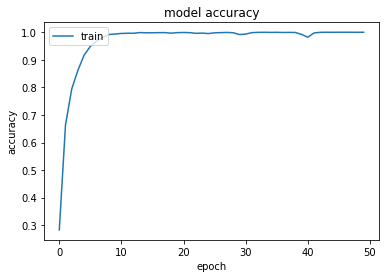

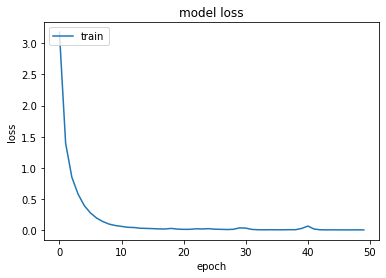

Accuracy: 74.419951


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_cnn.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("i would like to change my pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

would like to change my pin
1/1 [==============================] - 1s 588ms/step
[75, 75, 37, 75, 73, 75, 75, 3, 75, 24, 75, 75, 75, 75, 75, 75, 75, 3, 75, 24, 75, 25, 75, 75, 75, 3, 3]
[array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['fiat_currency_support'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['visa_or_mastercard'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['apple_pay_or_google_pay'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['contactless_not_working'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), arra

#### Using FastText Embedding Model

In [ ]:
!pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4391812 sha256=e1febf9597666feb59740fcc3b51ea5d067f3472da836479f63059347aad59e4
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fastText


In [ ]:
import fasttext

In [ ]:
train_file = "/content/drive/MyDrive/Dissertation/Topic_Analysis/train_file_fastText.csv"
test_file = "/content/drive/MyDrive/Dissertation/Topic_Analysis/test_file_fastText.csv"
fastText_vector = "/content/drive/MyDrive/Dissertation/Topic_Analysis/crawl-300d-2M.vec"

In [ ]:
# #add __label__ in front of the labels for fastText to read
utterances['intent_labeled_fasttext'] = '__label__' + utterances['intent_labelEncoded'].astype(str)
utterances['intent_labeled_fasttext'].head()

0    __label__21
1    __label__46
2    __label__67
3    __label__69
4    __label__69
Name: intent_labeled_fasttext, dtype: object

In [ ]:
#put intent label and utterance together
utterance_label= utterances['intent_labeled_fasttext'] + " " + utterances['lemmatized_utterance']
utterance_label.head()

0    __label__21 be check my account when see 500 c...
1          __label__46 why have not get my payment yet
2    __label__67 how long will transfer take from e...
3    __label__69 what do you need for the identity ...
4           __label__69 can verify my identity the app
dtype: object

In [ ]:
#split into train and test
train, test = train_test_split(utterance_label, test_size=0.3, train_size=0.7, random_state=42)

In [ ]:
#write test and train into files
f_train = open(train_file, "w")
for i in range(len(np.array(train))):
    f_train.write(np.array(train)[i] + "\n")
f_train.close()

f_test = open(test_file, "w")
for i in range(len(np.array(test))):
    f_test.write(np.array(test)[i] + "\n")
f_test.close()

In [ ]:
#train model using supervised function
def getFastTextModel():
  model_fastText = fasttext.train_supervised(input=train_file, dim=300,
                             pretrainedVectors=fastText_vector)
  return model_fastText

In [ ]:
model_fastText = getFastTextModel()

In [ ]:
#test using the model
model_fastText.test(test_file) #(n, precision, recall)

(2586, 0.8576952822892498, 0.8576952822892498)

In [ ]:
# save the model to file.
fastText_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/fastText_finetuned"
model_fastText.save_model(fastText_finetuned_path)

In [ ]:
corrected_utterance = preprocess_utterance("I need a new pin.")
print(corrected_utterance)
result = model_fastText.predict(corrected_utterance)
result = result[0][0]
result = result.split('__')[2]
print(labelEncoding.inverse_transform([int(result)]))

need new pin
['pin_blocked']


### Using Bidirectional Encoder Representations from Transformer (BERT)Pre-trained Transformer

##### Using pre-trained Bert model (bert_en_wwm_cased_L-24_H-1024_A-16) to get the embeddings

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.1 MB/s eta 0:00:00


In [ ]:
pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 18.4 MB/s eta 0:00:00


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

In [ ]:
num_classes = len(utterances['intent_labelEncoded'].value_counts())

In [ ]:
# BERT pre-processor layer
BERT_processor_model = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
preprocessing_layer = hub.KerasLayer(BERT_processor_model, name='preprocessing')

# BERT encoder layer
BERT_encoder_model = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
BERT_encoder = hub.KerasLayer(BERT_encoder_model, trainable=False, name='BERT_encoder')


# text_test = ['this is such an amazing movie!']
# text_preprocessed = preprocessing_layer(text_test)

# print(f'Keys       : {list(text_preprocessed.keys())}')
# print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
# print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
# print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
# print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

def build_BERT_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = BERT_encoder(encoder_inputs)
  net = outputs['pooled_output']
  drop1=Dropout(0.2, name="dropout")(net)
  relu_layer=tf.keras.layers.Dense(768,activation='relu', name="relu")(drop1)
  drop2=Dropout(0.3, name="dropout2")(relu_layer)
  sigmoid_layer=tf.keras.layers.Dense(512,activation='sigmoid', name="sigmoid")(drop2)
  output = tf.keras.layers.Dense(num_classes,activation='softmax', name="output")(drop1)
  return tf.keras.Model(text_input, output)


In [ ]:
model_BERT = build_BERT_classifier_model()

In [ ]:
X = utterances['lemmatized_utterance']
y = tf.keras.utils.to_categorical(utterances['intent_labelEncoded'].values, num_classes=num_classes)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6894,)
(6894, 77)
(1724,)
(1724, 77)


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy(name="accuracy")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_BERT.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
model_fit = model_BERT.fit(X_train, 
                      y_train, 
                      epochs = 100,
                      validation_data = (X_test, y_test),
                      callbacks = [earlystop_callback],
                      batch_size=50)

Epoch 1/100
138/138 [==============================] - 33s 212ms/step - loss: 3.9010 - accuracy: 0.1076 - val_loss: 3.2482 - val_accuracy: 0.3225
Epoch 2/100
138/138 [==============================] - 28s 205ms/step - loss: 2.9711 - accuracy: 0.3290 - val_loss: 2.6093 - val_accuracy: 0.4588
Epoch 3/100
138/138 [==============================] - 28s 206ms/step - loss: 2.4318 - accuracy: 0.4491 - val_loss: 2.2230 - val_accuracy: 0.5244
Epoch 4/100
138/138 [==============================] - 27s 199ms/step - loss: 2.0907 - accuracy: 0.5299 - val_loss: 1.9596 - val_accuracy: 0.5626
Epoch 5/100
138/138 [==============================] - 28s 202ms/step - loss: 1.8559 - accuracy: 0.5750 - val_loss: 1.7850 - val_accuracy: 0.5992
Epoch 6/100
138/138 [==============================] - 27s 199ms/step - loss: 1.6899 - accuracy: 0.6082 - val_loss: 1.6444 - val_accuracy: 0.6206
Epoch 7/100
138/138 [==============================] - 28s 202ms/step - loss: 1.5623 - accuracy: 0.6323 - val_loss: 1.5443 -

In [ ]:
#evaluatte the model
loss, accuracy = model_BERT.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

Accuracy: 78.306264


In [ ]:
# save the model to file.
BERT_banking77_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned"
model_BERT.save(BERT_banking77_finetuned_path)


In [ ]:
# retrieve the saved model
from tensorflow import keras

test_model =  keras.models.load_model(BERT_banking77_finetuned_path)

In [ ]:
# predictions using saved model
pred = [np.argmax(pred) for pred in test_model.predict(["How do I locate my card?"])]
pred
labelEncoding.inverse_transform([pred])

1/1 [==============================] - 0s 59ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['lost_or_stolen_phone'], dtype=object)

In [ ]:
# Download the model
from google.colab import files
!zip -r /content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned.zip /content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned
files.download("/content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned.zip")

updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/assets/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/assets/vocab.txt (deflated 53%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/fingerprint.pb (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/keras_metadata.pb (deflated 83%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/variables.index (deflated 74%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/variables.data-00000-of-00001 (deflated 7%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_fi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Using pre-trained distilroberta-base fine-tuned model for intent classification

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_id = 'philschmid/DistilBERT-Banking77'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model_DistilBERT= AutoModelForSequenceClassification.from_pretrained(model_id)
classifier = pipeline('text-classification', tokenizer=tokenizer, model=model)
classifier('What is the base of the exchange rates?')

[{'label': 'exchange_rate', 'score': 0.9791280627250671}]

In [ ]:
# predictions using huggingface model
classifier("How do I locate my card?")

[{'label': 'card_arrival', 'score': 0.6912513375282288}]

### MultiLingual Intent Classification Model for Spanish and Engish Languages

##### Using pre-trained Bert model LaBSE - Language-agnostic BERT sentence embedding model supporting 109 languages to get the embeddings

In [ ]:
# BERT pre-processor layer
LaBSE_processor_model = "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2"
preprocessing_layer = hub.KerasLayer(LaBSE_processor_model, name='preprocessing')

# BERT encoder layer
LaBSE_encoder_model = "https://tfhub.dev/google/LaBSE/2"
BERT_encoder = hub.KerasLayer(LaBSE_encoder_model, trainable=False, name='BERT_encoder')


# text_test = ['this is such an amazing movie!']
# text_preprocessed = preprocessing_layer(text_test)

# print(f'Keys       : {list(text_preprocessed.keys())}')
# print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
# print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
# print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
# print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

def build_LaBSE_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = BERT_encoder(encoder_inputs)
  net = outputs['pooled_output']
  drop1=Dropout(0.3, name="dropout1")(net)
  relu_layer=tf.keras.layers.Dense(768,activation='relu', name="relu")(drop1)
  drop2=Dropout(0.3, name="dropout2")(relu_layer)
  sigmoid_layer=tf.keras.layers.Dense(512,activation='sigmoid', name="sigmoid")(drop2)
  output = tf.keras.layers.Dense(num_classes,activation='softmax', name="output")(sigmoid_layer)
  return tf.keras.Model(text_input, output)

In [ ]:
model_LaBSE = build_LaBSE_classifier_model()

In [ ]:
X = utterances['lemmatized_utterance']
y = tf.keras.utils.to_categorical(utterances['intent_labelEncoded'].values, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6894,)
(6894, 77)
(1724,)
(1724, 77)


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy(name="accuracy")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_LaBSE.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
model_fit = model_LaBSE.fit(X_train, 
                      y_train, 
                      epochs = 5,
                      validation_data = (X_test, y_test),
                      callbacks = [earlystop_callback],
                      batch_size=50)

Epoch 1/5
138/138 [==============================] - 107s 746ms/step - loss: 0.3632 - accuracy: 0.8928 - val_loss: 0.2590 - val_accuracy: 0.9217
Epoch 2/5
138/138 [==============================] - 89s 647ms/step - loss: 0.2620 - accuracy: 0.9214 - val_loss: 0.2639 - val_accuracy: 0.9205
Epoch 3/5
138/138 [==============================] - 89s 645ms/step - loss: 0.2217 - accuracy: 0.9317 - val_loss: 0.2877 - val_accuracy: 0.9188
Epoch 4/5
138/138 [==============================] - 91s 658ms/step - loss: 0.1965 - accuracy: 0.9405 - val_loss: 0.2724 - val_accuracy: 0.9159


In [ ]:
#evaluatte the model
loss, accuracy = model_LaBSE.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

Accuracy: 92.169374


In [ ]:
# save the model to file.
LaBSE_banking77_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/LaBSE_banking77_finetuned"
model_LaBSE.save(LaBSE_banking77_finetuned_path)

In [ ]:
# retrieve the saved model
from tensorflow import keras

test_model =  keras.models.load_model(LaBSE_banking77_finetuned_path)

In [ ]:
# predictions using saved model on English utterance
pred = [np.argmax(pred) for pred in model_LaBSE.predict(["How do I locate my card?"])]
pred
labelEncoding.inverse_transform([pred])

1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['card_linking'], dtype=object)

In [ ]:
# predictions using saved model on Spanish utterance
pred_es = [np.argmax(pred_es) for pred_es in model_LaBSE.predict(["¿Cómo localizo mi tarjeta?"])]
pred_es
labelEncoding.inverse_transform([pred_es])

1/1 [==============================] - 0s 56ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['card_linking'], dtype=object)

In [ ]:
# predictions using saved model on English utterance
pred = [np.argmax(pred) for pred in model_LaBSE.predict(["I need a new pin."])]
pred
labelEncoding.inverse_transform([pred])

1/1 [==============================] - 0s 83ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['change_pin'], dtype=object)